## Step 1: Importing Libraries

In [1]:
# Import the requried modules/libraries
import re
import ast # This is useful to convert the string representation of lists to actual lists
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from matplotlib.gridspec import GridSpec
import textwrap

# Mount the google drive
from google.colab import drive
drive.mount('/content/drive')

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

Mounted at /content/drive


In [2]:
# display all the rows, columns and display them at max width
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

## Step 2: Reading the data

In [3]:
df1945 = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/After Jan 16th 2025/1945_Standardized_Final - 1945_Standardized_Final.csv')
df1975 = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/After Jan 16th 2025/1975_Standardized_Final - 1975_Standardized_Final.csv')
df1985 = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/After Jan 16th 2025/1985_Standardized_Final - 1985_Standardized_Final.csv')
df2012_2020_2021 = pd.read_csv('/content/drive/MyDrive/RA Part-time UMD/Lubbock Project/After Jan 16th 2025/2012 2020 2021 data.csv')

## Step 3: Convert Quoted Numeric Values to Floats and Set Non-Numeric Strings to NaN

### Functions

In [4]:
def clean_numeric_columns(df: pd.DataFrame, columns: list):
    for col in columns:
        if col in df.columns:
            df[col] = df[col].apply(lambda x: float(x.strip("'\"{}")) if isinstance(x, str) and x.strip("'\"{}").replace('.', '', 1).isdigit() else (np.nan if isinstance(x, str) and not any(c.isdigit() for c in x) else x))
    return df

In [5]:
def find_string_values(df: pd.DataFrame, columns: list):
    """
    Identifies and prints all string values in specified columns of a DataFrame,
    including their indices and values. Provides detailed summaries and examples.

    Parameters:
    df (pd.DataFrame): Input DataFrame
    columns (list): List of column names to check for string values
    """

    for col in columns:
        print(f"\n{'=' * 50}")
        print(f"=== Analyzing column: '{col}' ===")
        print(f"{'=' * 50}")

        # Check if column exists
        if col not in df.columns:
            print(f"❌ Column '{col}' does not exist in DataFrame")
            continue

        # Get string values with their indices
        string_mask = df[col].apply(lambda x: isinstance(x, str))
        string_values = df[col][string_mask]

        print(f"\nTotal values: {len(df[col])}")
        print(f"String values found: {len(string_values)} ({len(string_values)/len(df[col]):.1%})")
        print(f"Non-string values: {len(df[col]) - len(string_values)}")

        if not string_values.empty:
            # Print all string values with indices
            print("\n🔍 All string values:")
            for idx, val in string_values.items():
                print(f"  Row {idx}: {repr(val)}")

            # Unique values analysis
            unique_strings = string_values.unique()
            print(f"\n🎯 Unique string values: {len(unique_strings)}")
            print("Most common string values:")
            print(string_values.value_counts().head(10).to_string())

            # Example analysis
            example_lengths = string_values.str.len().describe()
            print("\n📏 String length statistics:")
            print(f"  Shortest: {example_lengths['min']} chars")
            print(f"  Longest: {example_lengths['max']} chars")
            print(f"  Average: {example_lengths['mean']:.1f} chars")

            # Show suspicious patterns
            has_whitespace = string_values.str.contains(r'\s').sum()
            has_special = string_values.str.contains(r'[^a-zA-Z0-9]').sum()
            print(f"\n🔎 {has_whitespace} strings contain whitespace")
            print(f"🔎 {has_special} strings contain special characters")
        else:
            print("\n✅ No string values found in this column")

        print(f"\n{'=' * 50}")

# Example usage:
# find_string_values(df1945, ['state_tax_1945', 'other_column'])

### Dealing with 1945

In [6]:
# Drop rows where 'google_standard_address_1945' is missing
df1945 = df1945.dropna(subset=['google_standard_address_1945'])
df1945.reset_index(drop=True, inplace=True)
df1945 = clean_numeric_columns(df1945, ['state_tax_1945', 'county_tax_1945'])

# Columns needed in df1945
needed_columns_1945 = [
    'google_standard_address_1945','zip_code_1945',
    'latitude_1945','longitude_1945',
    'aceres_rendered_1945',
    'value_dollars_1945','designate_homestead_1945',
    'value_of_city_property_1945', 'value_of_personal_property_1945',
    'total_value_for_state_tax_1945', 'state_tax_1945', 'county_tax_1945',
    'district_school_1945', 'total_tax_1945'
]
df1945 = df1945[needed_columns_1945]

In [7]:
find_string_values(df1945, ['state_tax_1945', 'county_tax_1945'])


=== Analyzing column: 'state_tax_1945' ===

Total values: 2700
String values found: 0 (0.0%)
Non-string values: 2700

✅ No string values found in this column


=== Analyzing column: 'county_tax_1945' ===

Total values: 2700
String values found: 0 (0.0%)
Non-string values: 2700

✅ No string values found in this column



In [8]:
df1945.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   google_standard_address_1945     2700 non-null   object 
 1   zip_code_1945                    2700 non-null   float64
 2   latitude_1945                    2700 non-null   float64
 3   longitude_1945                   2700 non-null   float64
 4   aceres_rendered_1945             0 non-null      float64
 5   value_dollars_1945               0 non-null      float64
 6   designate_homestead_1945         1298 non-null   float64
 7   value_of_city_property_1945      2320 non-null   float64
 8   value_of_personal_property_1945  367 non-null    float64
 9   total_value_for_state_tax_1945   0 non-null      float64
 10  state_tax_1945                   567 non-null    float64
 11  county_tax_1945                  1538 non-null   float64
 12  district_school_1945

### Dealing with 1975

In [9]:
# Drop rows where 'google_standard_address_1975' is missing
df1975 = df1975.dropna(subset=['google_standard_address_1975'])
df1975.reset_index(drop=True, inplace=True)
df1975 = clean_numeric_columns(df1975, ['aceres_rendered_1975','value_dollars_(state_value)_1975', 'designate_homestead_1975',
                      'value_of_city_property_(total_county_value)_1975', 'value_of_personal_property_1975',
                      'total_value_for_county_tax_1975', 'state_tax_1975', 'district_school_1975',
                      'tax_total_(including_hospital_and_water_taxes)_1975'])

# Columns needed in df1975
needed_columns_1975 = [
    'google_standard_address_1975', 'zip_code_1975',
    'latitude_1975', 'longitude_1975',
    'aceres_rendered_1975', 'value_dollars_(state_value)_1975', 'designate_homestead_1975',
    'value_of_city_property_(total_county_value)_1975', 'value_of_personal_property_1975',
    'total_value_for_county_tax_1975', 'state_tax_1975', 'county_tax_1975',
    'district_school_1975', 'tax_total_(including_hospital_and_water_taxes)_1975'
]
df1975 = df1975[needed_columns_1975]

In [10]:
find_string_values(df1975, ['aceres_rendered_1975','value_dollars_(state_value)_1975', 'designate_homestead_1975',
                      'value_of_city_property_(total_county_value)_1975', 'value_of_personal_property_1975',
                      'total_value_for_county_tax_1975', 'state_tax_1975', 'district_school_1975',
                      'tax_total_(including_hospital_and_water_taxes)_1975'])


=== Analyzing column: 'aceres_rendered_1975' ===

Total values: 40489
String values found: 0 (0.0%)
Non-string values: 40489

✅ No string values found in this column


=== Analyzing column: 'value_dollars_(state_value)_1975' ===

Total values: 40489
String values found: 0 (0.0%)
Non-string values: 40489

✅ No string values found in this column


=== Analyzing column: 'designate_homestead_1975' ===

Total values: 40489
String values found: 0 (0.0%)
Non-string values: 40489

✅ No string values found in this column


=== Analyzing column: 'value_of_city_property_(total_county_value)_1975' ===

Total values: 40489
String values found: 2735 (6.8%)
Non-string values: 37754

🔍 All string values:
  Row 28905: '10800HS'
  Row 28906: '6720HS'
  Row 28909: '3180HS'
  Row 28915: '2200HS'
  Row 28916: '2530HS'
  Row 28919: '2180HS'
  Row 28922: '6780HS'
  Row 28926: '5080HS'
  Row 28928: '5630HS'
  Row 28932: '1490HS'
  Row 28933: '1910HS'
  Row 28945: '5680HS'
  Row 28951: '15060HS'
  Row 28956: 

In [11]:
df1975.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40489 entries, 0 to 40488
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   google_standard_address_1975                         40489 non-null  object 
 1   zip_code_1975                                        40486 non-null  float64
 2   latitude_1975                                        40489 non-null  float64
 3   longitude_1975                                       40489 non-null  float64
 4   aceres_rendered_1975                                 1731 non-null   float64
 5   value_dollars_(state_value)_1975                     36349 non-null  float64
 6   designate_homestead_1975                             10635 non-null  float64
 7   value_of_city_property_(total_county_value)_1975     40471 non-null  object 
 8   value_of_personal_property_1975                      2064 non-null

### Dealing with 1985

In [12]:
# Drop rows where 'google_standard_address_1945' is missing
df1985 = df1985.dropna(subset=['google_standard_address_1985'])
df1985.reset_index(drop=True, inplace=True)
df1985 = clean_numeric_columns(df1985, ['area_1985','land _1985',
                      'bld-val_1985', 'spec_feat_1985',
                      'assessed_1985', 'school_1985', 'county_1985',
                      'city_1985', 'lbb_school_1985', 'lbb_city_1985',
                      'L C H D_1985', 'county_1985.1', 'gross_tax_1985'])

# Columns needed in df1985
needed_columns_1985 = [
    'google_standard_address_1985', 'zip_code_1985',
    'latitude_1985', 'longitude_1985',
    'area_1985', 'land _1985',
    'bld-val_1985', 'spec_feat_1985', 'assessed_1985', 'homestead_1985', 'school_1985',
    'county_1985', 'city_1985', 'lbb_school_1985', 'lbb_city_1985', 'L C H D_1985',
    'county_1985.1', 'gross_tax_1985'
]
df1985 = df1985[needed_columns_1985]

In [13]:
find_string_values(df1985,['area_1985','land _1985',
                      'bld-val_1985', 'spec_feat_1985',
                      'assessed_1985', 'school_1985', 'county_1985',
                      'city_1985', 'lbb_school_1985', 'lbb_city_1985',
                      'L C H D_1985', 'county_1985.1', 'gross_tax_1985'])


=== Analyzing column: 'area_1985' ===

Total values: 19583
String values found: 1 (0.0%)
Non-string values: 19582

🔍 All string values:
  Row 28: '206 3160'

🎯 Unique string values: 1
Most common string values:
area_1985
206 3160    1

📏 String length statistics:
  Shortest: 8.0 chars
  Longest: 8.0 chars
  Average: 8.0 chars

🔎 1 strings contain whitespace
🔎 1 strings contain special characters


=== Analyzing column: 'land _1985' ===

Total values: 19583
String values found: 2 (0.0%)
Non-string values: 19581

🔍 All string values:
  Row 5074: '11??'
  Row 14749: '?70'

🎯 Unique string values: 2
Most common string values:
land _1985
11??    1
?70     1

📏 String length statistics:
  Shortest: 3.0 chars
  Longest: 4.0 chars
  Average: 3.5 chars

🔎 0 strings contain whitespace
🔎 2 strings contain special characters


=== Analyzing column: 'bld-val_1985' ===

Total values: 19583
String values found: 3 (0.0%)
Non-string values: 19580

🔍 All string values:
  Row 15762: '??805'
  Row 17511:

In [14]:
df1985.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   google_standard_address_1985  19583 non-null  object 
 1   zip_code_1985                 19574 non-null  float64
 2   latitude_1985                 19583 non-null  float64
 3   longitude_1985                19583 non-null  float64
 4   area_1985                     19388 non-null  object 
 5   land _1985                    19291 non-null  object 
 6   bld-val_1985                  16412 non-null  object 
 7   spec_feat_1985                6650 non-null   object 
 8   assessed_1985                 19505 non-null  object 
 9   homestead_1985                8415 non-null   float64
 10  school_1985                   19126 non-null  object 
 11  county_1985                   19065 non-null  object 
 12  city_1985                     18993 non-null  object 
 13  l

## Step 4: Clean and Convert Columns to Float Dtype

### Functions

In [15]:
columns_to_convert_1975 = ['value_of_city_property_(total_county_value)_1975', 'state_tax_1975', 'district_school_1975',
                      'tax_total_(including_hospital_and_water_taxes)_1975']

columns_to_convert_1985 = ['area_1985','land _1985',
                      'bld-val_1985', 'spec_feat_1985',
                      'assessed_1985', 'school_1985', 'county_1985',
                      'city_1985', 'lbb_school_1985', 'lbb_city_1985',
                      'L C H D_1985', 'county_1985.1', 'gross_tax_1985']

In [16]:
def clean_and_convert_to_float(df: pd.DataFrame, columns: list):
    """
    Cleans specified columns and converts them to float dtype.
    - Sets values with special characters or internal spaces to NaN.
    - Removes leading/trailing alphabets and converts to float if possible.
    - Converts the entire column to float dtype.
    """
    for col in columns:
        if col in df.columns:
            # Step 1: Set values with special characters (+ = ?) to NaN
            df[col] = df[col].apply(lambda x: np.nan if isinstance(x, str) and any(char in x for char in ['+', '=', '?']) else x)

            # Step 2: Set values with spaces (not at edges) to NaN
            df[col] = df[col].apply(lambda x: np.nan if isinstance(x, str) and ' ' in x.strip() else x)

            # Step 3: Remove leading/trailing alphabets and convert to float if possible
            df[col] = df[col].apply(lambda x: float(x.strip("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ")) if isinstance(x, str) and x.strip("abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ").replace('.', '', 1).isdigit() else x)

            # Step 4: Convert the entire column to float dtype (non-convertible values become NaN)
            df[col] = pd.to_numeric(df[col], errors='coerce')

    return df

### Dealing with 1945

In [17]:
df1945.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2700 entries, 0 to 2699
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   google_standard_address_1945     2700 non-null   object 
 1   zip_code_1945                    2700 non-null   float64
 2   latitude_1945                    2700 non-null   float64
 3   longitude_1945                   2700 non-null   float64
 4   aceres_rendered_1945             0 non-null      float64
 5   value_dollars_1945               0 non-null      float64
 6   designate_homestead_1945         1298 non-null   float64
 7   value_of_city_property_1945      2320 non-null   float64
 8   value_of_personal_property_1945  367 non-null    float64
 9   total_value_for_state_tax_1945   0 non-null      float64
 10  state_tax_1945                   567 non-null    float64
 11  county_tax_1945                  1538 non-null   float64
 12  district_school_1945

### Dealing with 1975

In [18]:
df1975 = clean_and_convert_to_float(df1975, columns_to_convert_1975)

In [19]:
df1975.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40489 entries, 0 to 40488
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   google_standard_address_1975                         40489 non-null  object 
 1   zip_code_1975                                        40486 non-null  float64
 2   latitude_1975                                        40489 non-null  float64
 3   longitude_1975                                       40489 non-null  float64
 4   aceres_rendered_1975                                 1731 non-null   float64
 5   value_dollars_(state_value)_1975                     36349 non-null  float64
 6   designate_homestead_1975                             10635 non-null  float64
 7   value_of_city_property_(total_county_value)_1975     40471 non-null  float64
 8   value_of_personal_property_1975                      2064 non-null

### Dealing with 1985

In [20]:
df1985 = clean_and_convert_to_float(df1985, columns_to_convert_1985)

In [21]:
df1985.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19583 entries, 0 to 19582
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   google_standard_address_1985  19583 non-null  object 
 1   zip_code_1985                 19574 non-null  float64
 2   latitude_1985                 19583 non-null  float64
 3   longitude_1985                19583 non-null  float64
 4   area_1985                     19387 non-null  float64
 5   land _1985                    19289 non-null  float64
 6   bld-val_1985                  16409 non-null  float64
 7   spec_feat_1985                6649 non-null   float64
 8   assessed_1985                 19502 non-null  float64
 9   homestead_1985                8415 non-null   float64
 10  school_1985                   19122 non-null  float64
 11  county_1985                   19062 non-null  float64
 12  city_1985                     18990 non-null  float64
 13  l

## Step 5: Aggregation of Addresses to make each address unique

### Function

In [22]:
def aggregate_by_address(
    df,
    address_col='google_standard_address_{year}',
    lat_col='latitude_{year}',
    lon_col='longitude_{year}',
    list_cols=None,
    keep_first_cols=None,
    repetition_col_name="address_repetation_{year}"
):
    """
    Aggregate rows by a unique address (given by `address_col`). For each group (unique address):
      - `list_cols`: will become lists of values (including NaN)
      - `keep_first_cols`: we take the first encountered non-null (or just first) from the group
      - `lat_col` & `lon_col`: we pick the first non-null to keep a single lat/lon
      - We also create a column named `repetition_col_name` that indicates
        how many times (how many rows) each address was repeated.

    Parameters
    ----------
    df : pd.DataFrame
        The original DataFrame to aggregate.

    address_col : str
        Column name containing the address that identifies the group.

    lat_col : str
        Column name for latitude.

    lon_col : str
        Column name for longitude.

    list_cols : list of str
        Columns that should become lists in the aggregated DataFrame
        (one list per address group).
        E.g. ['value_dollars_1945', 'designate_homestead_1945'] etc.

    keep_first_cols : list of str, optional
        Columns (besides lat/lon) that you want to just keep one value from
        (the code picks the first row in that group).
        E.g. ['document_number_1945'] if that never changes in repeated rows.

    repetition_col_name : str
        Name of the new column that will store how many times each address was repeated.

    Returns
    -------
    pd.DataFrame
        Aggregated DataFrame with one row per unique address, where repeated
        columns are stored as lists or single values (according to the logic).
    """

    print(">>> Starting 'aggregate_by_address' function.")

    # 1) Validate input arguments
    if list_cols is None:
        list_cols = []
    if keep_first_cols is None:
        keep_first_cols = []

    print(f"   - The function will group by address column: '{address_col}'")
    print(f"   - Will treat these columns as lists: {list_cols}")
    print(f"   - Will keep first encountered values for columns: {keep_first_cols}")
    print(f"   - The repetition count will go into: '{repetition_col_name}'")

    # 2) Check that address_col actually exists
    if address_col not in df.columns:
        raise ValueError(f"Column '{address_col}' not found in dataframe.")

    # 3) Group the dataframe by the address column
    print(">>> Grouping the DataFrame by the address column...")
    group_obj = df.groupby(address_col, dropna=False)
    print(">>> Successfully created groupby object. Number of groups:", len(group_obj))

    # 4) Define an aggregation dictionary:
    #    For columns in `list_cols`: we want them as lists (including NaN if present)
    #    For lat/lon: we might keep the first non-null, or just the first.
    #      We'll show a simpler approach that picks the first row's lat/lon
    #      (You can also do 'first' ignoring nulls if needed.)
    #    For keep_first_cols: pick the first in the group
    #    All other columns could be dropped or handled separately.

    agg_dict = {}

    # Columns to become lists
    for c in list_cols:
        if c in df.columns:
            agg_dict[c] = lambda x: list(x)  # preserve everything, including NaN
        else:
            print(f"WARNING: '{c}' not found in df columns. Will skip it for list_cols.")

    # For columns in keep_first_cols, just take the 'first' row.
    for c in keep_first_cols:
        if c in df.columns:
            agg_dict[c] = 'first'
        else:
            print(f"WARNING: '{c}' not found in df columns. Will skip for keep_first_cols.")

    # If lat_col is different from address_col, handle it
    if lat_col in df.columns:
        # pick 'first' row's lat
        agg_dict[lat_col] = 'first'
    else:
        print(f"WARNING: '{lat_col}' not found in df columns.")

    # If lon_col is different from address_col, handle it
    if lon_col in df.columns:
        # pick 'first' row's lon
        agg_dict[lon_col] = 'first'
    else:
        print(f"WARNING: '{lon_col}' not found in df columns.")

    # 5) Apply the aggregator
    print(">>> Applying aggregator to each group...")
    aggregated_df = group_obj.agg(agg_dict).reset_index()
    print(">>> Aggregation complete! DataFrame shape is now:", aggregated_df.shape)

    # 6) Create the repetition column: how many times each address was repeated
    #    This is just the group size.
    print(">>> Creating the repetition count column...")
    # group size is the number of rows in each group
    address_counts = group_obj.size().reset_index(name='counts')  # a DataFrame with address + size
    address_counts.rename(columns={'counts': repetition_col_name}, inplace=True)

    # 7) Merge the repetition counts into the aggregated df
    print(">>> Merging repetition counts back into the aggregated DataFrame...")
    merged_df = pd.merge(aggregated_df, address_counts, on=address_col, how='left')
    print(f">>> '{repetition_col_name}' was successfully merged.")

    # 8) Sort final DF if you want, or do any final cleaning
    print(">>> Sorting the final DataFrame by address for readability...")
    merged_df.sort_values(by=address_col, inplace=True)
    merged_df.reset_index(drop=True, inplace=True)

    print(">>> Done! Returning the aggregated DataFrame with repeated columns as lists.\n")
    return merged_df


### Dealing with 1945

In [23]:
# The columns you want aggregated as lists (including NaN)
list_columns_1945 = [
    'aceres_rendered_1945',
    'value_dollars_1945',
    'designate_homestead_1945',
    'value_of_city_property_1945',
    'value_of_personal_property_1945',
    'total_value_for_state_tax_1945',
    'state_tax_1945',
    'county_tax_1945',
    'district_school_1945',
    'total_tax_1945'
]

# Suppose we keep lat/lon as single values (just take the first encountered)
df1945_aggregated = aggregate_by_address(
    df=df1945,
    address_col='google_standard_address_1945',
    list_cols=list_columns_1945,
    lat_col='latitude_1945',
    lon_col='longitude_1945',
    # No keep_first_cols besides lat/lon
    keep_first_cols=['zip_code_1945'],
    repetition_col_name="address_repetation_1945"
)


>>> Starting 'aggregate_by_address' function.
   - The function will group by address column: 'google_standard_address_1945'
   - Will treat these columns as lists: ['aceres_rendered_1945', 'value_dollars_1945', 'designate_homestead_1945', 'value_of_city_property_1945', 'value_of_personal_property_1945', 'total_value_for_state_tax_1945', 'state_tax_1945', 'county_tax_1945', 'district_school_1945', 'total_tax_1945']
   - Will keep first encountered values for columns: ['zip_code_1945']
   - The repetition count will go into: 'address_repetation_1945'
>>> Grouping the DataFrame by the address column...
>>> Successfully created groupby object. Number of groups: 2308
>>> Applying aggregator to each group...
>>> Aggregation complete! DataFrame shape is now: (2308, 14)
>>> Creating the repetition count column...
>>> Merging repetition counts back into the aggregated DataFrame...
>>> 'address_repetation_1945' was successfully merged.
>>> Sorting the final DataFrame by address for readability.

In [24]:
df1945_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   google_standard_address_1945     2308 non-null   object 
 1   aceres_rendered_1945             2308 non-null   object 
 2   value_dollars_1945               2308 non-null   object 
 3   designate_homestead_1945         2308 non-null   object 
 4   value_of_city_property_1945      2308 non-null   object 
 5   value_of_personal_property_1945  2308 non-null   object 
 6   total_value_for_state_tax_1945   2308 non-null   object 
 7   state_tax_1945                   2308 non-null   object 
 8   county_tax_1945                  2308 non-null   object 
 9   district_school_1945             2308 non-null   object 
 10  total_tax_1945                   2308 non-null   object 
 11  zip_code_1945                    2308 non-null   float64
 12  latitude_1945       

In [25]:
df1945_aggregated.sample(50)

google_standard_address_1945       aceres_rendered_1945  \
2276       906 Ave D, Abernathy, TX 79311, USA                      [nan]   
399       1520 28th St, Lubbock, TX 79411, USA                      [nan]   
2211  612 N Bangor Ave, Lubbock, TX 79416, USA                      [nan]   
1422      2308 15th St, Lubbock, TX 79401, USA                      [nan]   
1095       2113 9th St, Lubbock, TX 79401, USA                      [nan]   
831       1924 16th St, Lubbock, TX 79401, USA                 [nan, nan]   
395       1520 15th St, Lubbock, TX 79401, USA                      [nan]   
1428    2308 E 16th St, Lubbock, TX 79403, USA                      [nan]   
1910      2625 23rd St, Lubbock, TX 79410, USA                      [nan]   
1159      2120 25th St, Lubbock, TX 79411, USA                      [nan]   
281       1502 19th St, Lubbock, TX 79401, USA                      [nan]   
1442      2310 20th St, Lubbock, TX 79411, USA                      [nan]   
1432      2309 18th St, Lubbock, TX 79401, USA                      [nan]   
1051     2108 E 8th St, Lubbock, TX 79403, USA                      [nan]   
1983      2809 20th St, Lubbock, TX 79410, USA                      [nan]   
264      1416 Avenue Q, Lubbock, TX 79401, USA                      [nan]   
1243      2207 14th St, Lubbock, TX 79401, USA                      [nan]   
1564      2405 15th St, Lubbock, TX 79401, USA                      [nan]   
196      1313 Avenue J, Lubbock, TX 79401, USA                      [nan]   
634       1812 10th St, Lubbock, TX 79401, USA                      [nan]   
1927      2701 29th St, Lubbock, TX 79410, USA                 [nan, nan]   
1780    2513 Loyola St, Lubbock, TX 79415, USA                      [nan]   
635       1812 17th St, Lubbock, TX 79401, USA                      [nan]   
1256      2208 30th St, Lubbock, TX 79411, USA                      [nan]   
407       1521 25th St, Lubbock, TX 79411, USA                      [nan]   
250       1410 17th St, Lubbock, TX 79401, USA                      [nan]   
697       1907 13th St, Lubbock, TX 79401, USA                      [nan]   
1305      2215 14th St, Lubbock, TX 79401, USA                      [nan]   
612       1805 18th St, Lubbock, TX 79401, USA                      [nan]   
1999      2815 30th St, Lubbock, TX 79410, USA                      [nan]   
1202      2201 25th St, Lubbock, TX 79411, USA                      [nan]   
137       1302 10th St, Lubbock, TX 79401, USA                      [nan]   
155       1305 31st St, Lubbock, TX 79411, USA                      [nan]   
2242      804 Avenue R, Lubbock, TX 79401, USA                      [nan]   
1578   2406 E Broadway, Lubbock, TX 79403, USA                      [nan]   
760       1915 16th St, Lubbock, TX 79401, USA                      [nan]   
642      1815 E 4th St, Lubbock, TX 79403, USA                      [nan]   
488       1624 19th St, Lubbock, TX 79401, USA                      [nan]   
1360      2221 Main St, Lubbock, TX 79401, USA  [nan, nan, nan, nan, nan]   
216       1318 26th St, Lubbock, TX 79411, USA                      [nan]   
623      1809 Avenue K, Lubbock, TX 79401, USA                 [nan, nan]   
1257    2208 E 16th St, Lubbock, TX 79403, USA                      [nan]   
771       1916 28th St, Lubbock, TX 79411, USA                      [nan]   
1723      2430 26th St, Lubbock, TX 79411, USA                      [nan]   
677       1905 29th St, Lubbock, TX 79411, USA                      [nan]   
696       1906 Main St, Lubbock, TX 79401, USA                 [nan, nan]   
1492      2317 18th St, Lubbock, TX 79401, USA                 [nan, nan]   
477       1621 16th St, Lubbock, TX 79401, USA                      [nan]   
1440      2310 18th St, Lubbock, TX 79401, USA                      [nan]   
2237        801 8th St, Lubbock, TX 79401, USA                      [nan]   

             value_dollars_1945           designate_homestead_1945  \
2276                

### Dealing with 1975

In [26]:
# The columns you want aggregated as lists (including NaN)
list_columns_1945 = [
    'aceres_rendered_1975',
    'value_dollars_(state_value)_1975',
    'designate_homestead_1975',
    'value_of_city_property_(total_county_value)_1975',
    'value_of_personal_property_1975',
    'total_value_for_county_tax_1975',
    'state_tax_1975',
    'county_tax_1975',
    'district_school_1975',
    'tax_total_(including_hospital_and_water_taxes)_1975'
]

# Suppose we keep lat/lon as single values (just take the first encountered)
df1975_aggregated = aggregate_by_address(
    df=df1975,
    address_col='google_standard_address_1975',
    list_cols=list_columns_1945,
    lat_col='latitude_1975',
    lon_col='longitude_1975',
    # No keep_first_cols besides lat/lon
    keep_first_cols=['zip_code_1975'],
    repetition_col_name="address_repetation_1975"
)

>>> Starting 'aggregate_by_address' function.
   - The function will group by address column: 'google_standard_address_1975'
   - Will treat these columns as lists: ['aceres_rendered_1975', 'value_dollars_(state_value)_1975', 'designate_homestead_1975', 'value_of_city_property_(total_county_value)_1975', 'value_of_personal_property_1975', 'total_value_for_county_tax_1975', 'state_tax_1975', 'county_tax_1975', 'district_school_1975', 'tax_total_(including_hospital_and_water_taxes)_1975']
   - Will keep first encountered values for columns: ['zip_code_1975']
   - The repetition count will go into: 'address_repetation_1975'
>>> Grouping the DataFrame by the address column...
>>> Successfully created groupby object. Number of groups: 26494
>>> Applying aggregator to each group...
>>> Aggregation complete! DataFrame shape is now: (26494, 14)
>>> Creating the repetition count column...
>>> Merging repetition counts back into the aggregated DataFrame...
>>> 'address_repetation_1975' was succe

In [27]:
df1975_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26494 entries, 0 to 26493
Data columns (total 15 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   google_standard_address_1975                         26494 non-null  object 
 1   aceres_rendered_1975                                 26494 non-null  object 
 2   value_dollars_(state_value)_1975                     26494 non-null  object 
 3   designate_homestead_1975                             26494 non-null  object 
 4   value_of_city_property_(total_county_value)_1975     26494 non-null  object 
 5   value_of_personal_property_1975                      26494 non-null  object 
 6   total_value_for_county_tax_1975                      26494 non-null  object 
 7   state_tax_1975                                       26494 non-null  object 
 8   county_tax_1975                                      26494 non-nul

In [28]:
df1975_aggregated.sample(50)

google_standard_address_1975           aceres_rendered_1975  \
6372          2304 54th St, Lubbock, TX 79412, USA  [nan, nan, nan, nan, 58600.0]   
20248        4820 Avenue Q, Lubbock, TX 79412, USA                [nan, nan, nan]   
12202         3118 27th St, Lubbock, TX 79410, USA                          [nan]   
17311         4204 43rd St, Lubbock, TX 79413, USA           [nan, nan, nan, nan]   
24741   6115 Nashville Ave, Lubbock, TX 79413, USA                          [nan]   
4431          2013 45th St, Lubbock, TX 79412, USA                          [nan]   
17402         4209 46th St, Lubbock, TX 79413, USA                          [nan]   
14451         3502 34th St, Lubbock, TX 79410, USA                          [nan]   
15860         3711 46th St, Lubbock, TX 79413, USA                   [nan, 100.0]   
9459          2711 65th St, Lubbock, TX 79413, USA                          [nan]   
15966         3716 46th St, Lubbock, TX 79413, USA                     [nan, nan]   
630           1200 N Ave N, Lubbock, TX 79403, USA                       [5000.0]   
22339         5306 26th St, Lubbock, TX 79407, USA                          [nan]   
4495          2015 71st St, Lubbock, TX 79412, USA                          [nan]   
18073         4403 53rd St, Lubbock, TX 79414, USA                          [nan]   
25186     6611 Norfolk Ave, Lubbock, TX 79413, USA                          [nan]   
12900          3224 1st Pl, Lubbock, TX 79415, USA                          [nan]   
22295         5303 27th St, Lubbock, TX 79407, USA                          [nan]   
19782       4714 Auburn St, Lubbock, TX 79416, USA                          [nan]   
16438         3814 62nd Dr, Lubbock, TX 79413, USA                     [nan, nan]   
20701         4915 56th St, Lubbock, TX 79414, USA                          [nan]   
25772  7916 Louisville Ave, Lubbock, TX 79423, USA                [nan, nan, nan]   
8628          2611 39th St, Lubbock, TX 79413, USA                          [nan]   
10684    2905 Dartmouth St, Lubbock, TX 79415, USA                          [nan]   
22424        5311 Avenue T, Lubbock, TX 79412, USA                [nan, nan, nan]   
4353        2010 Clovis Rd, Lubbock, TX 79415, USA                [nan, nan, nan]   
25596     7405 Raleigh Ave, Lubbock, TX 79424, USA                          [nan]   
8685          2613 34th St, Lubbock, TX 79410, USA                     [nan, nan]   
9809          2726 64th St, Lubbock, TX 79413, USA                          [nan]   
3485        1910 E 14th St, Lubbock, TX 79403, USA                          [nan]   
13791         3407 27th St, Lubbock, TX 79410, USA                [nan, nan, nan]   
12791         3215 36th St, Lubbock, TX 79413, USA                     [nan, nan]   
6647          2313 57th St, Lubbock, TX 79412, USA                          [nan]   
8293          2601 46th St, Lubbock, TX 79413, USA                          [nan]   
19832         4718 43rd St, Lubbock, TX 79414, USA                          [nan]   
24090         5543 17th Pl, Lubbock, TX 79416, USA                          [nan]   
12947         3301 58th St, Lubbock, TX 79413, USA                          [nan]   
3955          1927 69th St, Lubbock, TX 79412, USA                          [nan]   
12770         3214 41st St, Lubbock, TX 79413, USA                          [nan]   
2309          1611 68th St, Lubbock, TX 79412, USA                          [nan]   
21667          5123 7th St, Lubbock, TX 79416, USA                          [nan]   
2911      1803 E Auburn St, Lubbock, TX 79403, USA                     [nan, nan]   
6917         2324 E 6th St, Lubbock, TX 79403, USA           [nan, nan, nan, nan]   
6039        2213 E 50th St, Lubbock, TX 79404, USA                          [nan]   
6108          2217 38th St, Lubbock, TX 79412, USA                          [nan]   
12976         3302 37th St, Lubbock, TX 79413, USA                          [nan]   
5860          2206 32nd St,

### Dealing with 1985

In [29]:
# The columns you want aggregated as lists (including NaN)
list_columns_1945 = [
    'area_1985',
    'land _1985',
    'bld-val_1985',
    'spec_feat_1985',
    'assessed_1985',
    'homestead_1985',
    'school_1985',
    'county_1985',
    'city_1985',
    'lbb_school_1985',
    'lbb_city_1985',
    'L C H D_1985',
    'county_1985.1',
    'gross_tax_1985'
]

# Suppose we keep lat/lon as single values (just take the first encountered)
df1985_aggregated = aggregate_by_address(
    df=df1985,
    address_col='google_standard_address_1985',
    list_cols=list_columns_1945,
    lat_col='latitude_1985',
    lon_col='longitude_1985',
    # No keep_first_cols besides lat/lon
    keep_first_cols=['zip_code_1985'],
    repetition_col_name="address_repetation_1985"
)

>>> Starting 'aggregate_by_address' function.
   - The function will group by address column: 'google_standard_address_1985'
   - Will treat these columns as lists: ['area_1985', 'land _1985', 'bld-val_1985', 'spec_feat_1985', 'assessed_1985', 'homestead_1985', 'school_1985', 'county_1985', 'city_1985', 'lbb_school_1985', 'lbb_city_1985', 'L C H D_1985', 'county_1985.1', 'gross_tax_1985']
   - Will keep first encountered values for columns: ['zip_code_1985']
   - The repetition count will go into: 'address_repetation_1985'
>>> Grouping the DataFrame by the address column...
>>> Successfully created groupby object. Number of groups: 13291
>>> Applying aggregator to each group...
>>> Aggregation complete! DataFrame shape is now: (13291, 18)
>>> Creating the repetition count column...
>>> Merging repetition counts back into the aggregated DataFrame...
>>> 'address_repetation_1985' was successfully merged.
>>> Sorting the final DataFrame by address for readability...
>>> Done! Returning th

In [30]:
df1985_aggregated.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13291 entries, 0 to 13290
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   google_standard_address_1985  13291 non-null  object 
 1   area_1985                     13291 non-null  object 
 2   land _1985                    13291 non-null  object 
 3   bld-val_1985                  13291 non-null  object 
 4   spec_feat_1985                13291 non-null  object 
 5   assessed_1985                 13291 non-null  object 
 6   homestead_1985                13291 non-null  object 
 7   school_1985                   13291 non-null  object 
 8   county_1985                   13291 non-null  object 
 9   city_1985                     13291 non-null  object 
 10  lbb_school_1985               13291 non-null  object 
 11  lbb_city_1985                 13291 non-null  object 
 12  L C H D_1985                  13291 non-null  object 
 13  c

In [31]:
df1985_aggregated.sample(50)

google_standard_address_1985  \
3445            230 S 3rd St, Slaton, TX 79364, USA   
3499           2303 58th St, Lubbock, TX 79412, USA   
1739   1706 N Nashville Ave, Lubbock, TX 79415, USA   
12785       8105 Vernon Ave, Lubbock, TX 79423, USA   
1813           1715 44th St, Lubbock, TX 79412, USA   
9466           4508 42nd St, Lubbock, TX 79414, USA   
5380           2716 Duke St, Lubbock, TX 79415, USA   
9220           4413 44th St, Lubbock, TX 79414, USA   
509            1216 46th Pl, Lubbock, TX 79412, USA   
8309           3711 25th St, Lubbock, TX 79410, USA   
2017           1904 55th St, Lubbock, TX 79412, USA   
3244            2210 6th St, Lubbock, TX 79407, USA   
3717           2314 58th St, Lubbock, TX 79412, USA   
7097           3218 67th St, Lubbock, TX 79413, USA   
11862       6017 Oxford Ave, Lubbock, TX 79413, USA   
3952           2330 57th St, Lubbock, TX 79412, USA   
9793           4609 28th St, Lubbock, TX 79410, USA   
8113           3615 59th St, Lubbock, TX 79413, USA   
8208           3702 21st St, Lubbock, TX 79410, USA   
10683       506 E Tulane St, Lubbock, TX 79403, USA   
7991           3605 60th St, Lubbock, TX 79413, USA   
12944       902 E Tulane St, Lubbock, TX 79403, USA   
2811           2114 65th Pl, Lubbock, TX 79412, USA   
8764           4103 62nd Dr, Lubbock, TX 79413, USA   
12832           819 Ave H, Abernathy, TX 79311, USA   
12413         6906 Avenue U, Lubbock, TX 79412, USA   
2117           1912 42nd St, Lubbock, TX 79412, USA   
2837           2116 22nd St, Lubbock, TX 79411, USA   
4774           2603 41st St, Lubbock, TX 79413, USA   
12912       8603 Colton Ave, Lubbock, TX 79424, USA   
2616           2105 62nd St, Lubbock, TX 79412, USA   
13060         919 E Rice St, Lubbock, TX 79403, USA   
10461          4913 34th St, Lubbock, TX 79410, USA   
11051          5233 19th St, Lubbock, TX 79407, USA   
9655            455 S 4th St, Slaton, TX 79364, USA   
12085     6202 Lynnhaven Dr, Lubbock, TX 79413, USA   
12145       6212 Kenosha Dr, Lubbock, TX 79413, USA   
12748          808 2nd St, Abernathy, TX 79311, USA   
1232           1503 42nd St, Lubbock, TX 79412, USA   
12881          830 S 10th St, Slaton, TX 79364, USA   
10889           521 47th St, Lubbock, TX 79404, USA   
7932           355 W Lynn St, Slaton, TX 79364, USA   
238            111 Avenue U, Lubbock, TX 79415, USA   
6728           3108 97th St, Lubbock, TX 79423, USA   
4338           2506 29th St, Lubbock, TX 79410, USA   
12852         8207 Avenue W, Lubbock, TX 79423, USA   
6958           3206 38th St, Lubbock, TX 79413, USA   
4856       2610 Raleigh Ave, Lubbock, TX 79410, USA   
5463          2720 E 8th St, Lubbock, TX 79403, USA   
3432         2272 E 46th St, Lubbock, TX 79404, USA   

                                                                           area_1985  \
3445                                                                          [20.0]   
3499                                                                         [207.0]   
1739                                                                         [802.0]   
12785                                                                        [601.0]   
1813                                                                         [204.0]   
9466                                                                         [307.0]   
5380                                                                         [403.0]   
9220                                                                         [307.0]   
509                                                                          [205.0]   
8309                                                                  [304.0, 304.0]   
2017                                                                         [207.0]   
3244                                                                         [107.0]   
3717                                                                     

## Step 6: Choosing a single value for the repeated addresses

In [32]:
def select_single_record_with_fallback(df, priority_cols, address_col, repetitions_col_name, fallback_cols=None ):
    """
    Selects a single record per unique address based on a hierarchy of priority columns.

    Parameters:
    - df (pd.DataFrame): The aggregated DataFrame.
    - priority_cols (list of str): Priority columns in order of importance.
    - address_col (str): The address column used for grouping.
    - fallback_cols (list of str, optional): Additional columns to prioritize if primary columns fail.

    Returns:
    - pd.DataFrame: A DataFrame with one row per unique address.
    """
    print(">>> Starting single record selection with fallback.")

    # Initialize a list to hold the selected records
    selected_records = []

    # Counters and trackers for summary
    total_addresses = len(df)
    single_repetition = 0
    multi_repetition = 0
    all_priority_nan = 0
    fallback_used = 0
    all_priority_and_fallback_nan = 0

    for idx, row in df.iterrows():
        address = row[address_col]
        repetition = row[repetitions_col_name]  # Adjust as needed

        if repetition == 1:
            # No repetition, take the single available value
            selected_record = row.to_dict()
            selected_records.append(selected_record)
            single_repetition += 1
            continue

        # Initialize variables to track selection
        selected_index = None
        used_priority_col = None

        # Iterate over priority columns to find the first non-all-NaN column
        for priority_col in priority_cols:
            priority_values = row[priority_col]
            if not all(pd.isna(priority_values)):
                # Find the index of the highest value
                priority_array = np.array(priority_values, dtype=float)
                selected_index = np.nanargmax(priority_array)
                used_priority_col = priority_col
                multi_repetition += 1
                break

        if selected_index is None:
            # All priority columns are NaN, handle with fallback or default
            if fallback_cols:
                for fallback_col in fallback_cols:
                    fallback_values = row[fallback_col]
                    if not all(pd.isna(fallback_values)):
                        fallback_array = np.array(fallback_values, dtype=float)
                        selected_index = np.nanargmax(fallback_array)
                        used_priority_col = fallback_col
                        fallback_used += 1
                        break
            if selected_index is None:
                # All priority and fallback columns are NaN
                selected_index = 0  # Default to first index
                used_priority_col = priority_cols[0] if priority_cols else 'N/A'
                all_priority_and_fallback_nan += 1

        # Now, extract values from all list-type columns based on the selected index
        selected_record = {}
        for col in df.columns:
            if col in [repetitions_col_name, address_col]:
                # Keep these columns as is
                selected_record[col] = row[col]
            elif isinstance(row[col], list):
                # Replace the list with the selected value (could be NaN)
                try:
                    selected_record[col] = row[col][selected_index]
                except IndexError:
                    # In case the list is shorter than expected
                    selected_record[col] = np.nan
            else:
                # Non-list columns are kept as is
                selected_record[col] = row[col]

        # Optionally, add information about which priority column was used
        selected_record['used_priority_col'] = used_priority_col

        selected_records.append(selected_record)

    # Create a new DataFrame from the selected records
    selected_df = pd.DataFrame(selected_records)

    # Summary Report
    print(">>> Single record selection with fallback complete.\n")
    print(">>> Summary Report:")
    print(f"   - Total unique addresses processed: {total_addresses}")
    print(f"   - Addresses with single repetition: {single_repetition} ({single_repetition / total_addresses:.2%})")
    print(f"   - Addresses with multiple repetitions: {multi_repetition} ({multi_repetition / total_addresses:.2%})")
    print(f"   - Addresses where all priority columns were NaN: {all_priority_nan}")
    if fallback_cols:
        print(f"   - Addresses where fallback columns were used: {fallback_used} ({fallback_used / multi_repetition:.2%})")
    print(f"   - Addresses where all priority and fallback columns were NaN: {all_priority_and_fallback_nan} ({all_priority_and_fallback_nan / total_addresses:.2%})")

    if all_priority_and_fallback_nan > 0:
        print("\n>>> Action Required:")
        print(f"   - {all_priority_and_fallback_nan} addresses have all priority and fallback columns as NaN.")
        print("     Consider reviewing these records for data completeness or assigning default values.")

    return selected_df

### Dealing with 1945

In [33]:
priority_columns_1945 = ['value_of_city_property_1945']
fallback_columns_1945 = ['total_tax_1945']

df1945_single_fallback = select_single_record_with_fallback(
    df=df1945_aggregated,
    priority_cols=priority_columns_1945,
    address_col='google_standard_address_1945',
    repetitions_col_name = 'address_repetation_1945',
    fallback_cols=fallback_columns_1945
)

df1945_single_fallback.sample(50)

>>> Starting single record selection with fallback.
>>> Single record selection with fallback complete.

>>> Summary Report:
   - Total unique addresses processed: 2308
   - Addresses with single repetition: 1998 (86.57%)
   - Addresses with multiple repetitions: 298 (12.91%)
   - Addresses where all priority columns were NaN: 0
   - Addresses where fallback columns were used: 6 (2.01%)
   - Addresses where all priority and fallback columns were NaN: 6 (0.26%)

>>> Action Required:
   - 6 addresses have all priority and fallback columns as NaN.
     Consider reviewing these records for data completeness or assigning default values.


google_standard_address_1945 aceres_rendered_1945 value_dollars_1945  \
743                1913 23rd St, Lubbock, TX 79411, USA                [nan]              [nan]   
1320               2216 27th St, Lubbock, TX 79411, USA                [nan]              [nan]   
2152                407 S 9th St, Slaton, TX 79364, USA                [nan]              [nan]   
1014               2103 20th St, Lubbock, TX 79411, USA                [nan]              [nan]   
1856              2609 Avenue L, Lubbock, TX 79411, USA                [nan]              [nan]   
293                1504 21st St, Lubbock, TX 79411, USA                [nan]              [nan]   
296                1504 28th St, Lubbock, TX 79411, USA                [nan]              [nan]   
186                1312 17th St, Lubbock, TX 79401, USA                [nan]              [nan]   
735                1912 16th St, Lubbock, TX 79401, USA                  NaN                NaN   
484                1622 16th St, Lubbock, TX 79401, USA                [nan]              [nan]   
339                1510 34th St, Lubbock, TX 79411, USA                [nan]              [nan]   
980            2020 Broadway St, Lubbock, TX 79401, USA                [nan]              [nan]   
1110               2115 31st St, Lubbock, TX 79411, USA                [nan]              [nan]   
272             1420 8th St, Shallowater, TX 79363, USA                [nan]              [nan]   
528               1704 Avenue O, Lubbock, TX 79401, USA                [nan]              [nan]   
1158               2120 22nd St, Lubbock, TX 79411, USA                [nan]              [nan]   
613              1805 Texas Ave, Lubbock, TX 79401, USA                [nan]              [nan]   
1107               2115 20th St, Lubbock, TX 79411, USA                  NaN                NaN   
679                 1905 7th St, Lubbock, TX 79401, USA                [nan]              [nan]   
173                1309 Ave D, Abernathy, TX 79311, USA                [nan]              [nan]   
1805               2520 25th St, Lubbock, TX 79410, USA                [nan]              [nan]   
2300               920 Avenue M, Lubbock, TX 79401, USA                [nan]              [nan]   
1811               2523 21st St, Lubbock, TX 79410, USA                [nan]              [nan]   
76                 1113 Main St, Lubbock, TX 79401, USA                [nan]              [nan]   
161                1307 24th St, Lubbock, TX 79411, USA                [nan]              [nan]   
289                1503 25th St, Lubbock, TX 79411, USA                [nan]              [nan]   
1815               2601 30th St, Lubbock, TX 79410, USA                [nan]              [nan]   
600                1801 13th St, Lubbock, TX 79401, USA                  NaN                NaN   
783   1917 Glenna Goodacre Blvd, Lubbock, TX 79401, USA                [nan]              [nan]   
1304            2214 N Avenue H, Lubbock, TX 79403, USA                  NaN                NaN   
91                 118 Avenue T, Lubbock, TX 79415, USA                [nan]              [nan]   
1947               2709 25th St, Lubbock, TX 79410, USA                [nan]              [nan]   
1909               2624 50th St, Lubbock, TX 79413, USA                [nan]              [nan]   
1016               2103 25th St, Lubbock, TX 79411, USA                [nan]              [nan]   
2038               2912 21st St, Lubbock, TX 79410, USA                [nan]              [nan]   
1366               2222 27th St, Lubbock, TX 79411, USA                [nan]              [nan]   
1028              2104 Avenue M, Lubbock, TX 79411, USA                [nan]              [nan]   
2221            706 Broadway St, Lubbock, TX 79401, USA                  NaN                NaN   
5                 1004 Avenue R, Lubbock, TX 79401, USA                [nan]              [nan]   
1908               2624 25th St, Lubbock, TX 79410, USA            

### Dealing with 1975

In [34]:
priority_columns_1975 = ['value_of_city_property_(total_county_value)_1975']
fallback_columns_1975 = ['tax_total_(including_hospital_and_water_taxes)_1975']

df1975_single_fallback = select_single_record_with_fallback(
    df=df1975_aggregated,
    priority_cols=priority_columns_1975,
    address_col='google_standard_address_1975',
    repetitions_col_name = 'address_repetation_1975',
    fallback_cols=fallback_columns_1975
)

df1975_single_fallback.sample(50)

>>> Starting single record selection with fallback.
>>> Single record selection with fallback complete.

>>> Summary Report:
   - Total unique addresses processed: 26494
   - Addresses with single repetition: 21257 (80.23%)
   - Addresses with multiple repetitions: 5237 (19.77%)
   - Addresses where all priority columns were NaN: 0
   - Addresses where fallback columns were used: 0 (0.00%)
   - Addresses where all priority and fallback columns were NaN: 0 (0.00%)


google_standard_address_1975 aceres_rendered_1975  \
6978                 239 Beech Ave, Lubbock, TX 79403, USA                [nan]   
3833                  1921 24th St, Lubbock, TX 79411, USA                  NaN   
24096                 5546 17th Pl, Lubbock, TX 79416, USA                  NaN   
2      100 North Central Expressway, Dallas, TX 75201, USA                [nan]   
9629               2716 Erskine St, Lubbock, TX 79415, USA                [nan]   
7696                  2505 54th St, Lubbock, TX 79413, USA                [nan]   
448             1114 E Ursuline St, Lubbock, TX 79403, USA                [nan]   
25633              7703 Canton Ave, Lubbock, TX 79423, USA                [nan]   
13850                 3408 68th Dr, Lubbock, TX 79413, USA                [nan]   
10078                 2807 55th St, Lubbock, TX 79413, USA                [nan]   
2457                  1628 50th St, Lubbock, TX 79412, USA                [nan]   
10625            2901 E Colgate St, Lubbock, TX 79403, USA                [nan]   
19795                 4715 63rd St, Lubbock, TX 79414, USA                [nan]   
2013                1517 E 15th St, Lubbock, TX 79403, USA                [nan]   
20367                 4836 53rd St, Lubbock, TX 79414, USA              [104.0]   
13447                 3316 28th St, Lubbock, TX 79410, USA                  NaN   
22753                 5406 47th St, Lubbock, TX 79414, USA                [nan]   
20163                  4815 8th St, Lubbock, TX 79416, USA                [nan]   
15731                 3706 68th St, Lubbock, TX 79413, USA                [nan]   
2896                1802 E 27th St, Lubbock, TX 79404, USA                  NaN   
13411                 3314 76th St, Lubbock, TX 79423, USA                [nan]   
14278               3421 Bangor Dr, Lubbock, TX 79407, USA                [nan]   
13583                 3401 76th St, Lubbock, TX 79423, USA                  NaN   
5100                 2110 Avenue J, Lubbock, TX 79411, USA                  NaN   
6848                  2320 79th St, Lubbock, TX 79423, USA                [nan]   
15240                 3609 35th St, Lubbock, TX 79413, USA                [nan]   
14826              3514 E Broadway, Lubbock, TX 79403, USA                [nan]   
1329              1318 Broadway St, Lubbock, TX 79401, USA                  NaN   
23145                 5418 41st St, Lubbock, TX 79414, USA                  NaN   
6292                   2301 4th St, Lubbock, TX 79415, USA                [nan]   
16408                 3813 47th St, Lubbock, TX 79413, USA                [nan]   
23314                 5424 16th St, Lubbock, TX 79416, USA                [nan]   
20176                 4816 55th St, Lubbock, TX 79414, USA                  NaN   
18339                 4413 52nd St, Lubbock, TX 79414, USA                [nan]   
11460                 3018 56th St, Lubbock, TX 79413, USA                [nan]   
10408                 2819 41st St, Lubbock, TX 79413, USA                  NaN   
19637                 4705 38th St, Lubbock, TX 79414, USA                [nan]   
17144                4113 E 4th St, Lubbock, TX 79403, USA                [nan]   
565                 115 N Avenue M, Lubbock, TX 79401, USA                [nan]   
6021                  2213 23rd St, Lubbock, TX 79411, USA                [nan]   
9372                 2708 E 9th St, Lubbock, TX 79403, USA                [nan]   
17771                 4310 59th St, Lubbock, TX 79413, USA                [nan]   
10116                 2808 65th St, Lubbock, TX 79413, USA                  NaN   
14266                 3420 62nd Dr, Lubbock, TX 79413, USA                  NaN   
21367                 505 NE Ave A, Andrews, TX 79714, USA                [nan]   
4644                  2023 63rd St, Lubbock, TX 79412, USA                [nan]   
26462                  Broadway St, Lubbock, TX 79401, USA                [nan]   
22940                 5412 23rd St, Lubbock, T

### Dealing with 1985

In [35]:
priority_columns_1985 = ['assessed_1985']
fallback_columns_1985 = ['gross_tax_1985']

df1985_single_fallback = select_single_record_with_fallback(
    df=df1985_aggregated,
    priority_cols=priority_columns_1985,
    address_col='google_standard_address_1985',
    repetitions_col_name = 'address_repetation_1985',
    fallback_cols=fallback_columns_1985
)

df1985_single_fallback.sample(50)

>>> Starting single record selection with fallback.
>>> Single record selection with fallback complete.

>>> Summary Report:
   - Total unique addresses processed: 13291
   - Addresses with single repetition: 10466 (78.75%)
   - Addresses with multiple repetitions: 2824 (21.25%)
   - Addresses where all priority columns were NaN: 0
   - Addresses where fallback columns were used: 1 (0.04%)
   - Addresses where all priority and fallback columns were NaN: 0 (0.00%)


google_standard_address_1985 area_1985 land _1985 bld-val_1985  \
1224         1503 25th St, Lubbock, TX 79411, USA   [202.0]   [2948.0]    [12826.0]   
10954        5217 27th St, Lubbock, TX 79407, USA   [301.0]   [6426.0]    [59923.0]   
3461         2301 57th St, Lubbock, TX 79412, USA   [207.0]   [6160.0]    [55979.0]   
6673         3101 58th St, Lubbock, TX 79413, USA     313.0     6281.0      44638.0   
1632         1614 23rd St, Lubbock, TX 79411, USA     202.0     4554.0      18447.0   
8746        409 Hyden Ave, Lubbock, TX 79416, USA   [404.0]   [2990.0]    [44760.0]   
6159         2832 23rd St, Lubbock, TX 79410, USA   [305.0]   [4508.0]    [18262.0]   
98       1040 W Dickens St, Slaton, TX 79364, USA      20.0     2310.0      20580.0   
7753    3424 E Colgate St, Lubbock, TX 79403, USA   [103.0]    [992.0]    [16736.0]   
10646        5038 52nd St, Lubbock, TX 79414, USA   [310.0]   [3844.0]    [29289.0]   
9291         4420 28th St, Lubbock, TX 79410, USA     303.0     4680.0      37200.0   
5921         2817 53rd St, Lubbock, TX 79413, USA   [313.0]   [4290.0]    [29579.0]   
7081         3216 42nd St, Lubbock, TX 79413, USA     108.0     4290.0      23690.0   
12296       6413 Avenue P, Lubbock, TX 79412, USA   [207.0]   [3490.0]     [7770.0]   
1683         1623 55th St, Lubbock, TX 79412, USA   [207.0]   [5580.0]    [51810.0]   
8920        425 Huron Ave, Lubbock, TX 79416, USA   [404.0]   [3930.0]    [33340.0]   
7117      3221 Amherst St, Lubbock, TX 79415, USA   [403.0]   [1120.0]     [9560.0]   
5475         2721 66th St, Lubbock, TX 79413, USA   [313.0]   [3806.0]    [27357.0]   
7178         3302 33rd St, Lubbock, TX 79410, USA   [305.0]   [3783.0]    [15847.0]   
12334       6502 Avenue W, Lubbock, TX 79412, USA   [207.0]   [5280.0]    [45738.0]   
11761     5806 Colgate St, Lubbock, TX 79416, USA     304.0    48280.0     388850.0   
7121          3222 1st St, Lubbock, TX 79415, USA   [403.0]   [1280.0]     [8590.0]   
5038         2701 33rd St, Lubbock, TX 79410, USA   [305.0]   [3990.0]    [19642.0]   
9505         4511 37th St, Lubbock, TX 79414, USA   [307.0]   [3948.0]    [18522.0]   
6475         3011 30th St, Lubbock, TX 79410, USA   [305.0]   [3795.0]    [14524.0]   
4153        2417 E 7th St, Lubbock, TX 79403, USA   [107.0]   [4040.0]     [9690.0]   
8078         3612 63rd Dr, Lubbock, TX 79413, USA   [312.0]   [6334.0]    [62984.0]   
6467         3010 31st St, Lubbock, TX 79410, USA   [305.0]   [3795.0]    [15490.0]   
3651         2311 57th St, Lubbock, TX 79412, USA   [207.0]   [6160.0]    [43516.0]   
5288      2711 Cornell St, Lubbock, TX 79415, USA   [403.0]   [1150.0]     [4080.0]   
6114         2826 54th St, Lubbock, TX 79413, USA   [313.0]   [5511.0]    [36135.0]   
12225   6306 Knoxville Dr, Lubbock, TX 79413, USA   [312.0]   [6324.0]    [52503.0]   
3080         2140 71st St, Lubbock, TX 79412, USA   [207.0]   [4631.0]    [43989.0]   
7560   3406 Englewood Ave, Lubbock, TX 79407, USA   [901.0]  [18080.0]        [nan]   
2666         2108 17th St, Lubbock, TX 79401, USA   [108.0]   [3790.0]    [12370.0]   
4930         2617 32nd St, Lubbock, TX 79410, USA   [305.0]   [3990.0]    [19481.0]   
3702    2313 9th St, Wichita Falls, TX 76301, USA   [107.0]   [4040.0]     [4430.0]   
12515       713 Sunset Ln, Lubbock, TX 79403, USA   [501.0]   [3450.0]    [64640.0]   
11578        5517 86th St, Lubbock, TX 79424, USA   [709.0]   [7150.0]        [nan]   
2091         1910 17th St, Lubbock, TX 79401, USA   [108.0]   [3790.0]     [5540.0]   
10691        507 Avenue F, Lubbock, TX 79401, USA   [109.0]    [470.0]        [nan]   
1791       1712 E 14th St, Lubbock, TX 79403, USA     111.0      590.0       9210.0   
1312        1507 Avenue N, Lubbock, TX 79401, USA     109.0     6500.0      10260.0   
9041          435 S 2nd St, Slaton, TX 79364, USA    [20.0]    [320.0]    [10190.0]   
12785     8105 Vernon Ave, Lubbock, TX 79423, USA   [601.0]   [4350.0]    [47290.0]   
11496        5504 7

## Step 7: Flatten the lists

In [36]:
def flatten_list_columns(df, handle_multiple='first'):
    """
    Flattens list-type entries in a DataFrame to scalar values.

    Parameters:
    - df (pd.DataFrame): The DataFrame to process.
    - handle_multiple (str): Strategy to handle lists with multiple elements.
        - 'first': Take the first element.
        - 'last': Take the last element.
        - 'sum': Sum the elements (numeric).
        - 'join': Join elements into a string.
        - 'ignore': Leave multi-element lists as is.
        - 'raise': Raise an error if multi-element lists are found.

    Returns:
    - pd.DataFrame: The processed DataFrame with flattened columns.
    """

    def flatten_value(value):
        """
        Flattens a single value.
        """
        if isinstance(value, list):
            if len(value) == 1:
                return value[0]
            else:
                if handle_multiple == 'first':
                    return value[0]
                elif handle_multiple == 'last':
                    return value[-1]
                elif handle_multiple == 'sum':
                    if all(isinstance(item, (int, float)) for item in value):
                        return sum(value)
                    else:
                        # If not all elements are numeric, return the list as is
                        return value
                elif handle_multiple == 'join':
                    return ', '.join(map(str, value))
                elif handle_multiple == 'ignore':
                    return value
                elif handle_multiple == 'raise':
                    raise ValueError(f"List with multiple elements found: {value}")
                else:
                    # Default to taking the first element
                    return value[0]
        else:
            return value

    # Apply the flattening function to each element in the DataFrame
    flattened_df = df.applymap(flatten_value)

    return flattened_df

In [37]:
# For 1945 Data (excluding problematic records if needed)
df1945_single_fallback = flatten_list_columns(df1945_single_fallback, handle_multiple='ignore')

# For 1975 Data
df1975_single_fallback = flatten_list_columns(df1975_single_fallback, handle_multiple='ignore')

# For 1985 Data
df1985_single_fallback = flatten_list_columns(df1985_single_fallback, handle_multiple='ignore')

In [38]:
df1945_single_fallback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2308 entries, 0 to 2307
Data columns (total 16 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   google_standard_address_1945     2308 non-null   object 
 1   aceres_rendered_1945             0 non-null      float64
 2   value_dollars_1945               0 non-null      float64
 3   designate_homestead_1945         1131 non-null   float64
 4   value_of_city_property_1945      2037 non-null   float64
 5   value_of_personal_property_1945  297 non-null    float64
 6   total_value_for_state_tax_1945   0 non-null      float64
 7   state_tax_1945                   441 non-null    float64
 8   county_tax_1945                  1289 non-null   float64
 9   district_school_1945             0 non-null      float64
 10  total_tax_1945                   1307 non-null   float64
 11  zip_code_1945                    2308 non-null   float64
 12  latitude_1945       

In [39]:
df1975_single_fallback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26494 entries, 0 to 26493
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   google_standard_address_1975                         26494 non-null  object 
 1   aceres_rendered_1975                                 533 non-null    float64
 2   value_dollars_(state_value)_1975                     22744 non-null  float64
 3   designate_homestead_1975                             9785 non-null   float64
 4   value_of_city_property_(total_county_value)_1975     26482 non-null  float64
 5   value_of_personal_property_1975                      1121 non-null   float64
 6   total_value_for_county_tax_1975                      1 non-null      float64
 7   state_tax_1975                                       26025 non-null  float64
 8   county_tax_1975                                      26026 non-nul

In [40]:
df1985_single_fallback.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13291 entries, 0 to 13290
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   google_standard_address_1985  13291 non-null  object 
 1   area_1985                     13183 non-null  float64
 2   land _1985                    13094 non-null  float64
 3   bld-val_1985                  12442 non-null  float64
 4   spec_feat_1985                4968 non-null   float64
 5   assessed_1985                 13266 non-null  float64
 6   homestead_1985                7498 non-null   float64
 7   school_1985                   12954 non-null  float64
 8   county_1985                   12901 non-null  float64
 9   city_1985                     12839 non-null  float64
 10  lbb_school_1985               12161 non-null  float64
 11  lbb_city_1985                 11588 non-null  float64
 12  L C H D_1985                  12688 non-null  float64
 13  c

## Step 8: Download the Dataframes

In [41]:
# Download the dataframes
df1945_single_fallback.to_csv('df1945.csv', index=False)
df1975_single_fallback.to_csv('df1975.csv', index=False)
df1985_single_fallback.to_csv('df1985.csv', index=False)

## Step --

In [42]:
def analyze_raw_column(df: pd.DataFrame,
                       column_name: str,
                       max_examples: int = 5,
                       max_categories: int = 20,
                       show_plots: bool = True):
    """
    Analyzes a single column in the given DataFrame (raw data, i.e., pre-aggregation).
    Prints information and generates comprehensive graphs to visualize:
      - Null counts
      - Unique count
      - Data type distribution (e.g., str, int, float, etc.)
      - Example values for each data type group
      - Numeric summary for values that can be interpreted as numeric

    Parameters
    ----------
    df : pd.DataFrame
        The DataFrame containing the column to be analyzed.
    column_name : str
        The name of the column to analyze.
    max_examples : int, optional
        Maximum number of example values to print for each data type group (default=5).
    max_categories : int, optional
        When plotting category frequencies, limit to top N categories (default=20).
    show_plots : bool, optional
        Whether to display plots for numeric or categorical data (default=True).

    Usage
    -----
    analyze_raw_column(df1945_raw, 'aceres_rendered_1945', show_plots=True)
    """

    print(f"\n=== Analyzing Column: '{column_name}' ===")

    # 1. Basic checks for column existence
    if column_name not in df.columns:
        print(f"ERROR: Column '{column_name}' does not exist in the provided DataFrame.\n")
        return

    # 2. Basic descriptive stats
    total_rows = len(df)
    non_null_count = df[column_name].notna().sum()
    null_count = df[column_name].isna().sum()
    unique_count = df[column_name].nunique(dropna=True)

    print(f"Total rows in DataFrame: {total_rows}")
    print(f"Non-null values in '{column_name}': {non_null_count}")
    print(f"Null (NaN) values in '{column_name}': {null_count}")
    print(f"Unique non-null values in '{column_name}': {unique_count}")

    # 3. Print random samples from the column (for a quick glance)
    print(f"\n--- Random Sample of '{column_name}' Values ---")
    non_null_series = df[column_name].dropna()
    if len(non_null_series) == 0:
        print(f"  No non-null values to sample in '{column_name}'.")
    else:
        sample_size = min(5, len(non_null_series))  # up to 5 examples
        sample_values = non_null_series.sample(n=sample_size, random_state=42)
        for idx, val in sample_values.items():
            print(f"  Row {idx} => {val}")

    # 4. Distribution of data types in this column
    type_series = df[column_name].apply(lambda x: type(x).__name__)
    type_counts = type_series.value_counts(dropna=False)

    print("\n--- Data Type Distribution ---")
    for t_name, t_count in type_counts.items():
        print(f"  Type '{t_name}': {t_count} occurrences")

    # 5. For each data type, show a few example values
    print("\n--- Examples of Each Data Type ---")
    for t_name in type_counts.index:
        subset = df[df[column_name].apply(lambda x: type(x).__name__ == t_name)][column_name]
        print(f"\nData Type: {t_name} | Count: {len(subset)}")
        if len(subset) == 0:
            print("   No values of this type to display.")
            continue
        examples_to_show = subset.dropna().head(max_examples)
        for idx, val in examples_to_show.items():
            print(f"   Row {idx} => {repr(val)}")
        if len(subset) > max_examples:
            print(f"   ... {len(subset) - max_examples} more values of type {t_name} ...")

    # 6. Check if some values can be numeric and provide numeric summary
    print("\n--- Numeric Summary (if applicable) ---")
    non_null_data = df[column_name].dropna()

    numeric_coercible = []
    numeric_failures = 0

    for val in non_null_data:
        if isinstance(val, (int, float)):
            numeric_coercible.append(float(val))
        elif isinstance(val, str):
            try:
                numeric_coercible.append(float(val))
            except ValueError:
                numeric_failures += 1
        else:
            numeric_failures += 1

    total_non_null = len(non_null_data)
    total_coercible = len(numeric_coercible)

    print(f"Out of {total_non_null} non-null values, {total_coercible} can be cast to numeric, "
          f"{numeric_failures} cannot.")

    # For plotting, let's store numeric_coercible as a Pandas Series
    numeric_series = pd.Series(numeric_coercible, dtype="float64") if total_coercible > 0 else pd.Series([], dtype="float64")

    if total_coercible > 0:
        print(f"\nNumeric Summary of Coercible Values in '{column_name}':")
        print(numeric_series.describe())
    else:
        print("No numeric values to summarize.")

    # ---------------------------------
    # 7. PLOTTING SECTION
    # ---------------------------------
    if not show_plots:
        print(f"\nSkipping plots for column '{column_name}' (show_plots=False).")
        print(f"=== Finished Analysis for Column: '{column_name}' ===\n")
        return

    print("\n--- Plotting Section ---")

    # Create a figure with multiple subplots
    num_plots = 0
    if len(non_null_series) > 0:
        num_plots += 1
    if type_counts.shape[0] > 1:
        num_plots += 1
    if total_coercible > 0:
        num_plots += 2  # Histogram and Boxplot
    if (df[column_name].dtype == object) or (type_counts.get("str", 0) > 0):
        num_plots += 1  # Top Categories

    if num_plots == 0:
        print(f"No plots to display for column '{column_name}'.")
    else:
        plt.figure(figsize=(15, 5 * num_plots))
        gs = GridSpec(num_plots, 2, figure=plt.gcf())
        plot_index = 0

        # (A) Null vs Non-Null Counts
        if len(non_null_series) > 0:
            ax1 = plt.subplot(gs[plot_index, :])
            sns.countplot(x=df[column_name].notna(), ax=ax1, palette="pastel")
            ax1.set_title(f"Null vs Non-Null Counts in '{column_name}'")
            ax1.set_xlabel("Non-Null")
            ax1.set_ylabel("Count")
            ax1.set_xticklabels(['Null', 'Non-Null'])
            plot_index += 1

        # (B) Data Type Distribution
        if type_counts.shape[0] > 1:
            ax2 = plt.subplot(gs[plot_index, 0])
            sns.barplot(x=type_counts.values, y=type_counts.index, palette="viridis", ax=ax2)
            ax2.set_title(f"Data Type Distribution in '{column_name}'")
            ax2.set_xlabel("Count")
            ax2.set_ylabel("Data Type")
            plot_index += 1

        # (C) Numeric Data: Histogram
        if total_coercible > 0:
            ax3 = plt.subplot(gs[plot_index, 0])
            sns.histplot(numeric_series, kde=True, ax=ax3, color="skyblue")
            ax3.set_title(f"Histogram of Numeric Values in '{column_name}'")
            ax3.set_xlabel("Value")
            ax3.set_ylabel("Frequency")

            # Boxplot next to histogram
            ax4 = plt.subplot(gs[plot_index, 1])
            sns.boxplot(x=numeric_series, ax=ax4, color="lightgreen")
            ax4.set_title(f"Boxplot of Numeric Values in '{column_name}'")
            ax4.set_xlabel("Value")
            plot_index += 1

        # (D) Numeric Summary as Annotated Table
        if total_coercible > 0:
            ax5 = plt.subplot(gs[plot_index, :])
            ax5.axis('off')
            table_data = numeric_series.describe().to_frame().T
            table_data = table_data.applymap(lambda x: f"{x:,.2f}" if isinstance(x, float) else x)
            table = ax5.table(cellText=table_data.values,
                              colLabels=table_data.columns,
                              loc='center',
                              cellLoc='center')
            table.auto_set_font_size(False)
            table.set_fontsize(12)
            table.scale(1, 2)
            ax5.set_title(f"Numeric Summary of '{column_name}'", fontweight='bold')
            plot_index += 1

        # (E) Categorical Data: Top Categories
        if (df[column_name].dtype == object) or (type_counts.get("str", 0) > 0):
            if not non_null_series.empty:
                top_values = non_null_series.value_counts().head(max_categories)
                ax6 = plt.subplot(gs[plot_index, :])
                sns.barplot(x=top_values.values, y=top_values.index, orient='h', palette="magma", ax=ax6)
                ax6.set_title(f"Top {max_categories} Categories in '{column_name}'")
                ax6.set_xlabel("Frequency")
                ax6.set_ylabel("Category")
                plot_index += 1

        plt.tight_layout()
        plt.show()

    print(f"=== Finished Analysis for Column: '{column_name}' ===\n")


### Dealing with 1945 Columns

####google_standard_address_1945


=== Analyzing Column: 'google_standard_address_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'google_standard_address_1945': 2700
Null (NaN) values in 'google_standard_address_1945': 0
Unique non-null values in 'google_standard_address_1945': 2308

--- Random Sample of 'google_standard_address_1945' Values ---
  Row 1339 => 1809 Avenue K, Lubbock, TX 79401, USA
  Row 1222 => 2121 29th St, Lubbock, TX 79411, USA
  Row 1106 => 1521 24th St, Lubbock, TX 79411, USA
  Row 812 => 2406 23rd St, Lubbock, TX 79411, USA
  Row 1231 => 2004 15th St, Lubbock, TX 79401, USA

--- Data Type Distribution ---
  Type 'str': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: str | Count: 2700
   Row 0 => '2407 22nd St, Lubbock, TX 79411, USA'
   Row 1 => '2808 28th St, Lubbock, TX 79410, USA'
   Row 2 => '2316 31st St, Lubbock, TX 79411, USA'
   Row 3 => '1913 27th St, Lubbock, TX 79411, USA'
   Row 4 => '2102 15th St, Lubbock, TX 79401, USA'
   ... 2695 more values of type str

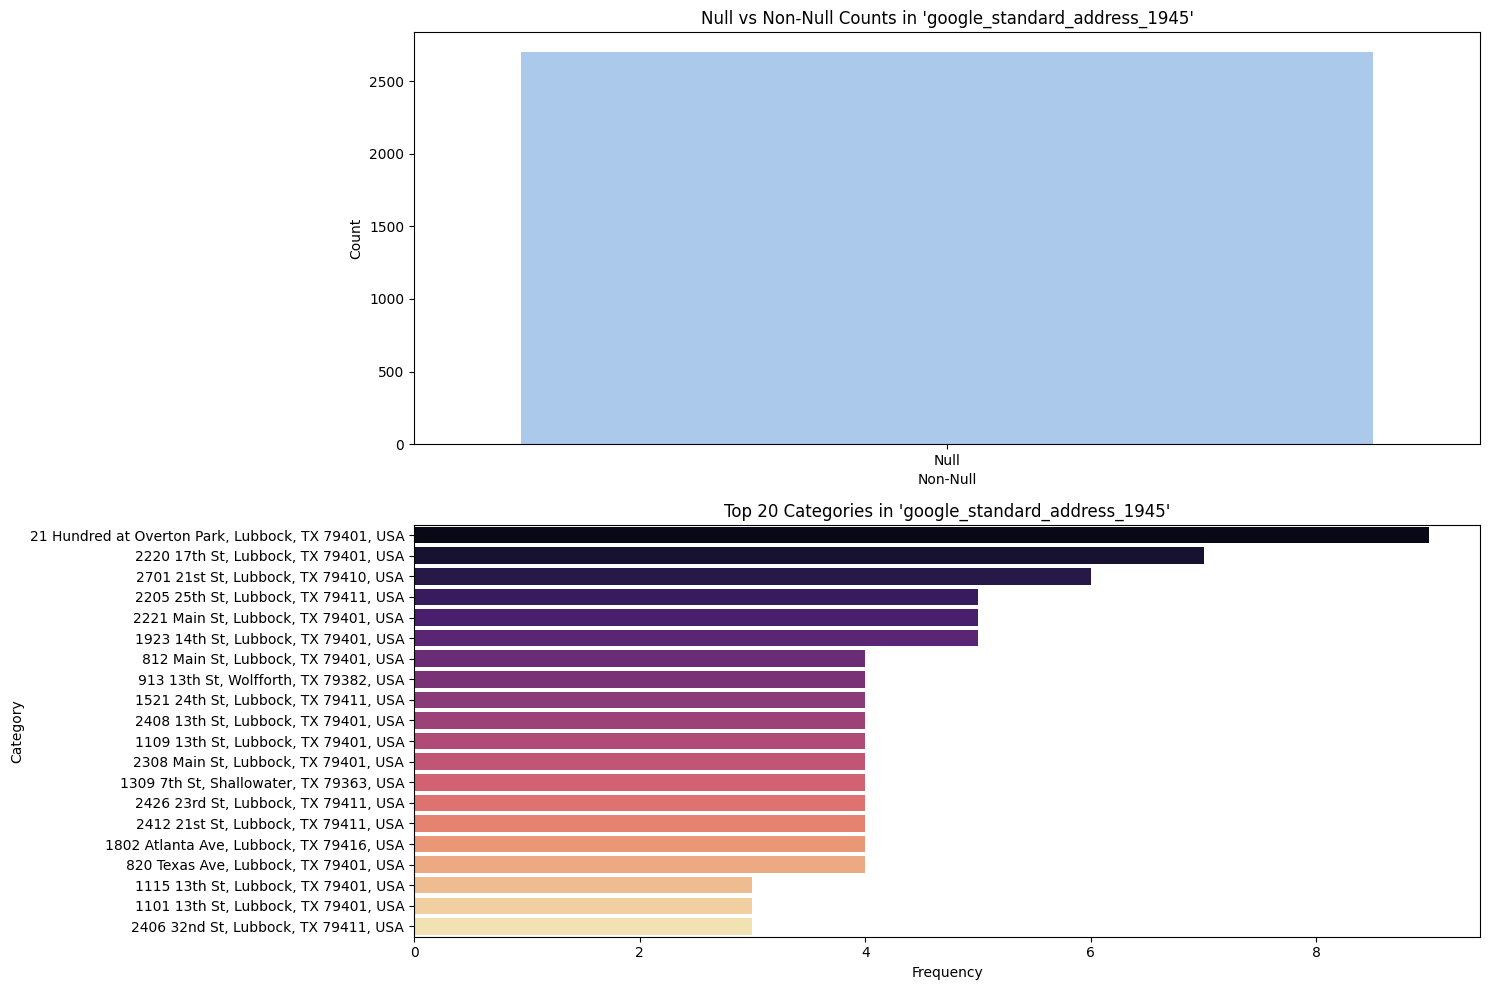

=== Finished Analysis for Column: 'google_standard_address_1945' ===



In [43]:
analyze_raw_column(df1945, "google_standard_address_1945")

#### zip_code_1945


=== Analyzing Column: 'zip_code_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'zip_code_1945': 2700
Null (NaN) values in 'zip_code_1945': 0
Unique non-null values in 'zip_code_1945': 24

--- Random Sample of 'zip_code_1945' Values ---
  Row 1339 => 79401.0
  Row 1222 => 79411.0
  Row 1106 => 79411.0
  Row 812 => 79411.0
  Row 1231 => 79401.0

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 0 => 79411.0
   Row 1 => 79410.0
   Row 2 => 79411.0
   Row 3 => 79411.0
   Row 4 => 79401.0
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 2700 non-null values, 2700 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'zip_code_1945':
count     2700.000000
mean     79401.995185
std         75.803452
min      76109.000000
25%      79401.000000
50%      79410.000000
75%      79411.000000
max      79761.000000
dtype: float64

--- Plott

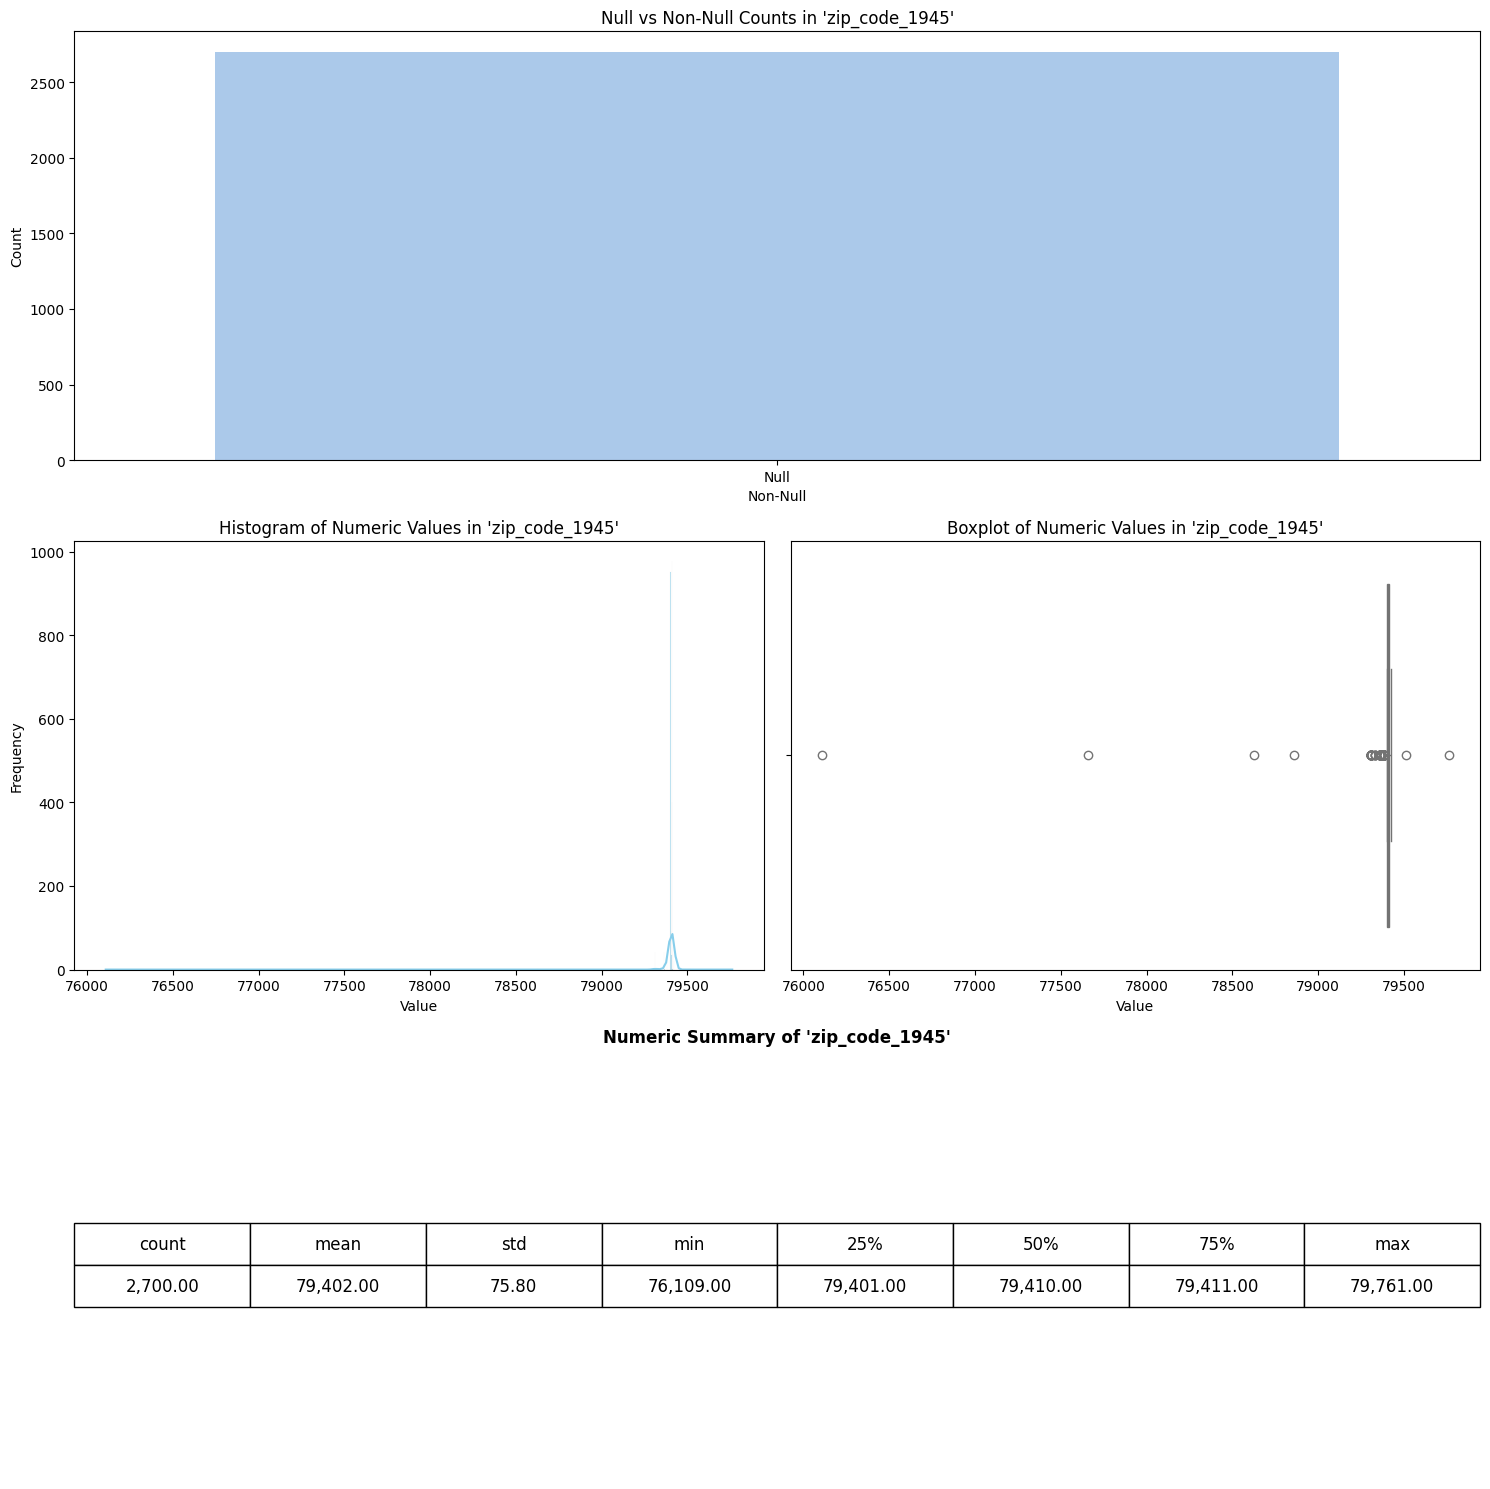

=== Finished Analysis for Column: 'zip_code_1945' ===



In [44]:
analyze_raw_column(df1945, "zip_code_1945")

#### latitude_1945


=== Analyzing Column: 'latitude_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'latitude_1945': 2700
Null (NaN) values in 'latitude_1945': 0
Unique non-null values in 'latitude_1945': 2199

--- Random Sample of 'latitude_1945' Values ---
  Row 1339 => 33.57834
  Row 1222 => 33.5677881
  Row 1106 => 33.573083
  Row 812 => 33.5734493
  Row 1231 => 33.5819526

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 0 => 33.5743813
   Row 1 => 33.5690699
   Row 2 => 33.5664449
   Row 3 => 33.5699027
   Row 4 => 33.5819486
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 2700 non-null values, 2700 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'latitude_1945':
count    2700.000000
mean       33.576255
std         0.130775
min        29.341219
25%        33.571150
50%        33.576391
75%        33.583561
max        33.839271
dtyp

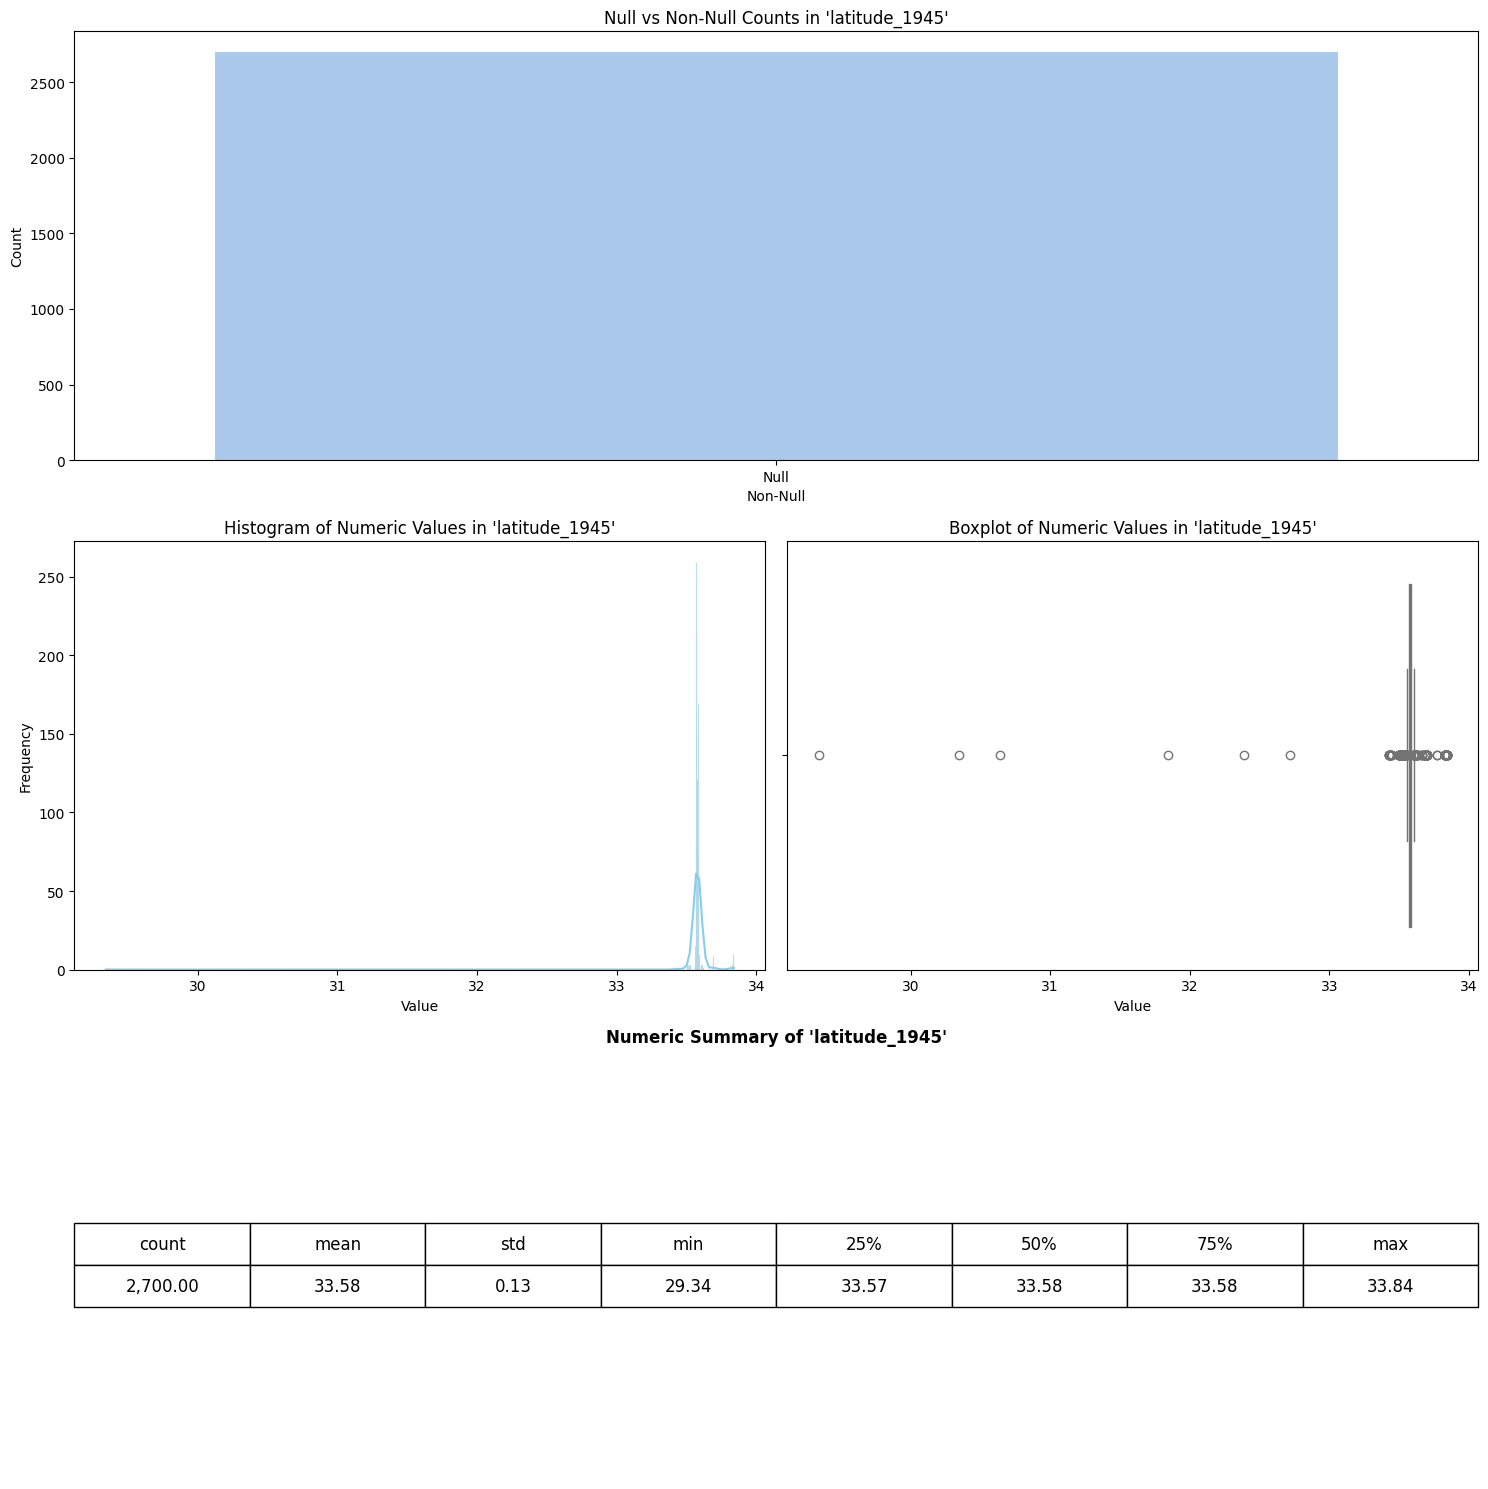

=== Finished Analysis for Column: 'latitude_1945' ===



In [45]:
analyze_raw_column(df1945, "latitude_1945")

#### longitude_1945


=== Analyzing Column: 'longitude_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'longitude_1945': 2700
Null (NaN) values in 'longitude_1945': 0
Unique non-null values in 'longitude_1945': 2225

--- Random Sample of 'longitude_1945' Values ---
  Row 1339 => -101.8475176
  Row 1222 => -101.8625025
  Row 1106 => -101.8528547
  Row 812 => -101.8677612
  Row 1231 => -101.8601555

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 0 => -101.8679377
   Row 1 => -101.8780783
   Row 2 => -101.8666642
   Row 3 => -101.8585962
   Row 4 => -101.8621258
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 2700 non-null values, 2700 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'longitude_1945':
count    2700.000000
mean     -101.855207
std         0.200294
min      -102.342790
25%      -101.868746
50%      -101.861021
75%      -101.851

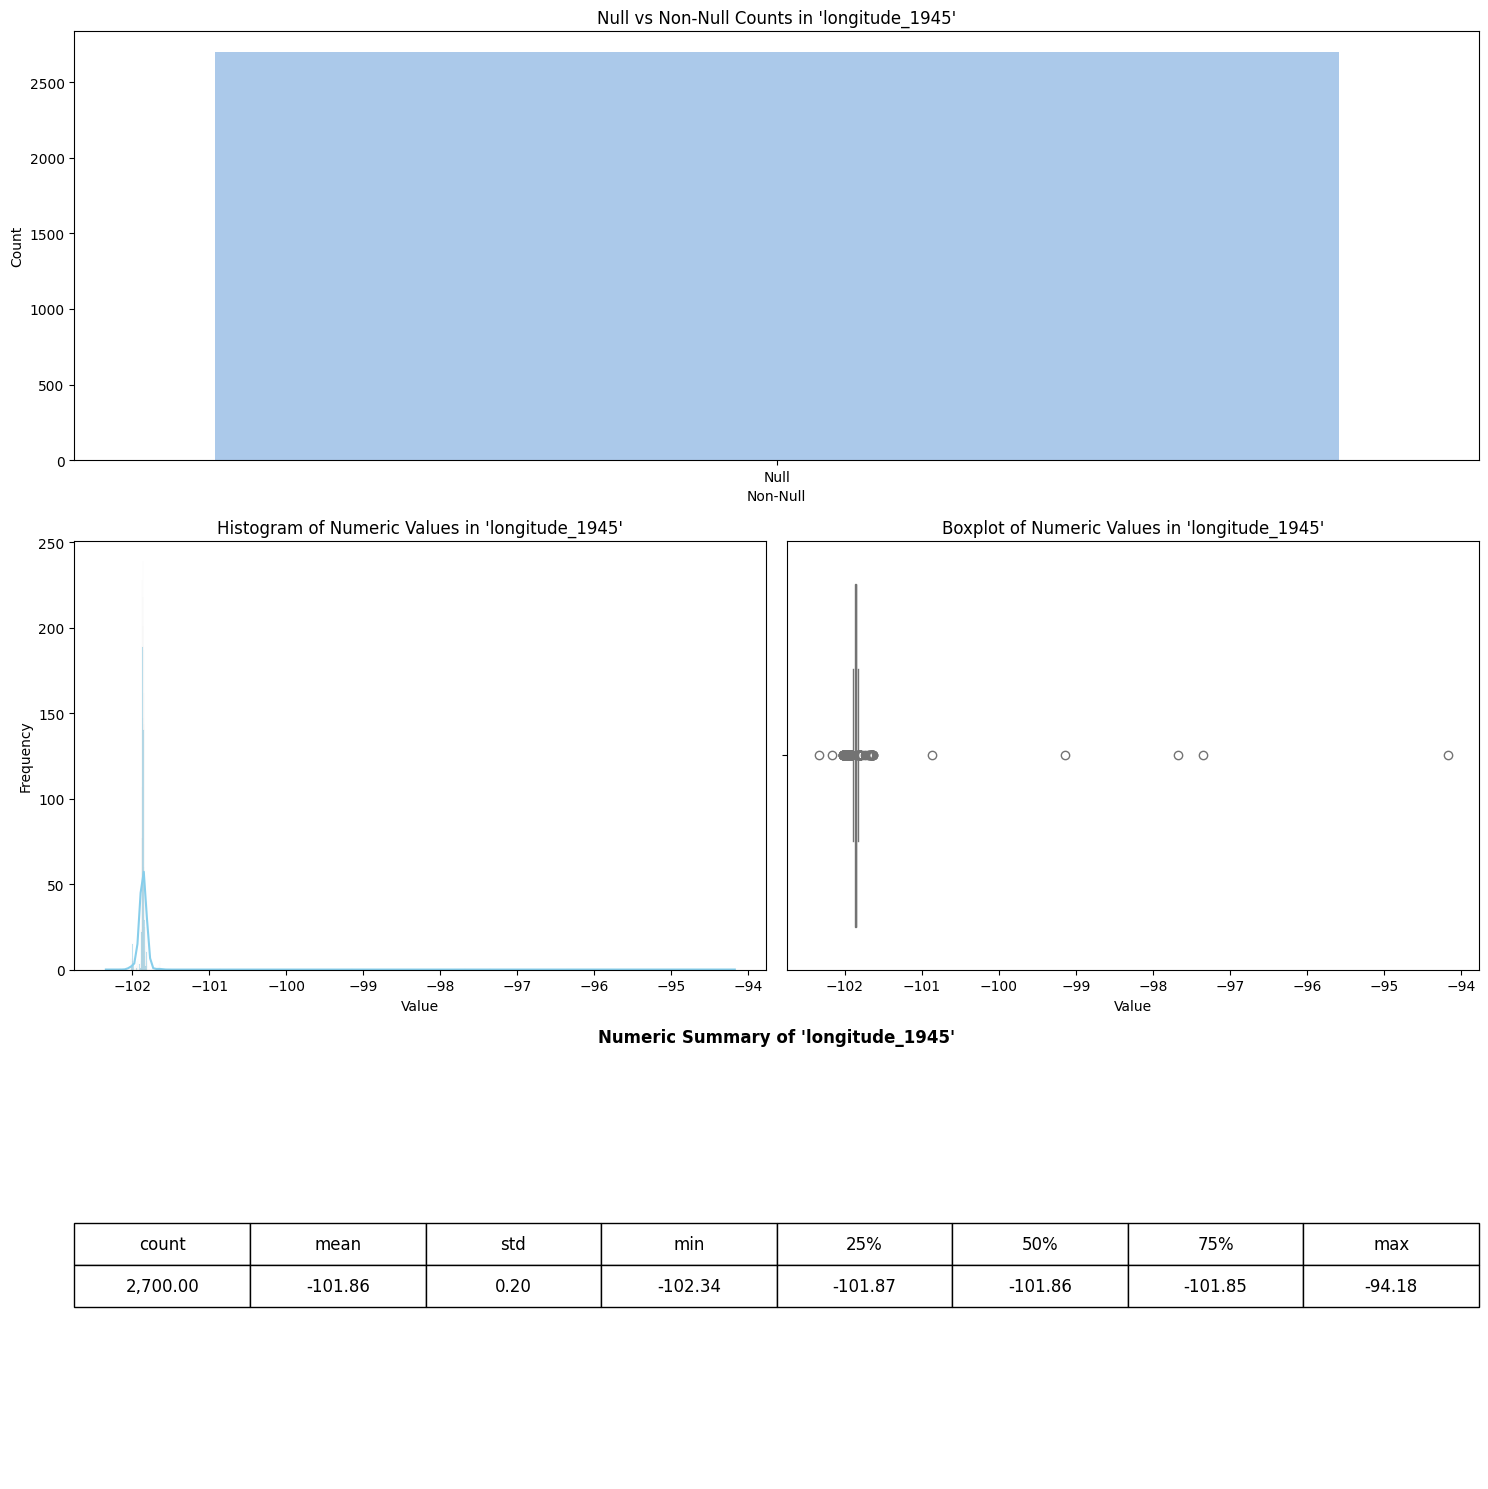

=== Finished Analysis for Column: 'longitude_1945' ===



In [46]:
analyze_raw_column(df1945, "longitude_1945")

#### aceres_rendered_1945

In [47]:
analyze_raw_column(df1945, "aceres_rendered_1945")


=== Analyzing Column: 'aceres_rendered_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'aceres_rendered_1945': 0
Null (NaN) values in 'aceres_rendered_1945': 2700
Unique non-null values in 'aceres_rendered_1945': 0

--- Random Sample of 'aceres_rendered_1945' Values ---
  No non-null values to sample in 'aceres_rendered_1945'.

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 0 non-null values, 0 can be cast to numeric, 0 cannot.
No numeric values to summarize.

--- Plotting Section ---
No plots to display for column 'aceres_rendered_1945'.
=== Finished Analysis for Column: 'aceres_rendered_1945' ===



#### value_dollars_1945

In [48]:
analyze_raw_column(df1945, "value_dollars_1945")


=== Analyzing Column: 'value_dollars_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'value_dollars_1945': 0
Null (NaN) values in 'value_dollars_1945': 2700
Unique non-null values in 'value_dollars_1945': 0

--- Random Sample of 'value_dollars_1945' Values ---
  No non-null values to sample in 'value_dollars_1945'.

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 0 non-null values, 0 can be cast to numeric, 0 cannot.
No numeric values to summarize.

--- Plotting Section ---
No plots to display for column 'value_dollars_1945'.
=== Finished Analysis for Column: 'value_dollars_1945' ===



#### designate_homestead_1945


=== Analyzing Column: 'designate_homestead_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'designate_homestead_1945': 1298
Null (NaN) values in 'designate_homestead_1945': 1402
Unique non-null values in 'designate_homestead_1945': 89

--- Random Sample of 'designate_homestead_1945' Values ---
  Row 2271 => 1500.0
  Row 1699 => 2000.0
  Row 2498 => 1750.0
  Row 1901 => 2100.0
  Row 1676 => 1800.0

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 885 => 2700.0
   Row 887 => 1800.0
   Row 888 => 1750.0
   Row 889 => 1800.0
   Row 890 => 2200.0
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 1298 non-null values, 1298 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'designate_homestead_1945':
count    1298.000000
mean     1703.697227
std       723.530973
min         4.000000
25%      1300.000000
50%      1700.000000
75%  

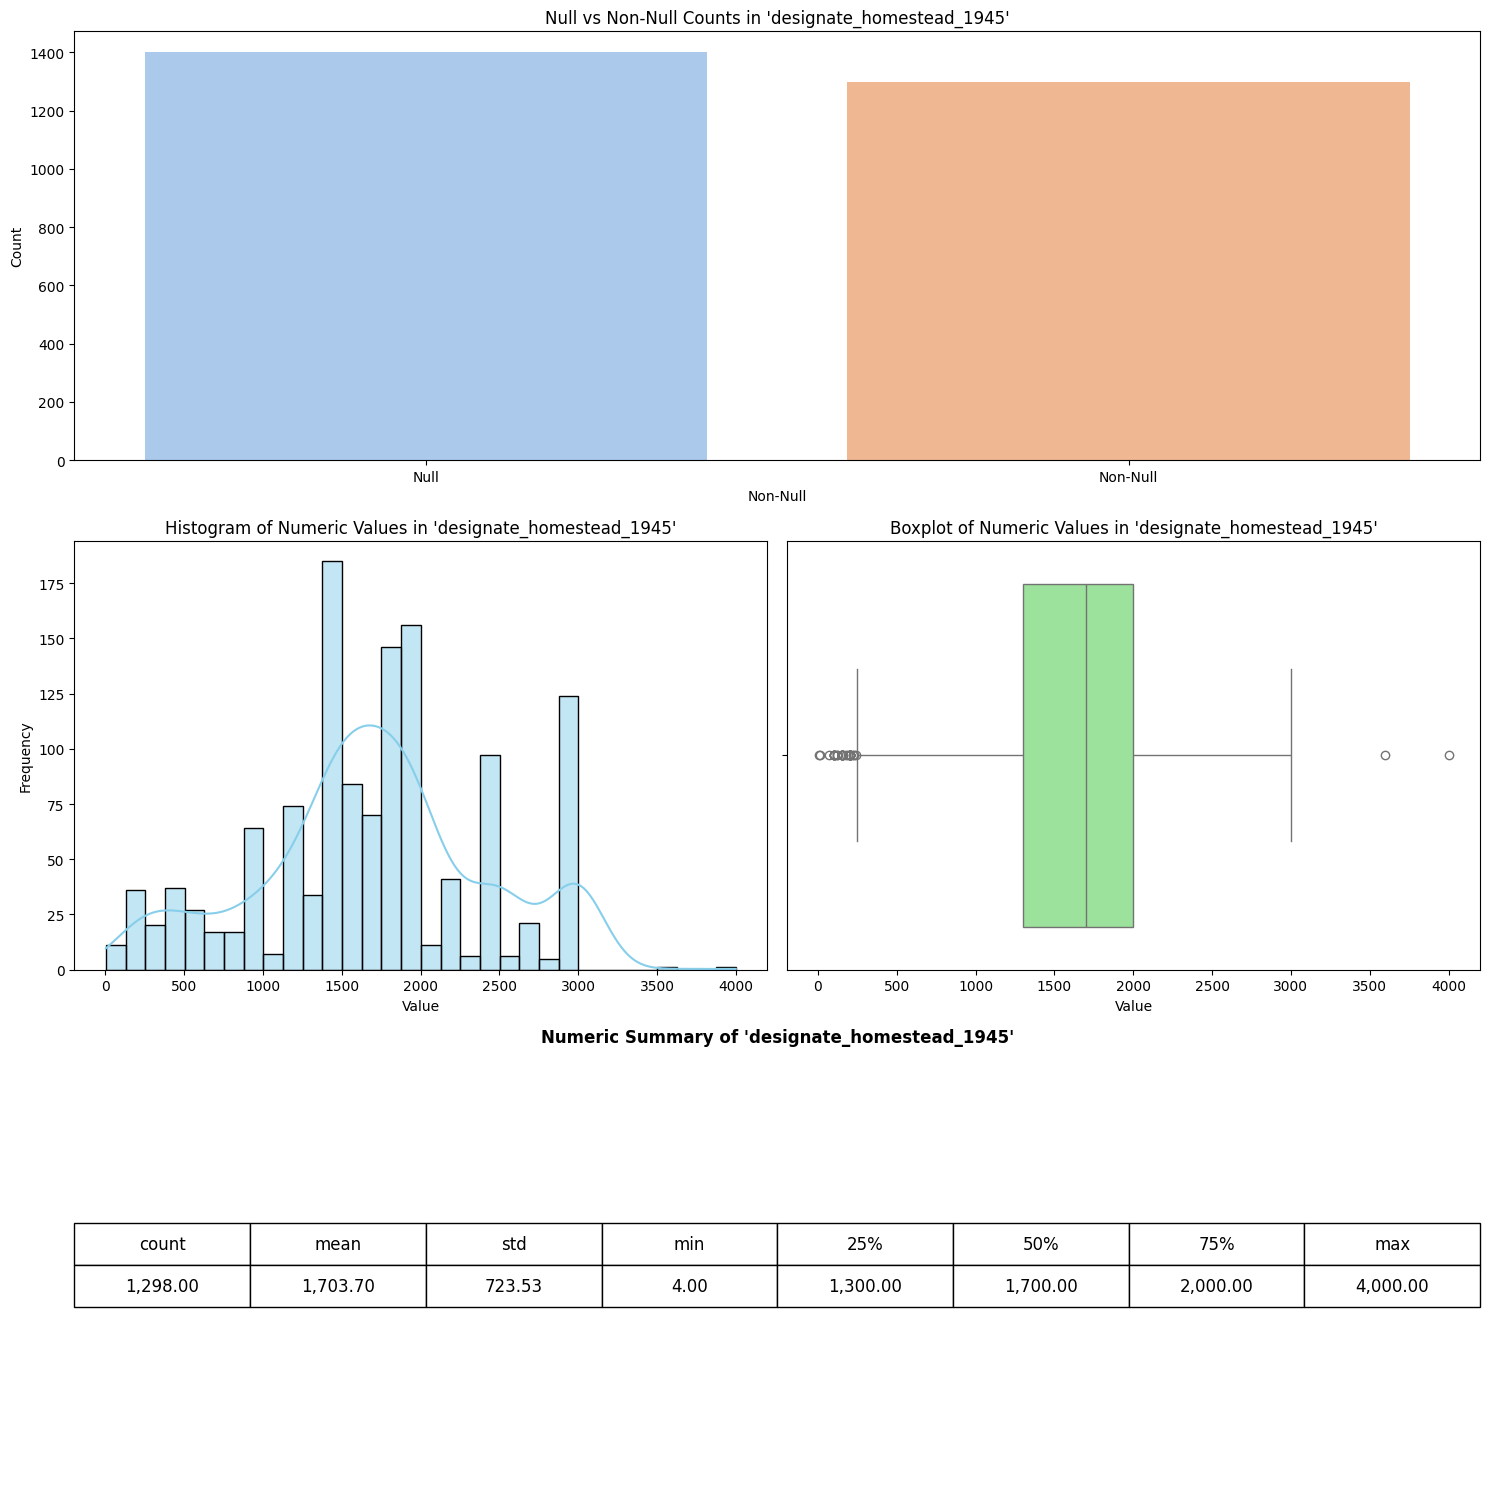

=== Finished Analysis for Column: 'designate_homestead_1945' ===



In [49]:
analyze_raw_column(df1945, "designate_homestead_1945")

#### value_of_city_property_1945


=== Analyzing Column: 'value_of_city_property_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'value_of_city_property_1945': 2320
Null (NaN) values in 'value_of_city_property_1945': 380
Unique non-null values in 'value_of_city_property_1945': 146

--- Random Sample of 'value_of_city_property_1945' Values ---
  Row 1968 => 1400.0
  Row 1396 => 1700.0
  Row 106 => 1400.0
  Row 930 => 1800.0
  Row 286 => 2760.0

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 0 => 2700.0
   Row 1 => 1800.0
   Row 2 => 2200.0
   Row 3 => 1500.0
   Row 4 => 2000.0
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 2320 non-null values, 2320 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'value_of_city_property_1945':
count     2320.000000
mean      1830.198707
std       1819.337962
min         10.000000
25%       1200.000000
50%       1700.0

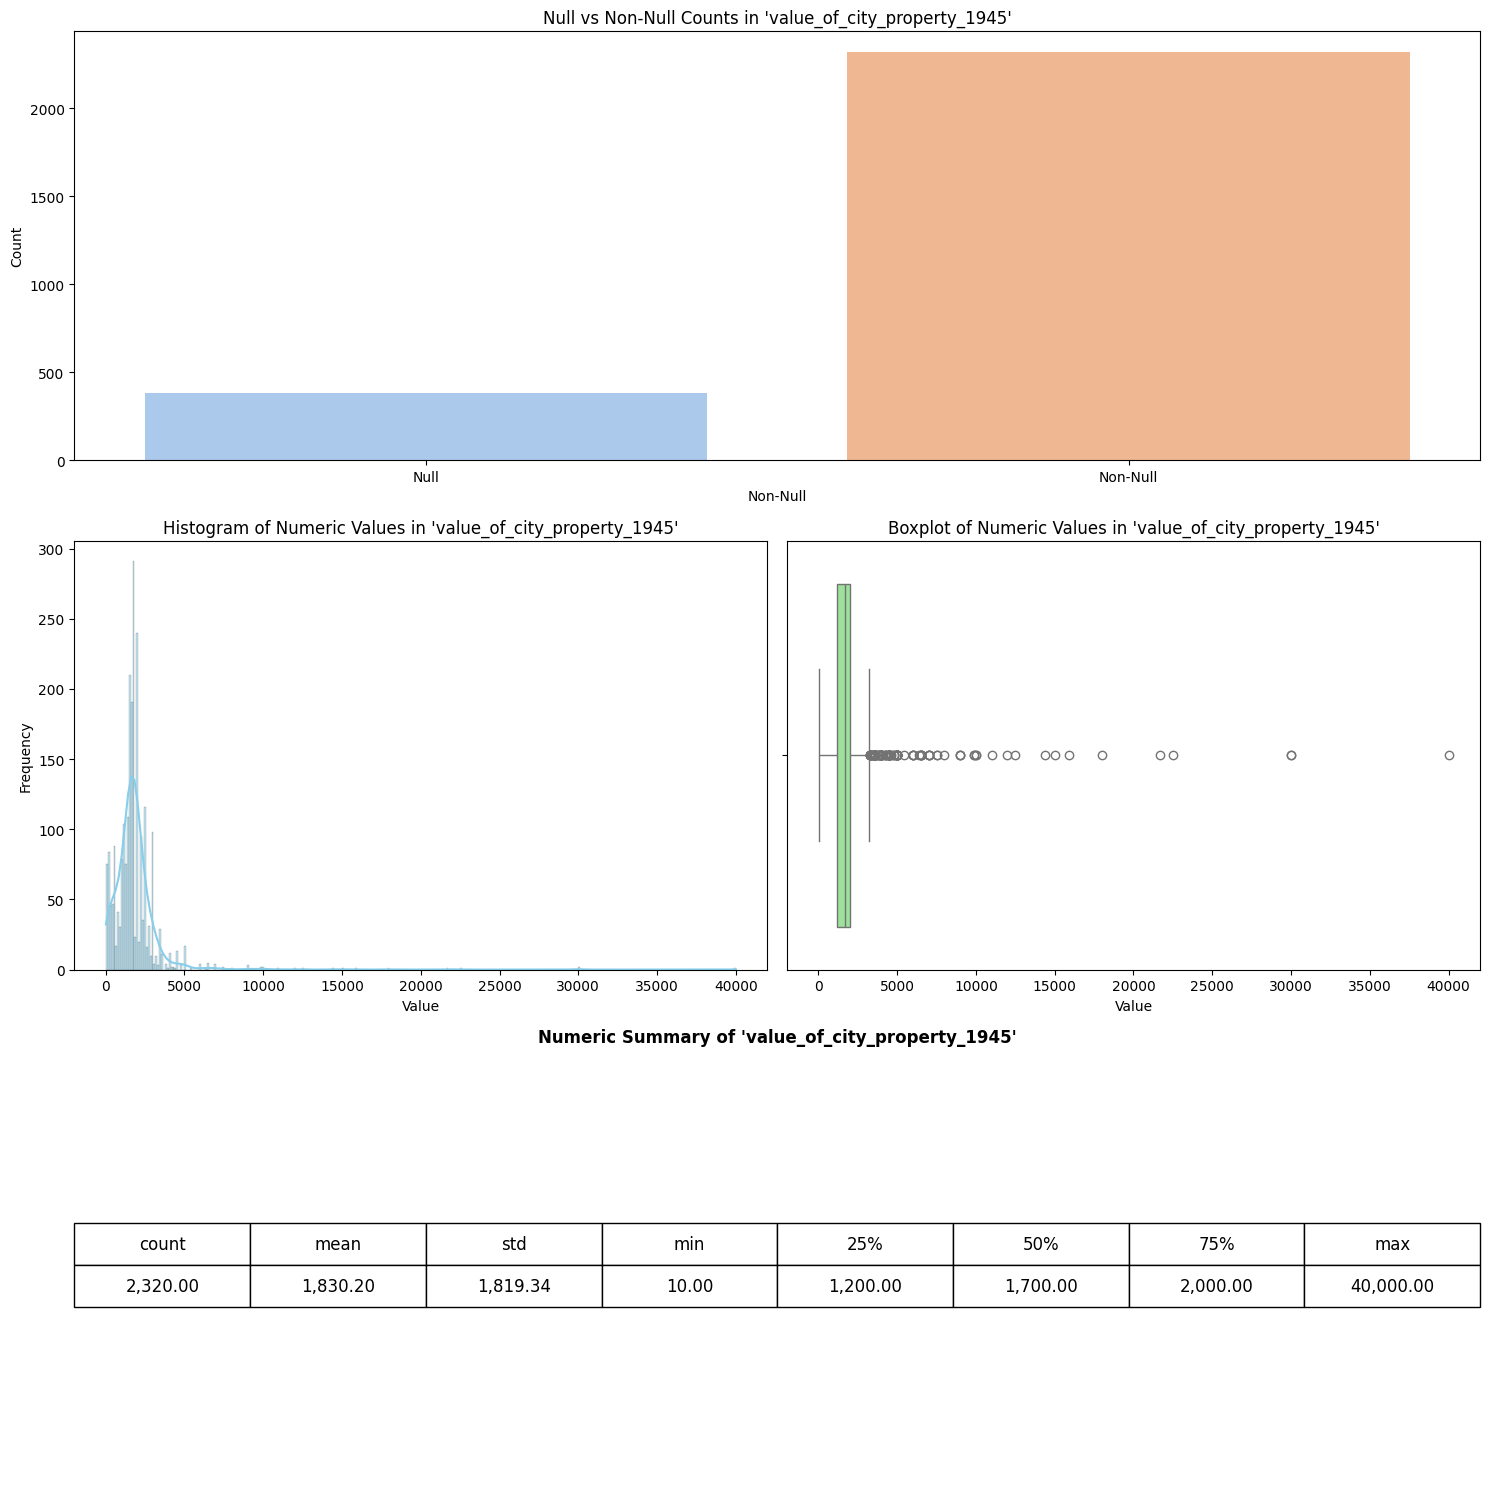

=== Finished Analysis for Column: 'value_of_city_property_1945' ===



In [50]:
analyze_raw_column(df1945, "value_of_city_property_1945")

#### value_of_personal_property_1945


=== Analyzing Column: 'value_of_personal_property_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'value_of_personal_property_1945': 367
Null (NaN) values in 'value_of_personal_property_1945': 2333
Unique non-null values in 'value_of_personal_property_1945': 113

--- Random Sample of 'value_of_personal_property_1945' Values ---
  Row 1883 => 150.0
  Row 1034 => 1500.0
  Row 964 => 180.0
  Row 2387 => 550.0
  Row 1146 => 200.0

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 886 => 2850.0
   Row 895 => 150.0
   Row 901 => 150.0
   Row 904 => 150.0
   Row 910 => 200.0
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 367 non-null values, 367 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'value_of_personal_property_1945':
count      367.000000
mean      1660.844687
std       4033.983928
min         30.000000
25%        1

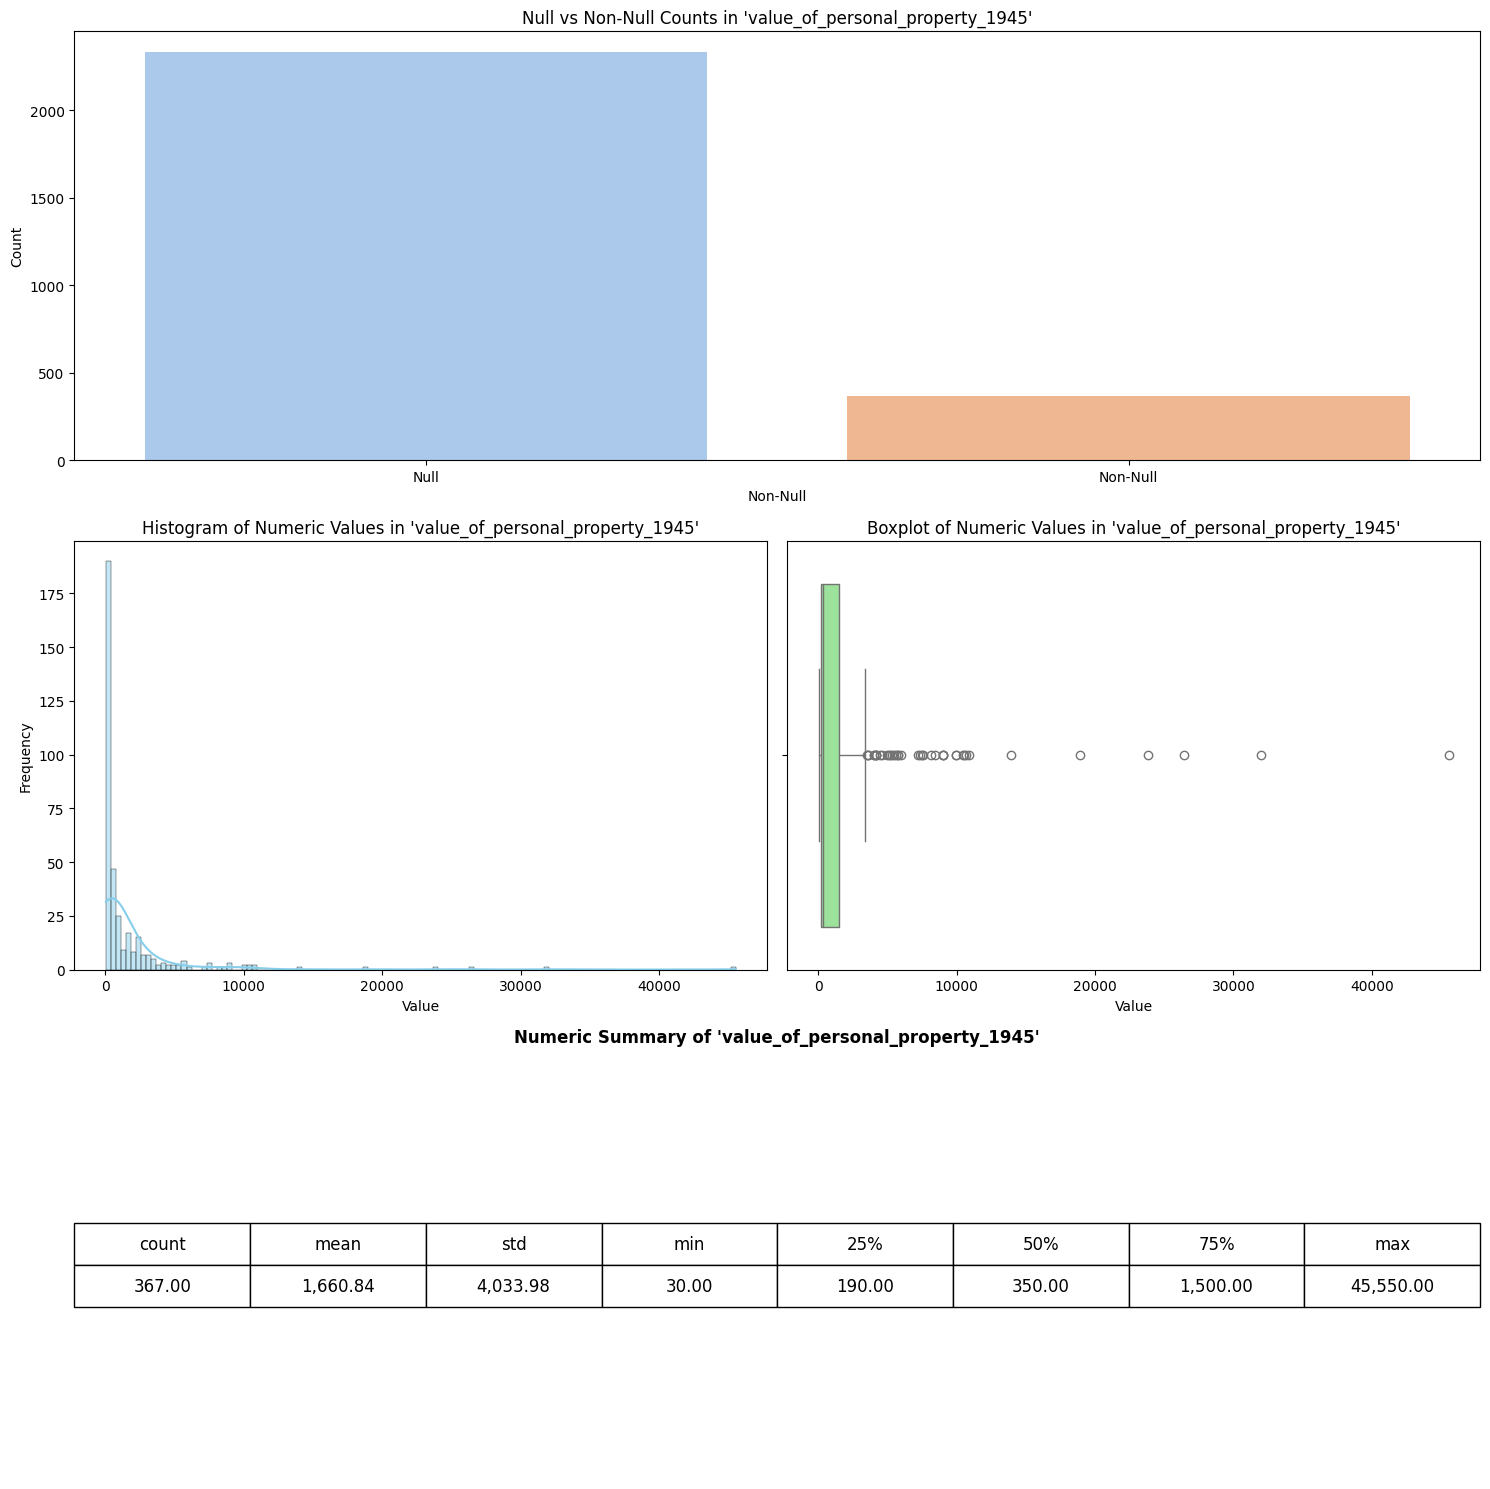

=== Finished Analysis for Column: 'value_of_personal_property_1945' ===



In [51]:
analyze_raw_column(df1945, "value_of_personal_property_1945")

#### total_value_for_state_tax_1945

In [52]:
analyze_raw_column(df1945, "Total_value_for_state_tax_1945")


=== Analyzing Column: 'Total_value_for_state_tax_1945' ===
ERROR: Column 'Total_value_for_state_tax_1945' does not exist in the provided DataFrame.



#### state_tax_1945


=== Analyzing Column: 'state_tax_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'state_tax_1945': 567
Null (NaN) values in 'state_tax_1945': 2133
Unique non-null values in 'state_tax_1945': 198

--- Random Sample of 'state_tax_1945' Values ---
  Row 2660 => 23.04
  Row 2608 => 72.0
  Row 1640 => 4.32
  Row 2614 => 144.0
  Row 2478 => 1080.0

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 886 => 20.52
   Row 895 => 1.8
   Row 901 => 1.8
   Row 904 => 1.08
   Row 905 => 7.92
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 567 non-null values, 567 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'state_tax_1945':
count     567.000000
mean      183.048589
std       658.394315
min         0.070000
25%         1.800000
50%         7.200000
75%        32.475000
max      7560.000000
dtype: float64

--- Plotting Section ---


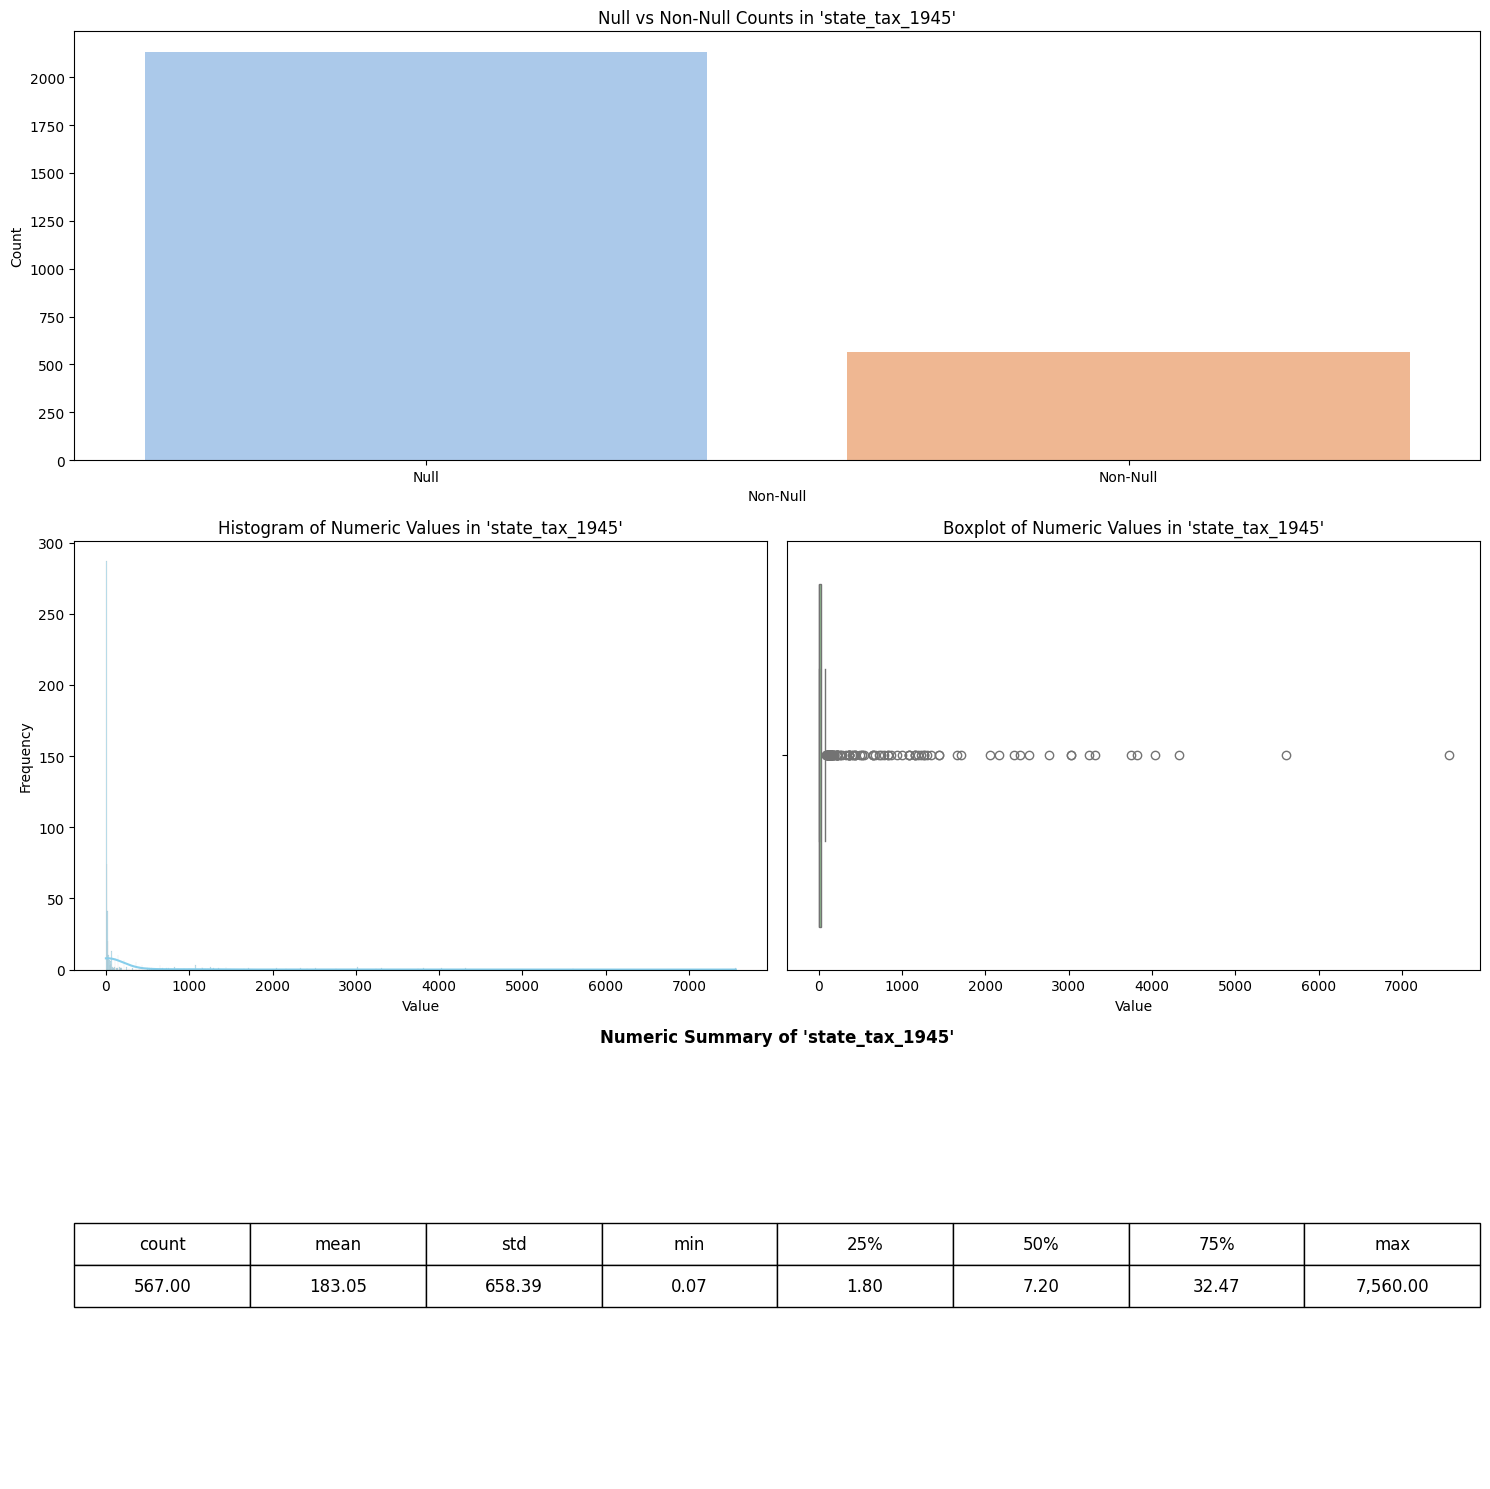

=== Finished Analysis for Column: 'state_tax_1945' ===



In [53]:
analyze_raw_column(df1945, "state_tax_1945")

#### county_tax_1945


=== Analyzing Column: 'county_tax_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'county_tax_1945': 1538
Null (NaN) values in 'county_tax_1945': 1162
Unique non-null values in 'county_tax_1945': 274

--- Random Sample of 'county_tax_1945' Values ---
  Row 1453 => 10.0
  Row 972 => 6.75
  Row 2655 => 73.0
  Row 1684 => 0.5
  Row 2549 => 900.0

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 885 => 13.5
   Row 886 => 14.25
   Row 887 => 9.0
   Row 888 => 8.75
   Row 889 => 9.0
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 1538 non-null values, 1538 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'county_tax_1945':
count    1538.000000
mean      180.163033
std       436.416832
min         0.050000
25%         6.500000
50%         9.500000
75%        20.375000
max      5250.000000
dtype: float64

--- Plotting Section -

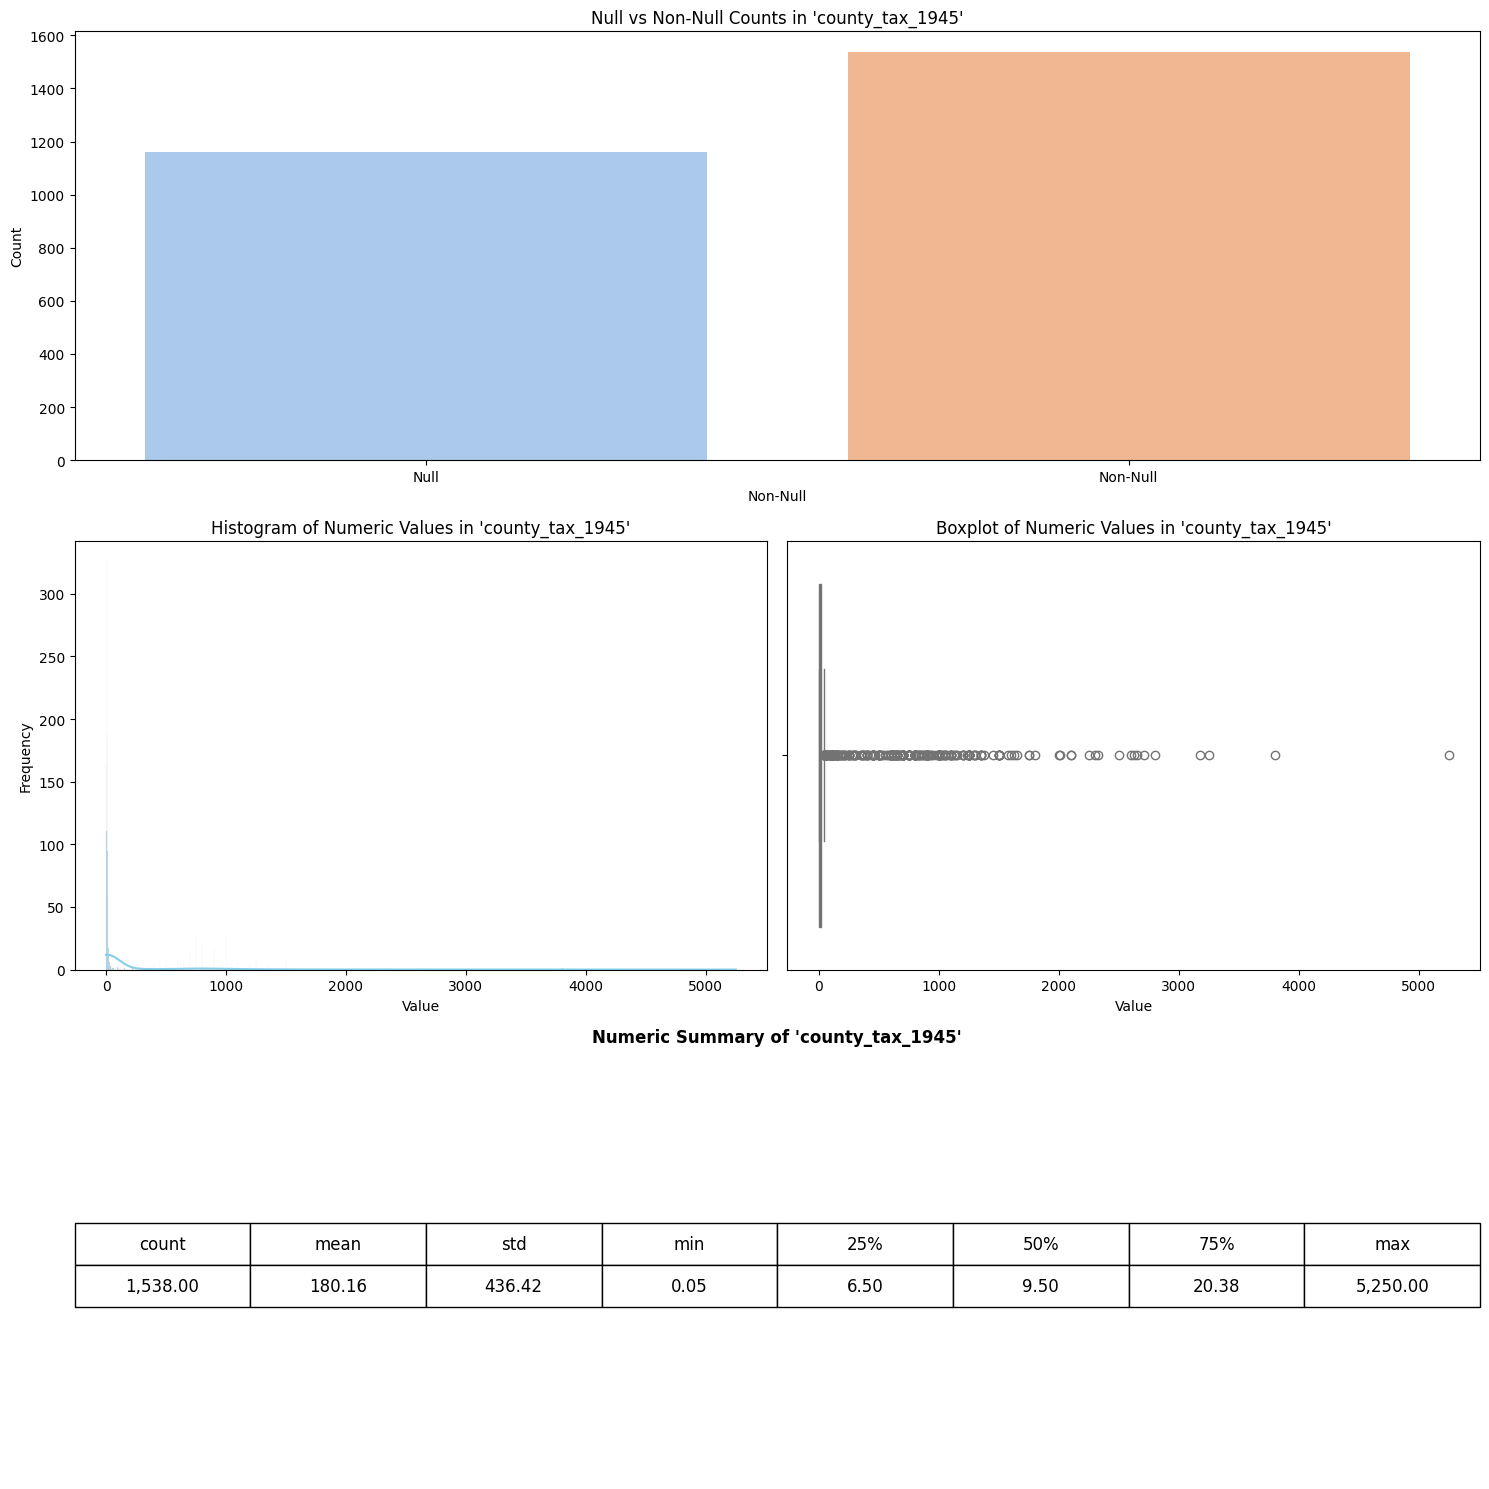

=== Finished Analysis for Column: 'county_tax_1945' ===



In [54]:
analyze_raw_column(df1945, "county_tax_1945")

#### district_school_1945

In [55]:
analyze_raw_column(df1945, "district_school_1945")


=== Analyzing Column: 'district_school_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'district_school_1945': 0
Null (NaN) values in 'district_school_1945': 2700
Unique non-null values in 'district_school_1945': 0

--- Random Sample of 'district_school_1945' Values ---
  No non-null values to sample in 'district_school_1945'.

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 0 non-null values, 0 can be cast to numeric, 0 cannot.
No numeric values to summarize.

--- Plotting Section ---
No plots to display for column 'district_school_1945'.
=== Finished Analysis for Column: 'district_school_1945' ===



#### total_tax_1945


=== Analyzing Column: 'total_tax_1945' ===
Total rows in DataFrame: 2700
Non-null values in 'total_tax_1945': 1581
Null (NaN) values in 'total_tax_1945': 1119
Unique non-null values in 'total_tax_1945': 402

--- Random Sample of 'total_tax_1945' Values ---
  Row 1272 => 4.88
  Row 922 => 8.0
  Row 1331 => 21.96
  Row 607 => 7.5
  Row 584 => 25.55

--- Data Type Distribution ---
  Type 'float': 2700 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 2700
   Row 0 => 13.5
   Row 1 => 9.0
   Row 2 => 11.0
   Row 3 => 7.5
   Row 5 => 8.75
   ... 2695 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 1581 non-null values, 1581 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'total_tax_1945':
count     1581.000000
mean       240.476433
std        752.860938
min          0.000000
25%          7.000000
50%         10.000000
75%         30.500000
max      12810.000000
dtype: float64

--- Plotting Section ---


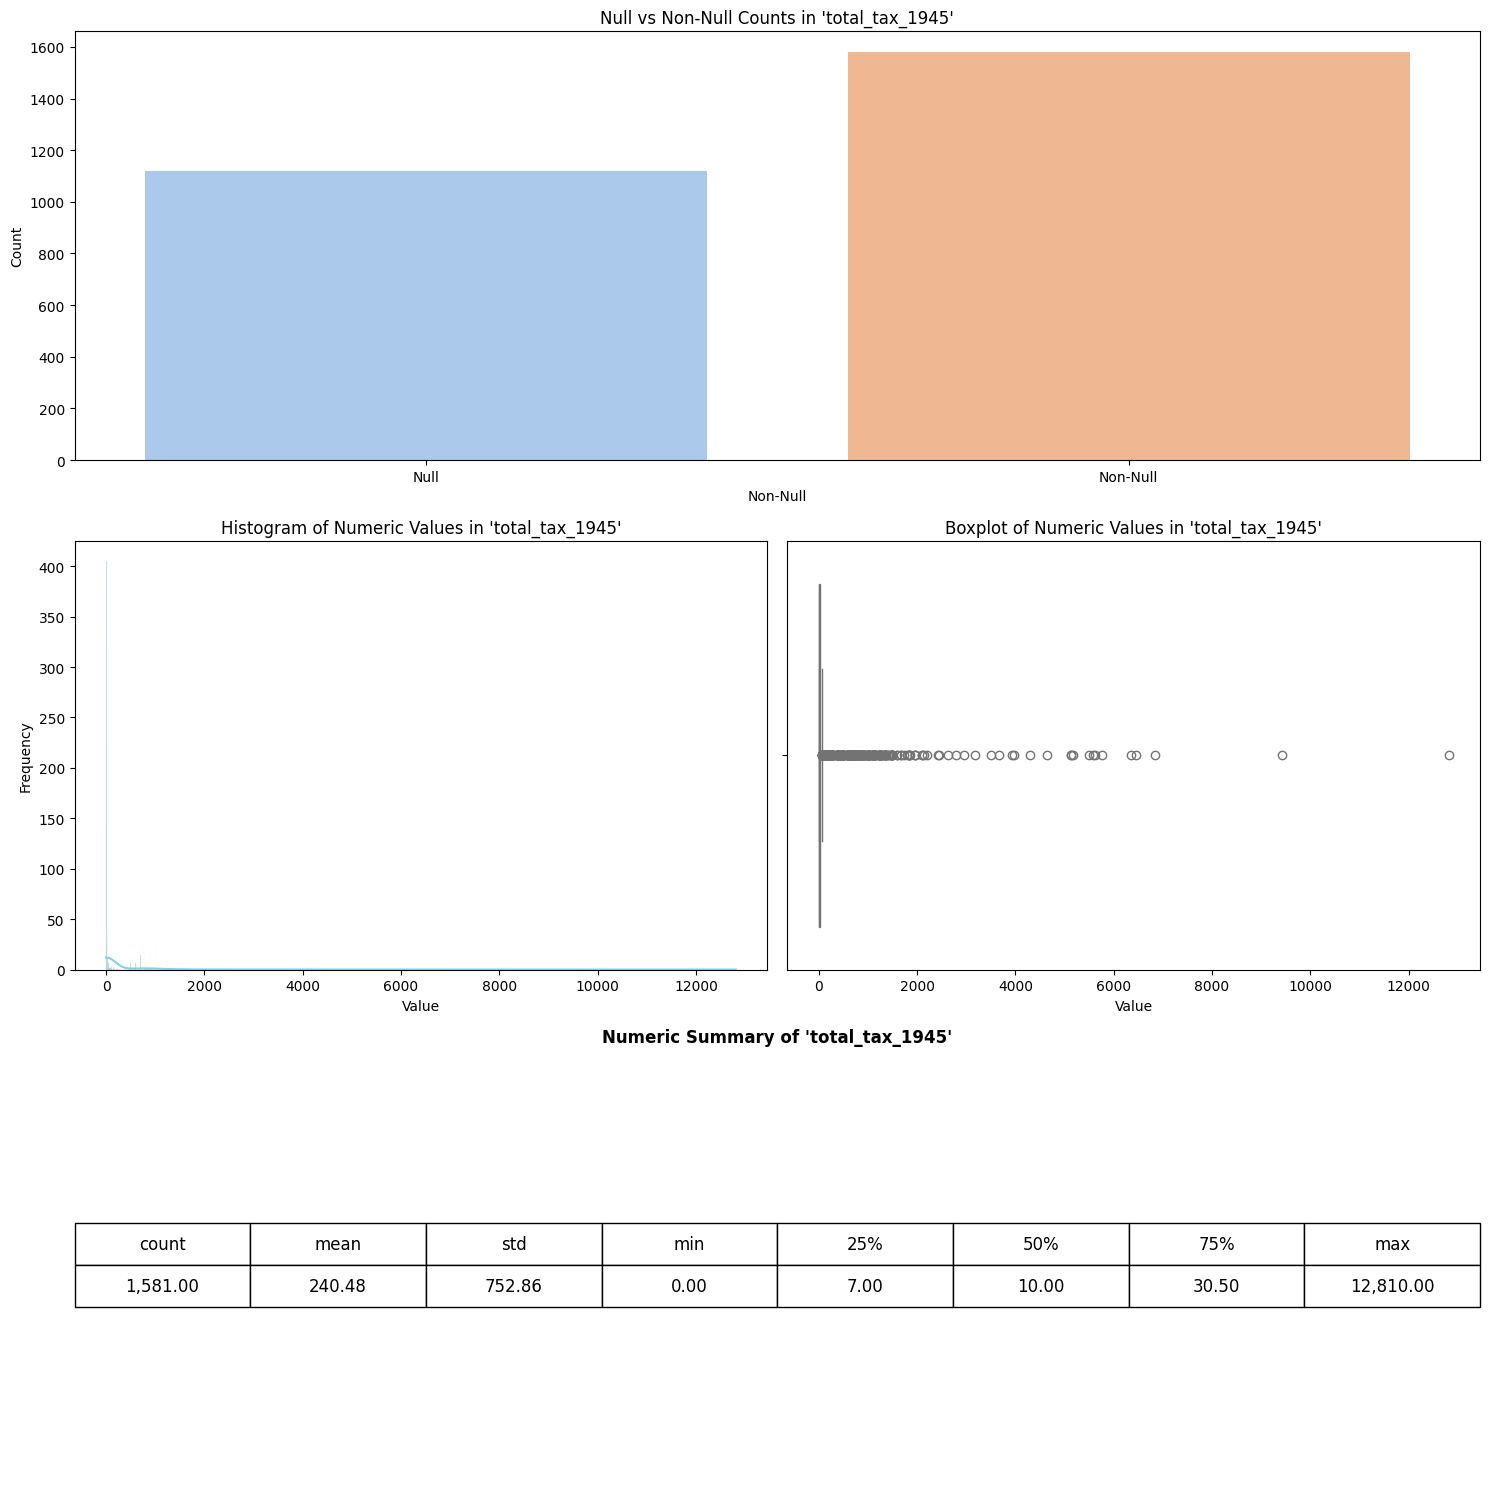

=== Finished Analysis for Column: 'total_tax_1945' ===



In [56]:
analyze_raw_column(df1945, "total_tax_1945")

### Dealing with 1975 Columns

#### google_standard_address_1975


=== Analyzing Column: 'google_standard_address_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'google_standard_address_1975': 40489
Null (NaN) values in 'google_standard_address_1975': 0
Unique non-null values in 'google_standard_address_1975': 26494

--- Random Sample of 'google_standard_address_1975' Values ---
  Row 29985 => 2101 23rd St, Lubbock, TX 79411, USA
  Row 18920 => 2120 65th Pl, Lubbock, TX 79412, USA
  Row 20262 => 2506 32nd St, Lubbock, TX 79410, USA
  Row 7646 => 2134 50th St, Lubbock, TX 79412, USA
  Row 18490 => 5606 45th St, Lubbock, TX 79414, USA

--- Data Type Distribution ---
  Type 'str': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: str | Count: 40489
   Row 0 => '1917 10th St, Lubbock, TX 79401, USA'
   Row 1 => '2820 62nd St, Lubbock, TX 79413, USA'
   Row 2 => '3110 39th St, Lubbock, TX 79413, USA'
   Row 3 => '2704 Colgate St, Lubbock, TX 79415, USA'
   Row 4 => '3412 29th St, Lubbock, TX 79410, USA'
   ... 40484 more value

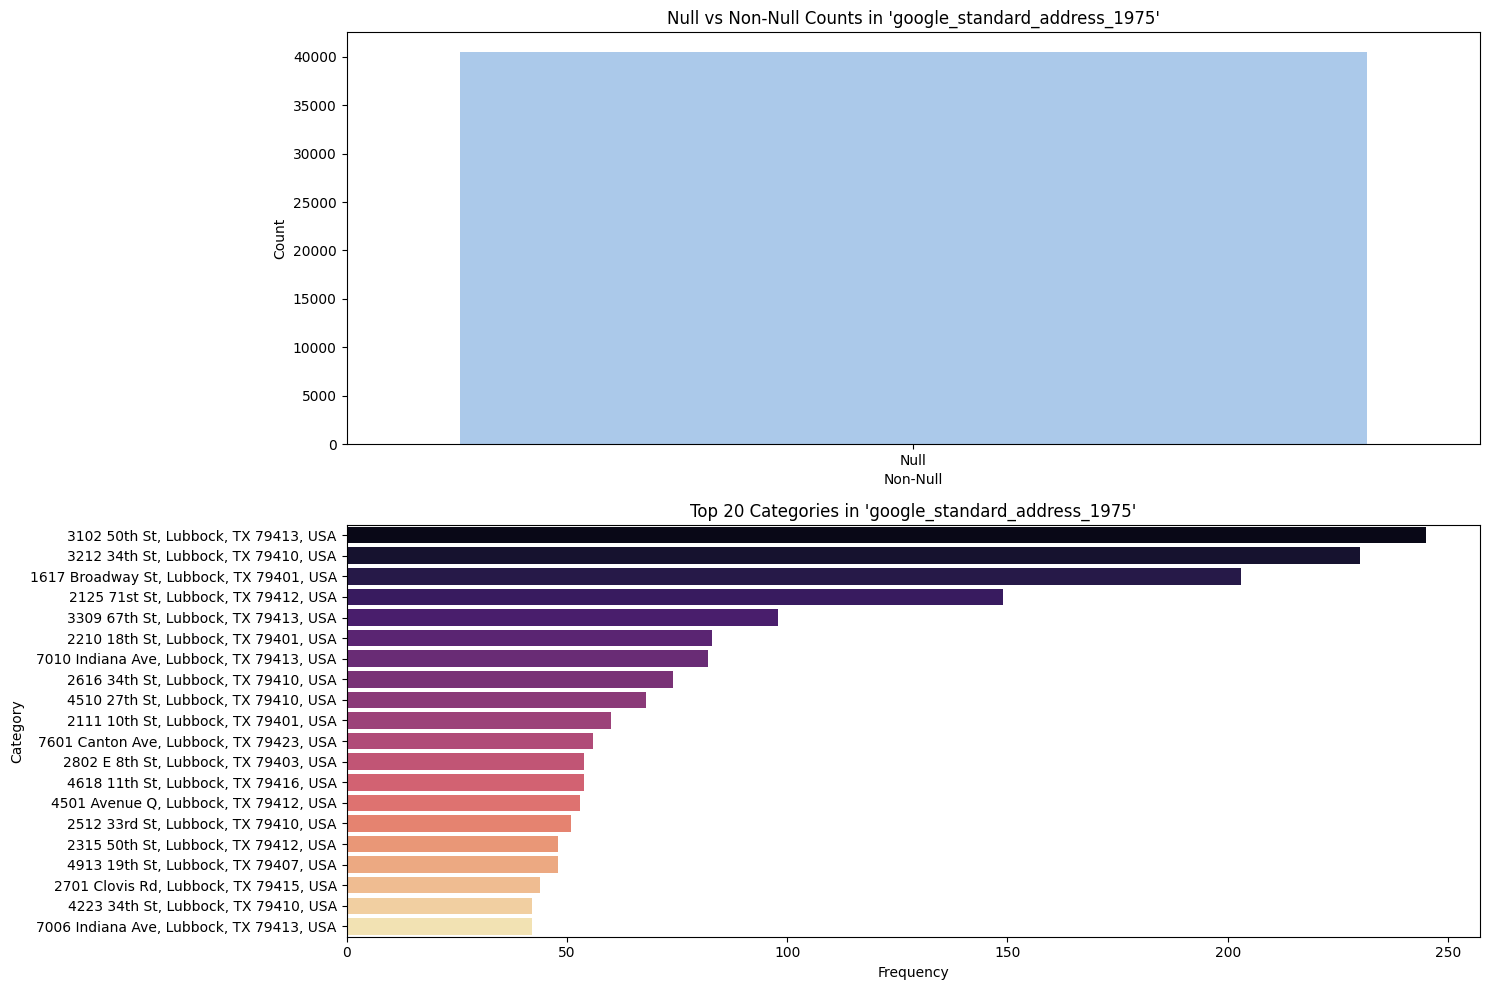

=== Finished Analysis for Column: 'google_standard_address_1975' ===



In [57]:
analyze_raw_column(df1975, "google_standard_address_1975")

#### zip_code_1975


=== Analyzing Column: 'zip_code_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'zip_code_1975': 40486
Null (NaN) values in 'zip_code_1975': 3
Unique non-null values in 'zip_code_1975': 316

--- Random Sample of 'zip_code_1975' Values ---
  Row 16264 => 79411.0
  Row 36927 => 79412.0
  Row 36981 => 79424.0
  Row 32081 => 79403.0
  Row 15294 => 79414.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => 79401.0
   Row 1 => 79413.0
   Row 2 => 79413.0
   Row 3 => 79415.0
   Row 4 => 79410.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 40486 non-null values, 40486 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'zip_code_1975':
count    40486.000000
mean     79297.985723
std       2822.535428
min          0.000000
25%      79407.000000
50%      79412.000000
75%      79413.000000
max      98273.000000
dtype: floa

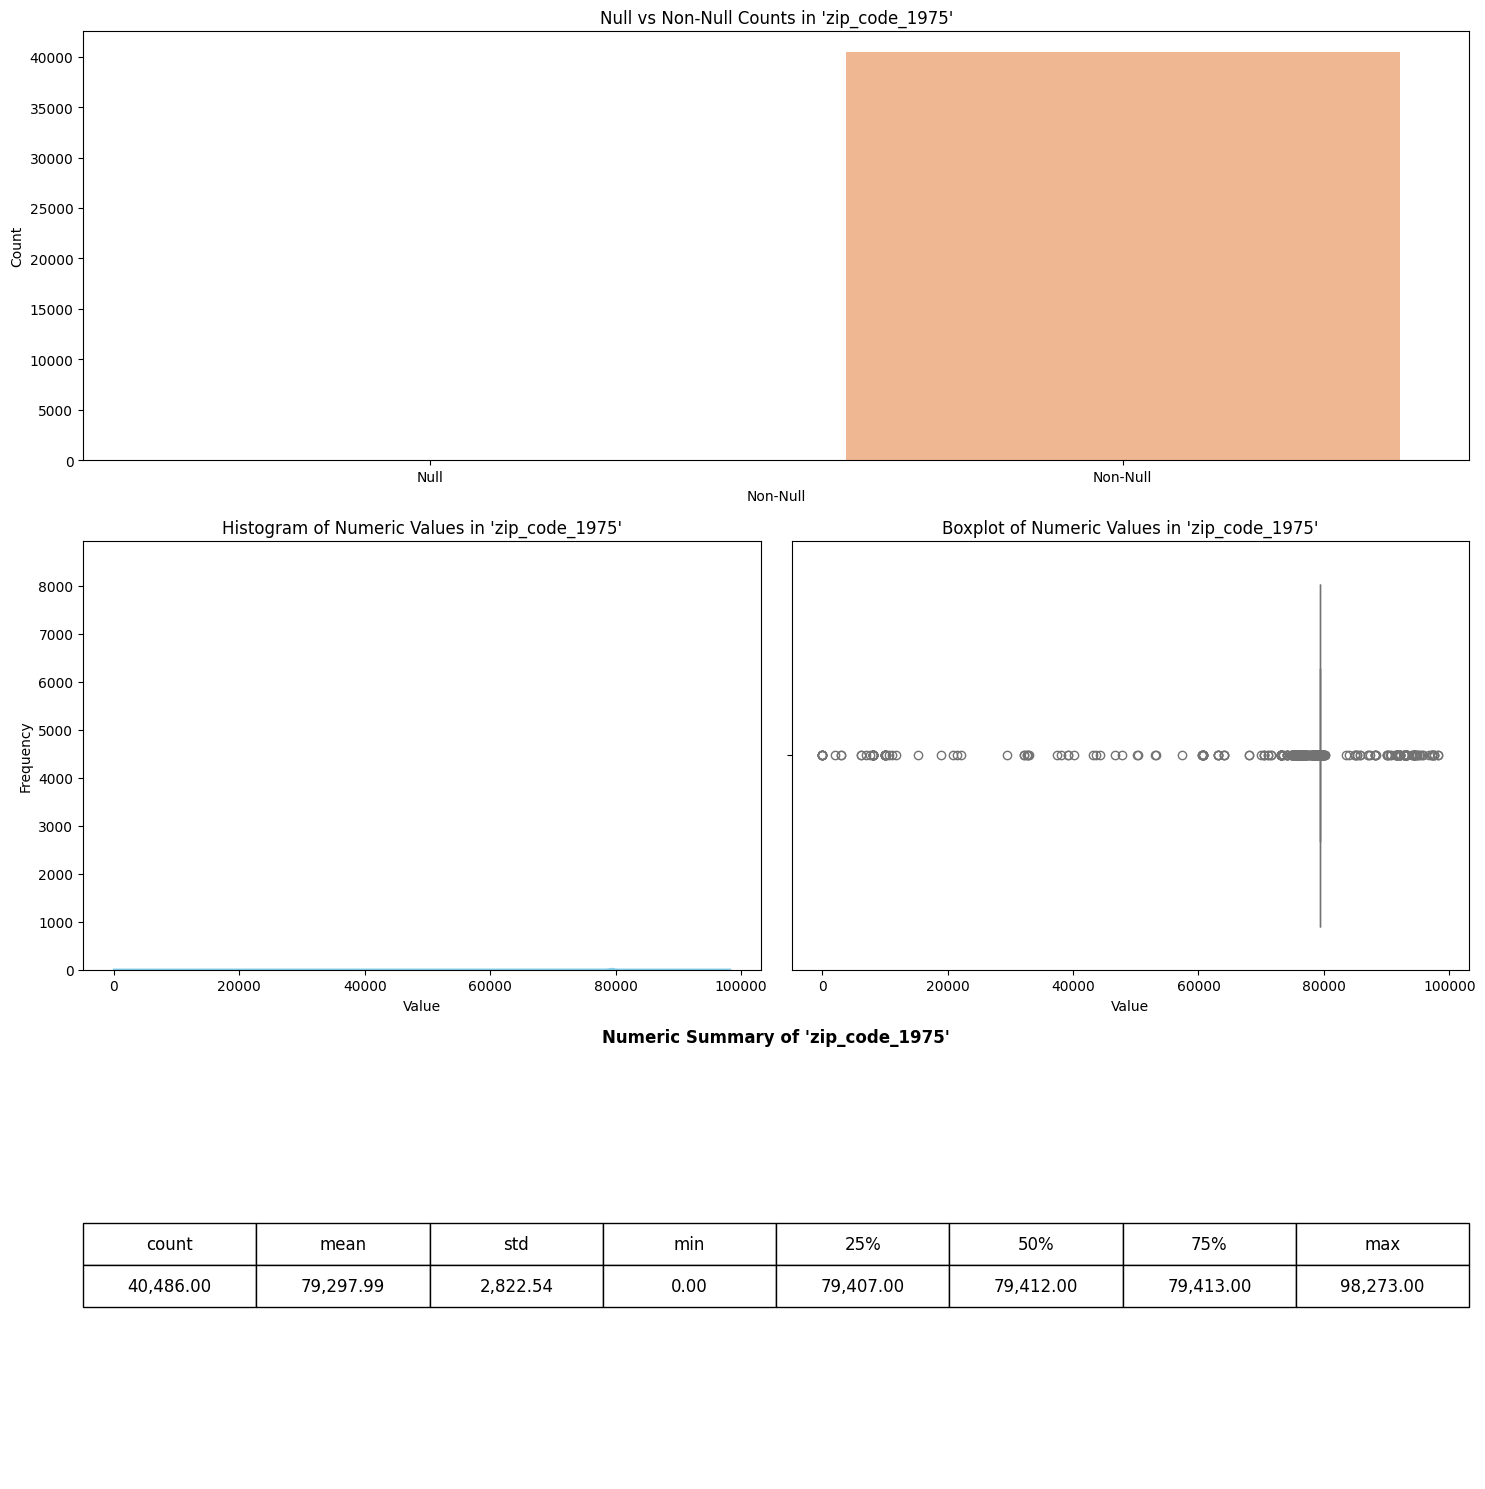

=== Finished Analysis for Column: 'zip_code_1975' ===



In [58]:
analyze_raw_column(df1975, "zip_code_1975")

#### latitude_1975


=== Analyzing Column: 'latitude_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'latitude_1975': 40489
Null (NaN) values in 'latitude_1975': 0
Unique non-null values in 'latitude_1975': 25167

--- Random Sample of 'latitude_1975' Values ---
  Row 29985 => 33.5738009
  Row 18920 => 33.5348017
  Row 20262 => 33.5655068
  Row 7646 => 33.5491013
  Row 18490 => 33.553575

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => 33.5862996
   Row 1 => 33.5379089
   Row 2 => 33.5590502
   Row 3 => 33.6026159
   Row 4 => 33.5680785
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 40489 non-null values, 40489 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'latitude_1975':
count    40489.000000
mean        33.569190
std          0.449783
min         21.307227
25%         33.545842
50%         33.562150
75%         33.578745
max

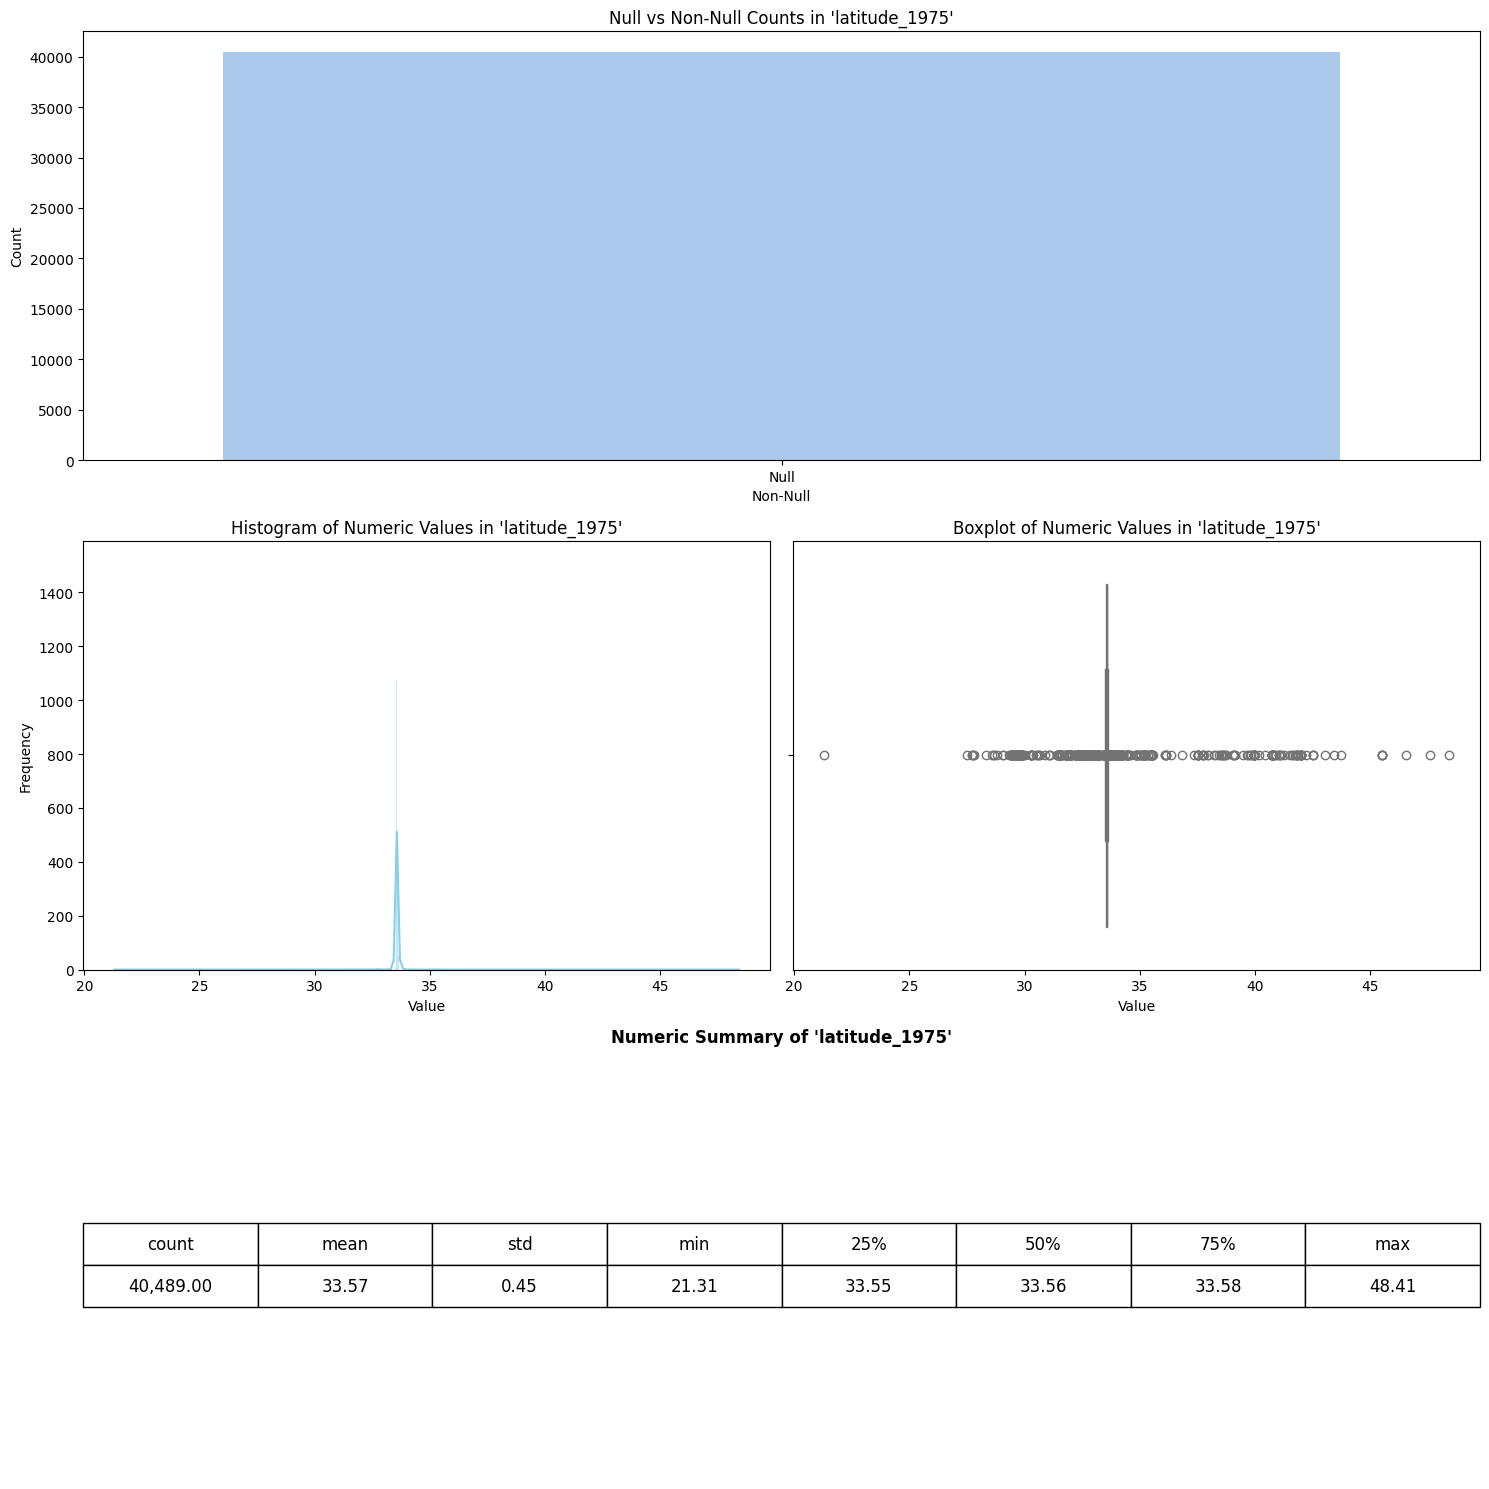

=== Finished Analysis for Column: 'latitude_1975' ===



In [59]:
analyze_raw_column(df1975, "latitude_1975")

#### longitude_1975


=== Analyzing Column: 'longitude_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'longitude_1975': 40489
Null (NaN) values in 'longitude_1975': 0
Unique non-null values in 'longitude_1975': 25442

--- Random Sample of 'longitude_1975' Values ---
  Row 29985 => -101.8610881
  Row 18920 => -101.8641193
  Row 20262 => -101.8710737
  Row 7646 => -101.8651563
  Row 18490 => -101.933448

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => -101.8594875
   Row 1 => -101.8782529
   Row 2 => -101.8822835
   Row 3 => -101.8749672
   Row 4 => -101.8889716
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 40489 non-null values, 40489 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'longitude_1975':
count    40489.000000
mean      -101.840456
std          1.464411
min       -157.824893
25%       -101.901249
50%       -101.878131

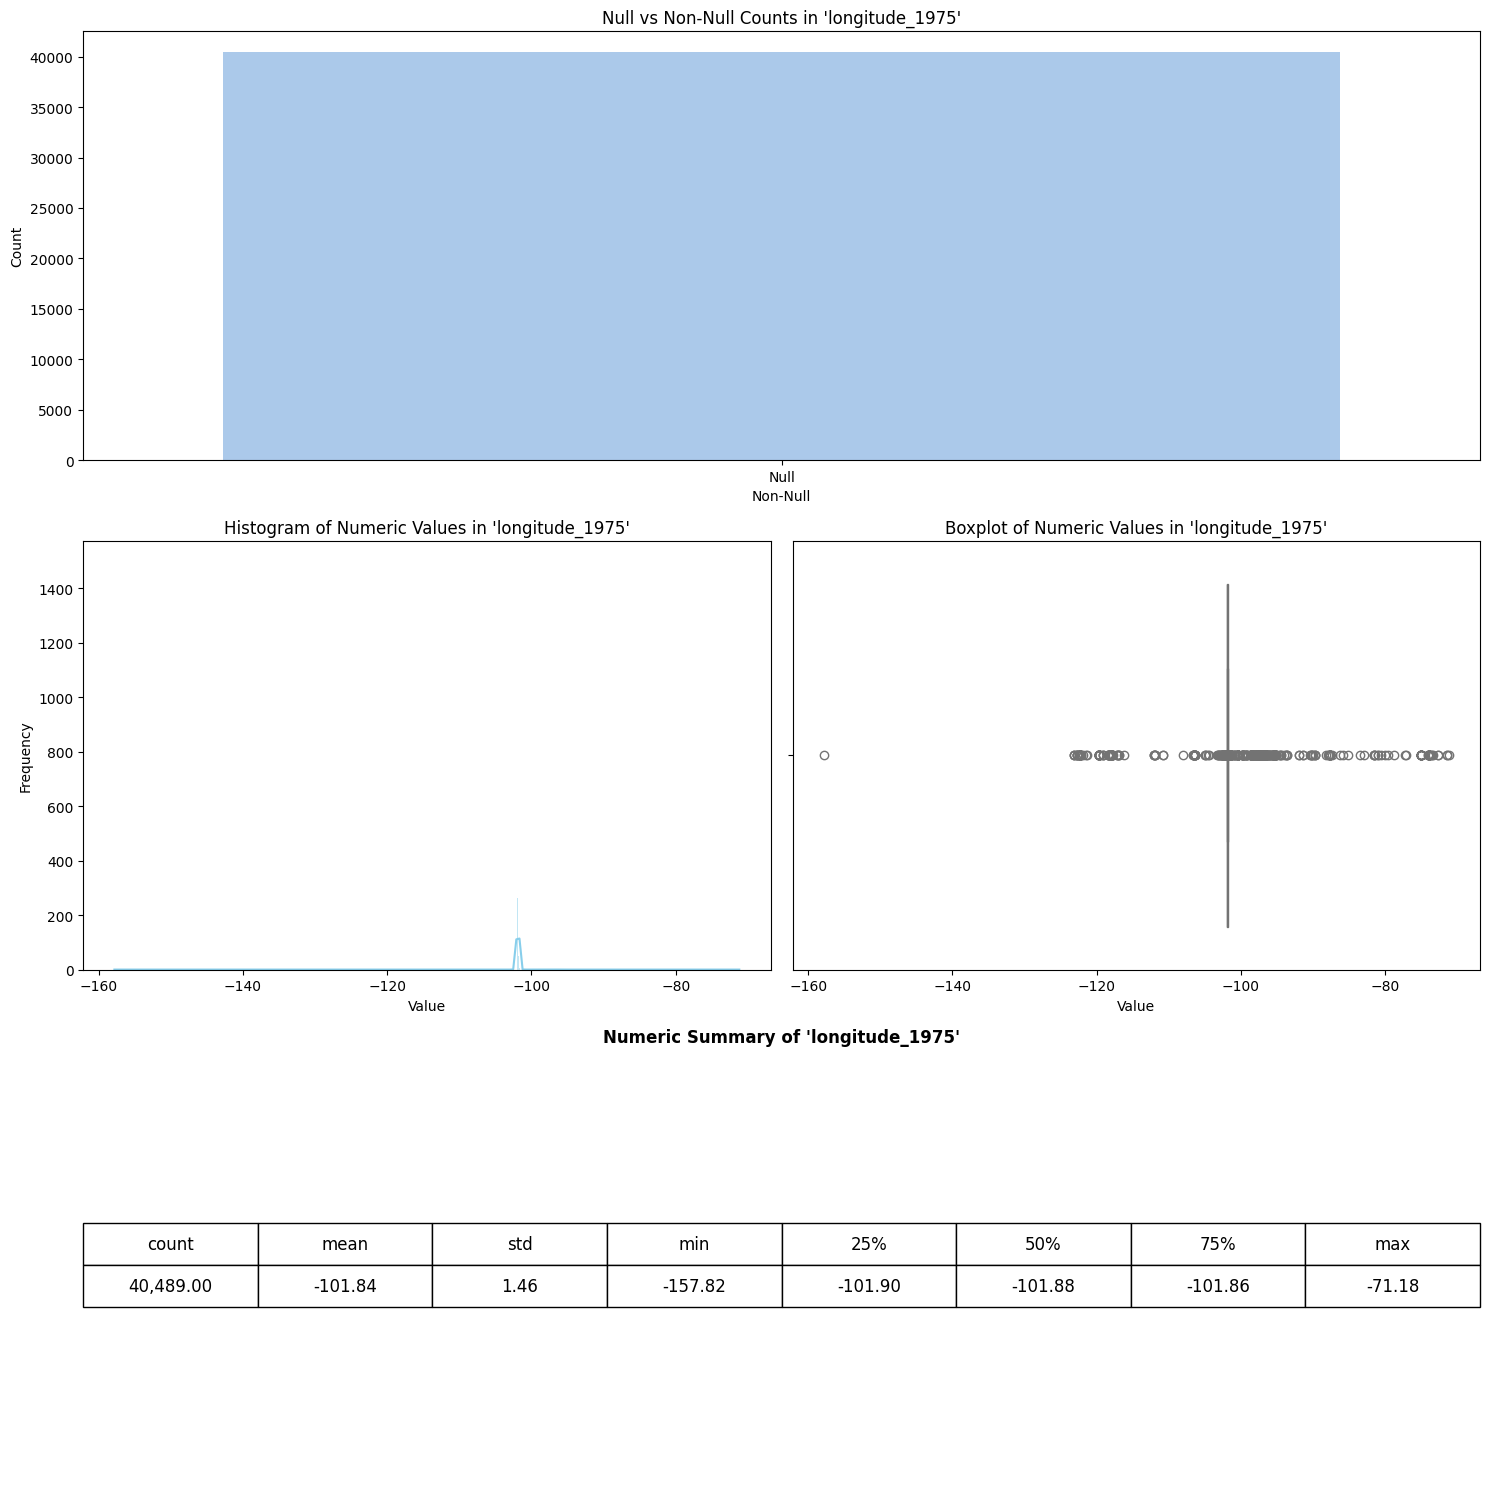

=== Finished Analysis for Column: 'longitude_1975' ===



In [60]:
analyze_raw_column(df1975, "longitude_1975")

#### aceres_rendered_1975


=== Analyzing Column: 'aceres_rendered_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'aceres_rendered_1975': 1731
Null (NaN) values in 'aceres_rendered_1975': 38758
Unique non-null values in 'aceres_rendered_1975': 892

--- Random Sample of 'aceres_rendered_1975' Values ---
  Row 16165 => 68300.0
  Row 29596 => 513.0
  Row 16965 => 3071.0
  Row 38441 => 144068.0
  Row 31097 => 2500.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 640 => 1030.0
   Row 795 => 11.0
   Row 920 => 155920.0
   Row 932 => 160000.0
   Row 1070 => 320000.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 1731 non-null values, 1731 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'aceres_rendered_1975':
count    1.731000e+03
mean     6.239387e+04
std      1.260376e+05
min      2.000000e+00
25%      1.068500e+03
50%      6.750000e+03
75%  

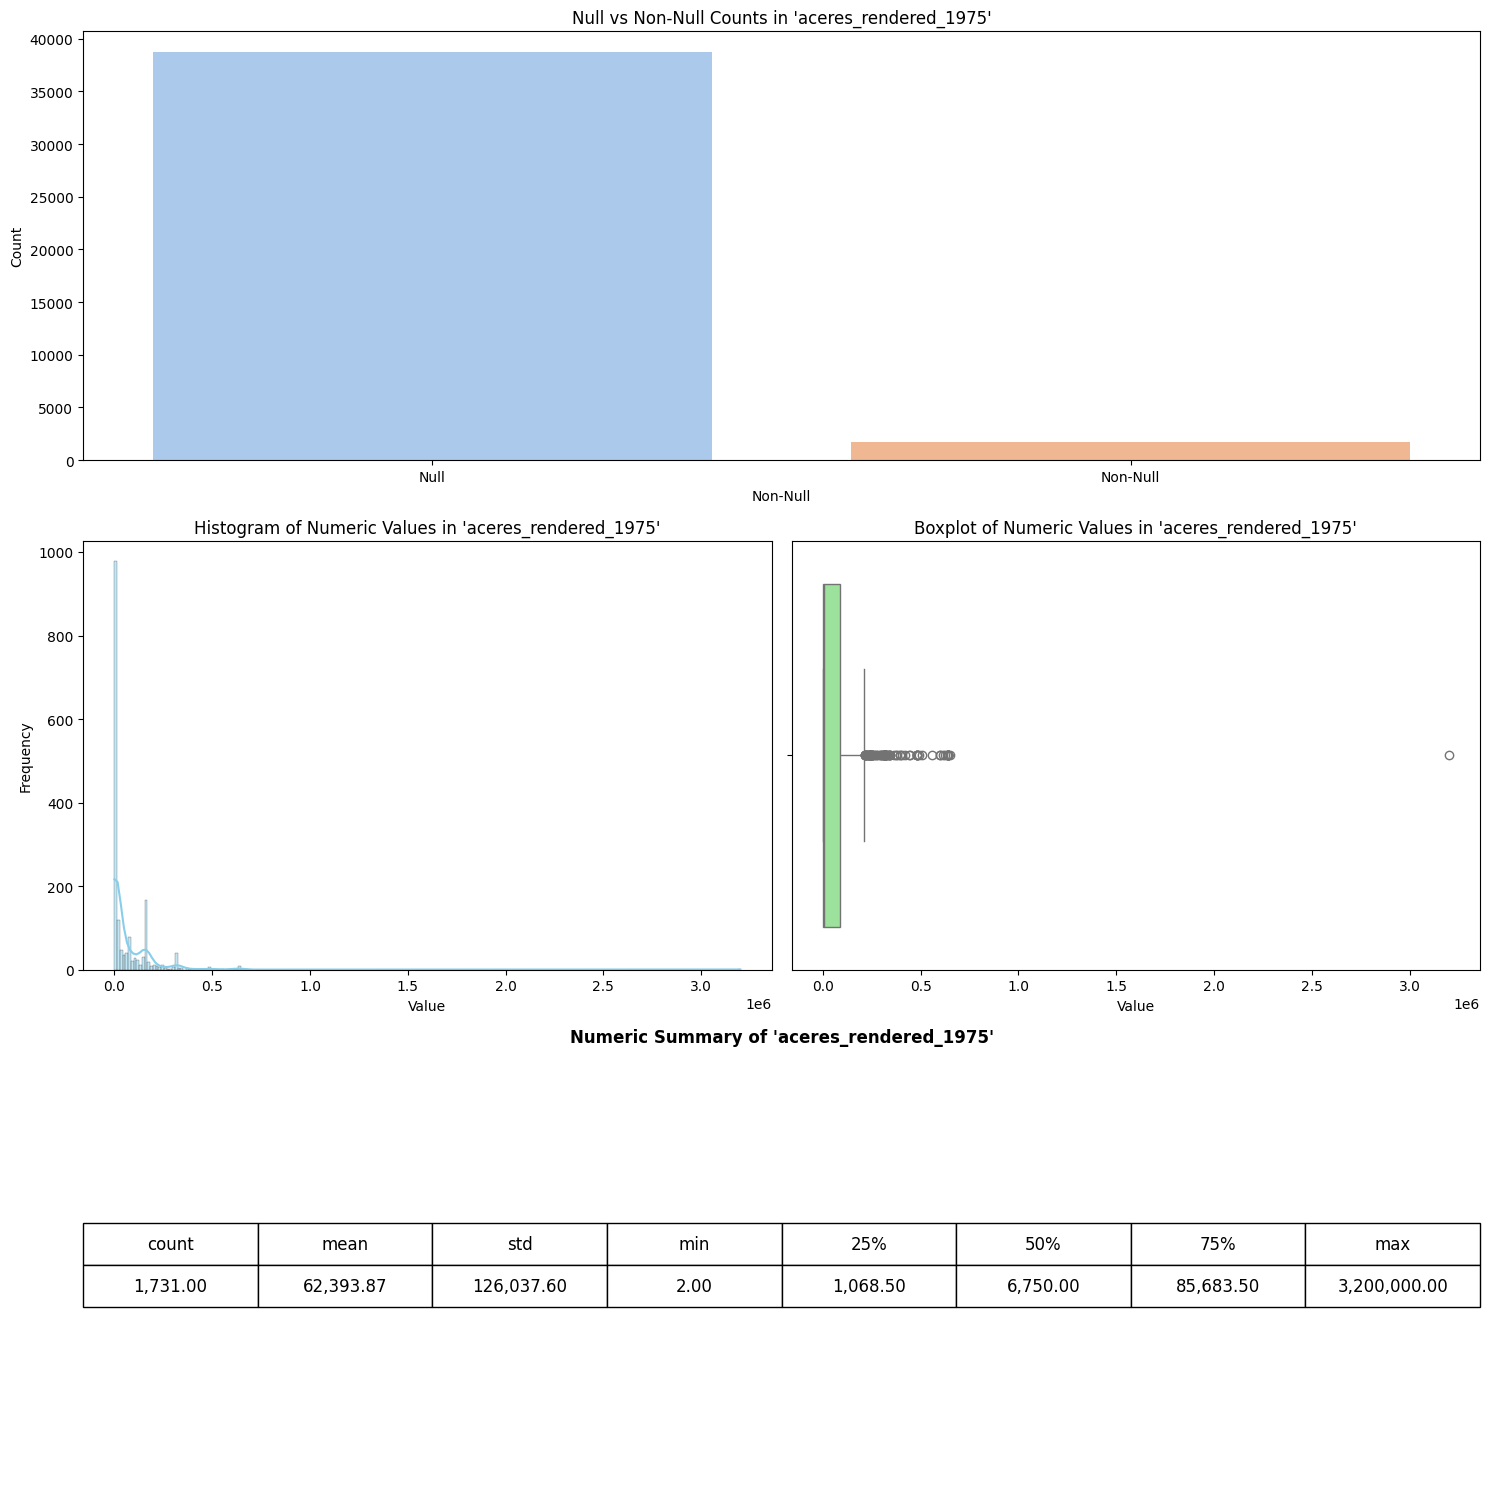

=== Finished Analysis for Column: 'aceres_rendered_1975' ===



In [61]:
analyze_raw_column(df1975, "aceres_rendered_1975")

#### value_dollars_(state_value)_1975


=== Analyzing Column: 'value_dollars_(state_value)_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'value_dollars_(state_value)_1975': 36349
Null (NaN) values in 'value_dollars_(state_value)_1975': 4140
Unique non-null values in 'value_dollars_(state_value)_1975': 2036

--- Random Sample of 'value_dollars_(state_value)_1975' Values ---
  Row 23987 => 4680.0
  Row 39623 => 5910.0
  Row 38479 => 6800.0
  Row 10661 => 2090.0
  Row 7975 => 3750.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 1 => 750.0
   Row 2 => 4650.0
   Row 4 => 610.0
   Row 5 => 2220.0
   Row 6 => 270.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 36349 non-null values, 36349 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'value_dollars_(state_value)_1975':
count    3.634900e+04
mean     4.171149e+03
std      1.272216e+04
min      0.000000

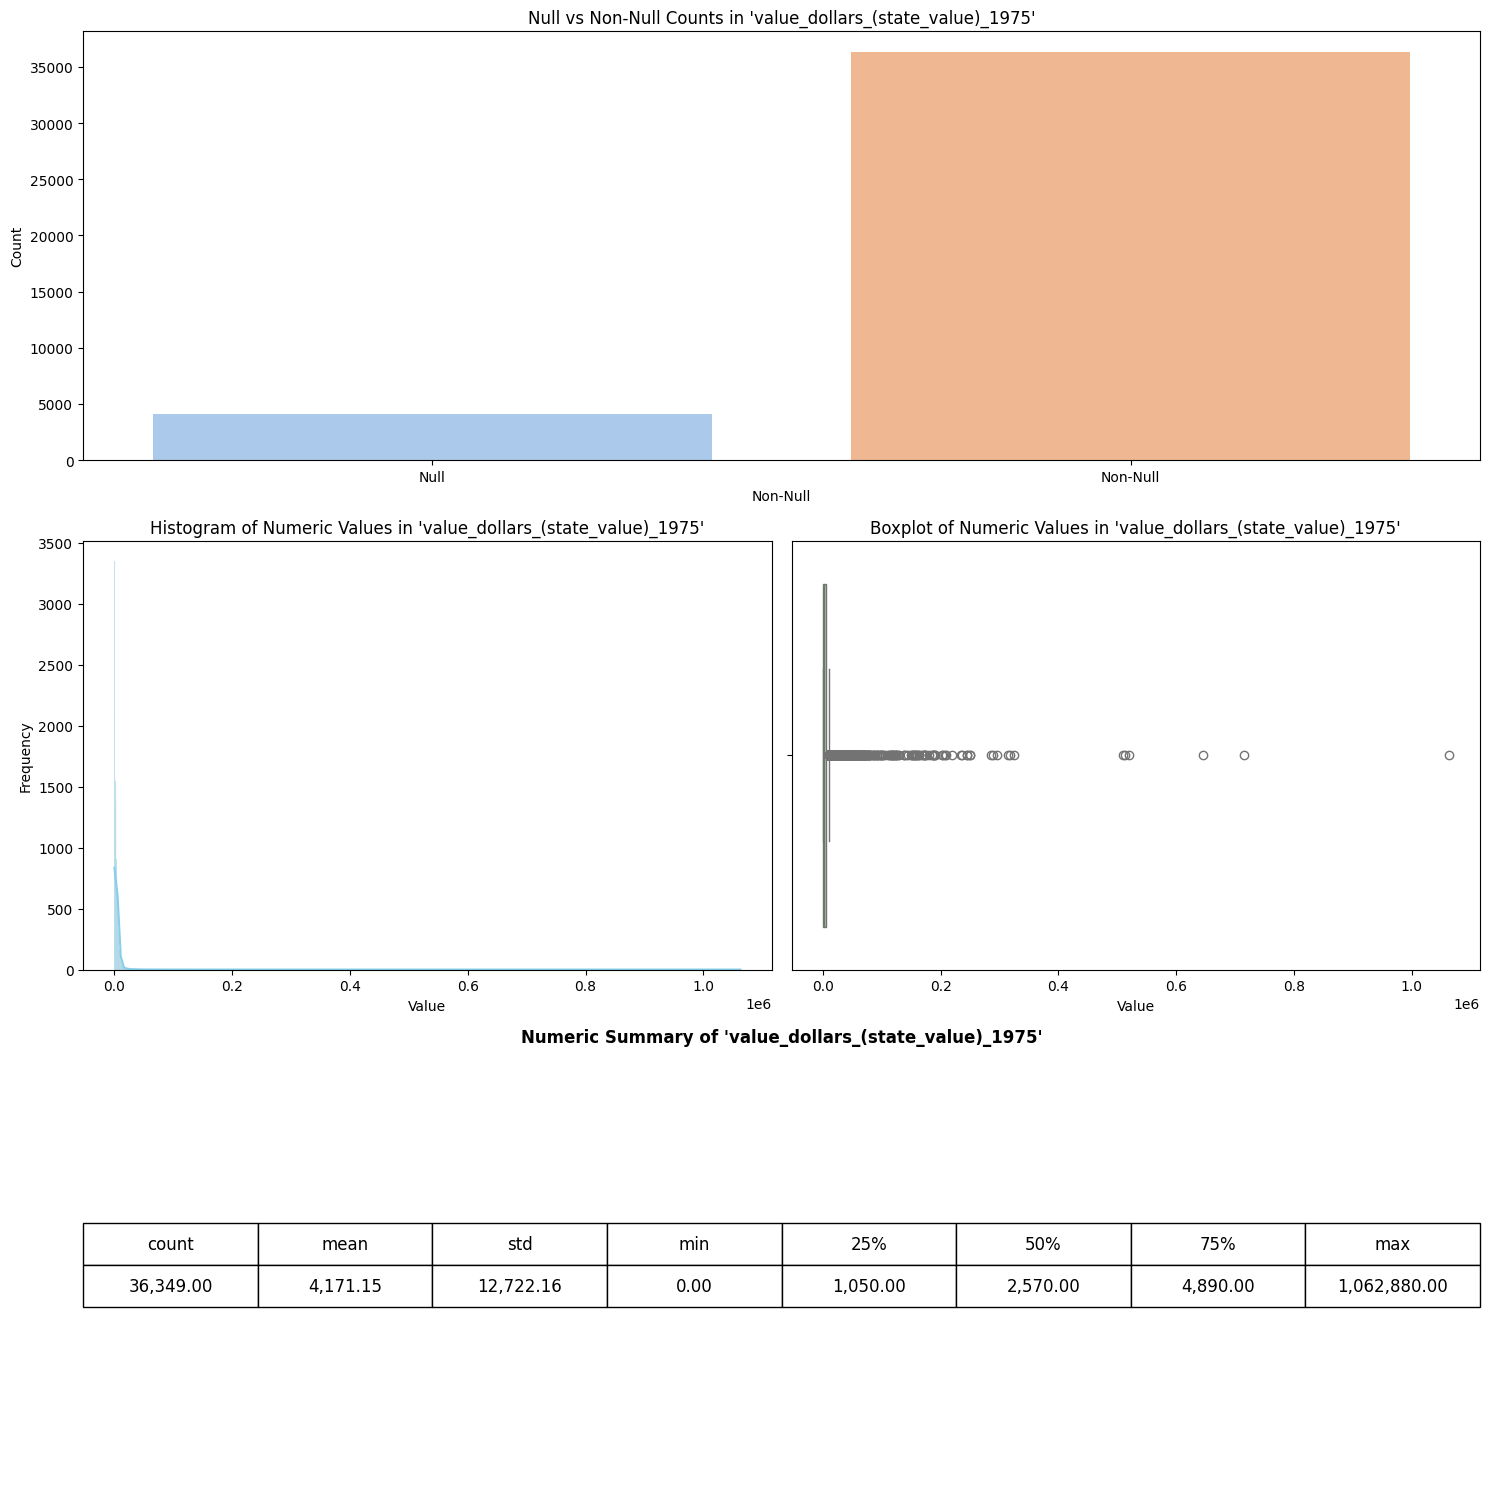

=== Finished Analysis for Column: 'value_dollars_(state_value)_1975' ===



In [62]:
analyze_raw_column(df1975, "value_dollars_(state_value)_1975")

#### designate_homestead_1975


=== Analyzing Column: 'designate_homestead_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'designate_homestead_1975': 10635
Null (NaN) values in 'designate_homestead_1975': 29854
Unique non-null values in 'designate_homestead_1975': 281

--- Random Sample of 'designate_homestead_1975' Values ---
  Row 10509 => 1180.0
  Row 9826 => 3000.0
  Row 19484 => 3000.0
  Row 31739 => 3000.0
  Row 9713 => 3000.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => 2340.0
   Row 1 => 3000.0
   Row 2 => 3000.0
   Row 3 => 520.0
   Row 4 => 3000.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 10635 non-null values, 10635 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'designate_homestead_1975':
count    10635.000000
mean      2701.856135
std        688.472014
min          0.000000
25%       2580.000000
50%       3000.00000

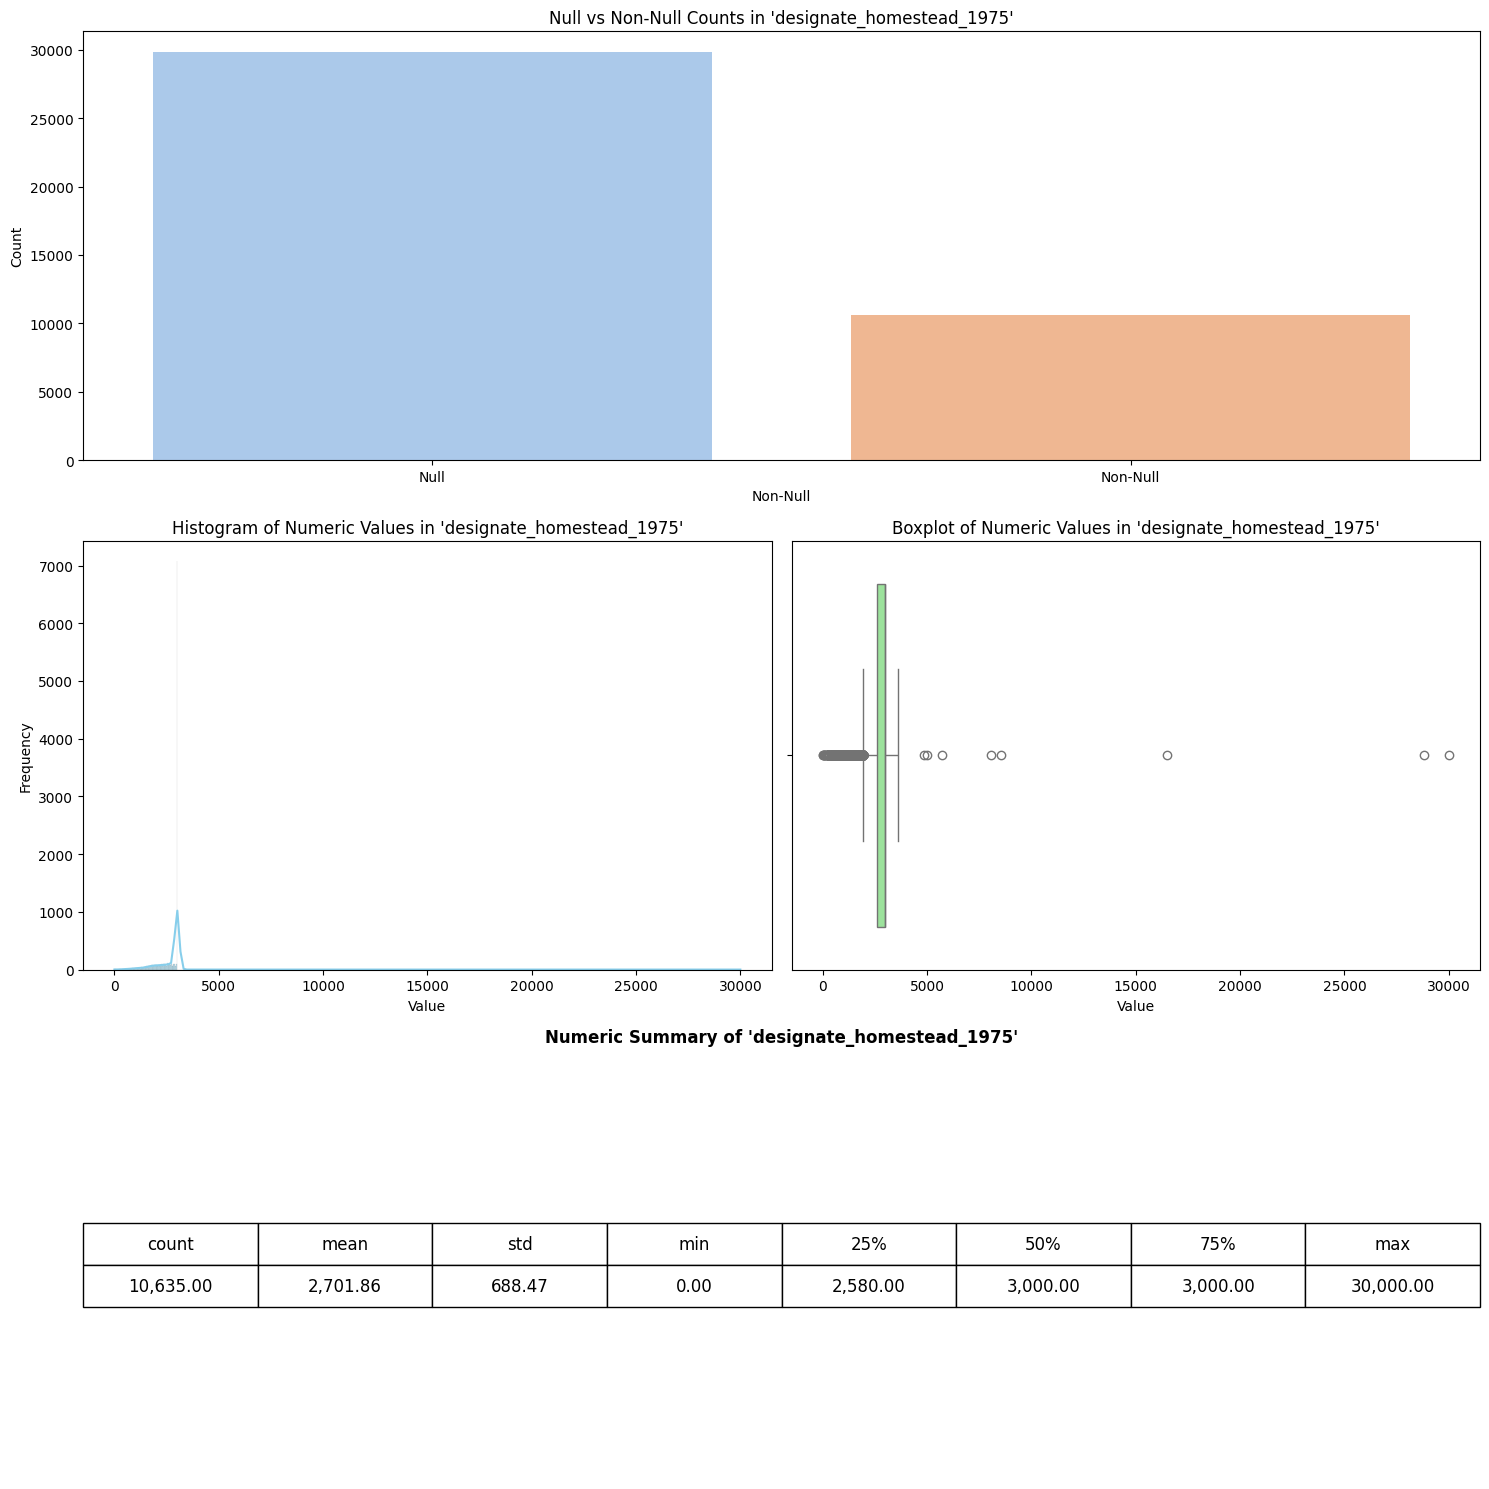

=== Finished Analysis for Column: 'designate_homestead_1975' ===



In [63]:
analyze_raw_column(df1975, "designate_homestead_1975")

#### value_of_city_property_(total_county_value)_1975


=== Analyzing Column: 'value_of_city_property_(total_county_value)_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'value_of_city_property_(total_county_value)_1975': 40471
Null (NaN) values in 'value_of_city_property_(total_county_value)_1975': 18
Unique non-null values in 'value_of_city_property_(total_county_value)_1975': 2111

--- Random Sample of 'value_of_city_property_(total_county_value)_1975' Values ---
  Row 35923 => 2630.0
  Row 25426 => 370.0
  Row 25453 => 730.0
  Row 24879 => 1830.0
  Row 23217 => 8050.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => 340.0
   Row 1 => 3750.0
   Row 2 => 7650.0
   Row 3 => 520.0
   Row 4 => 3610.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 40471 non-null values, 40471 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'value_of_city_property_(total_county_val

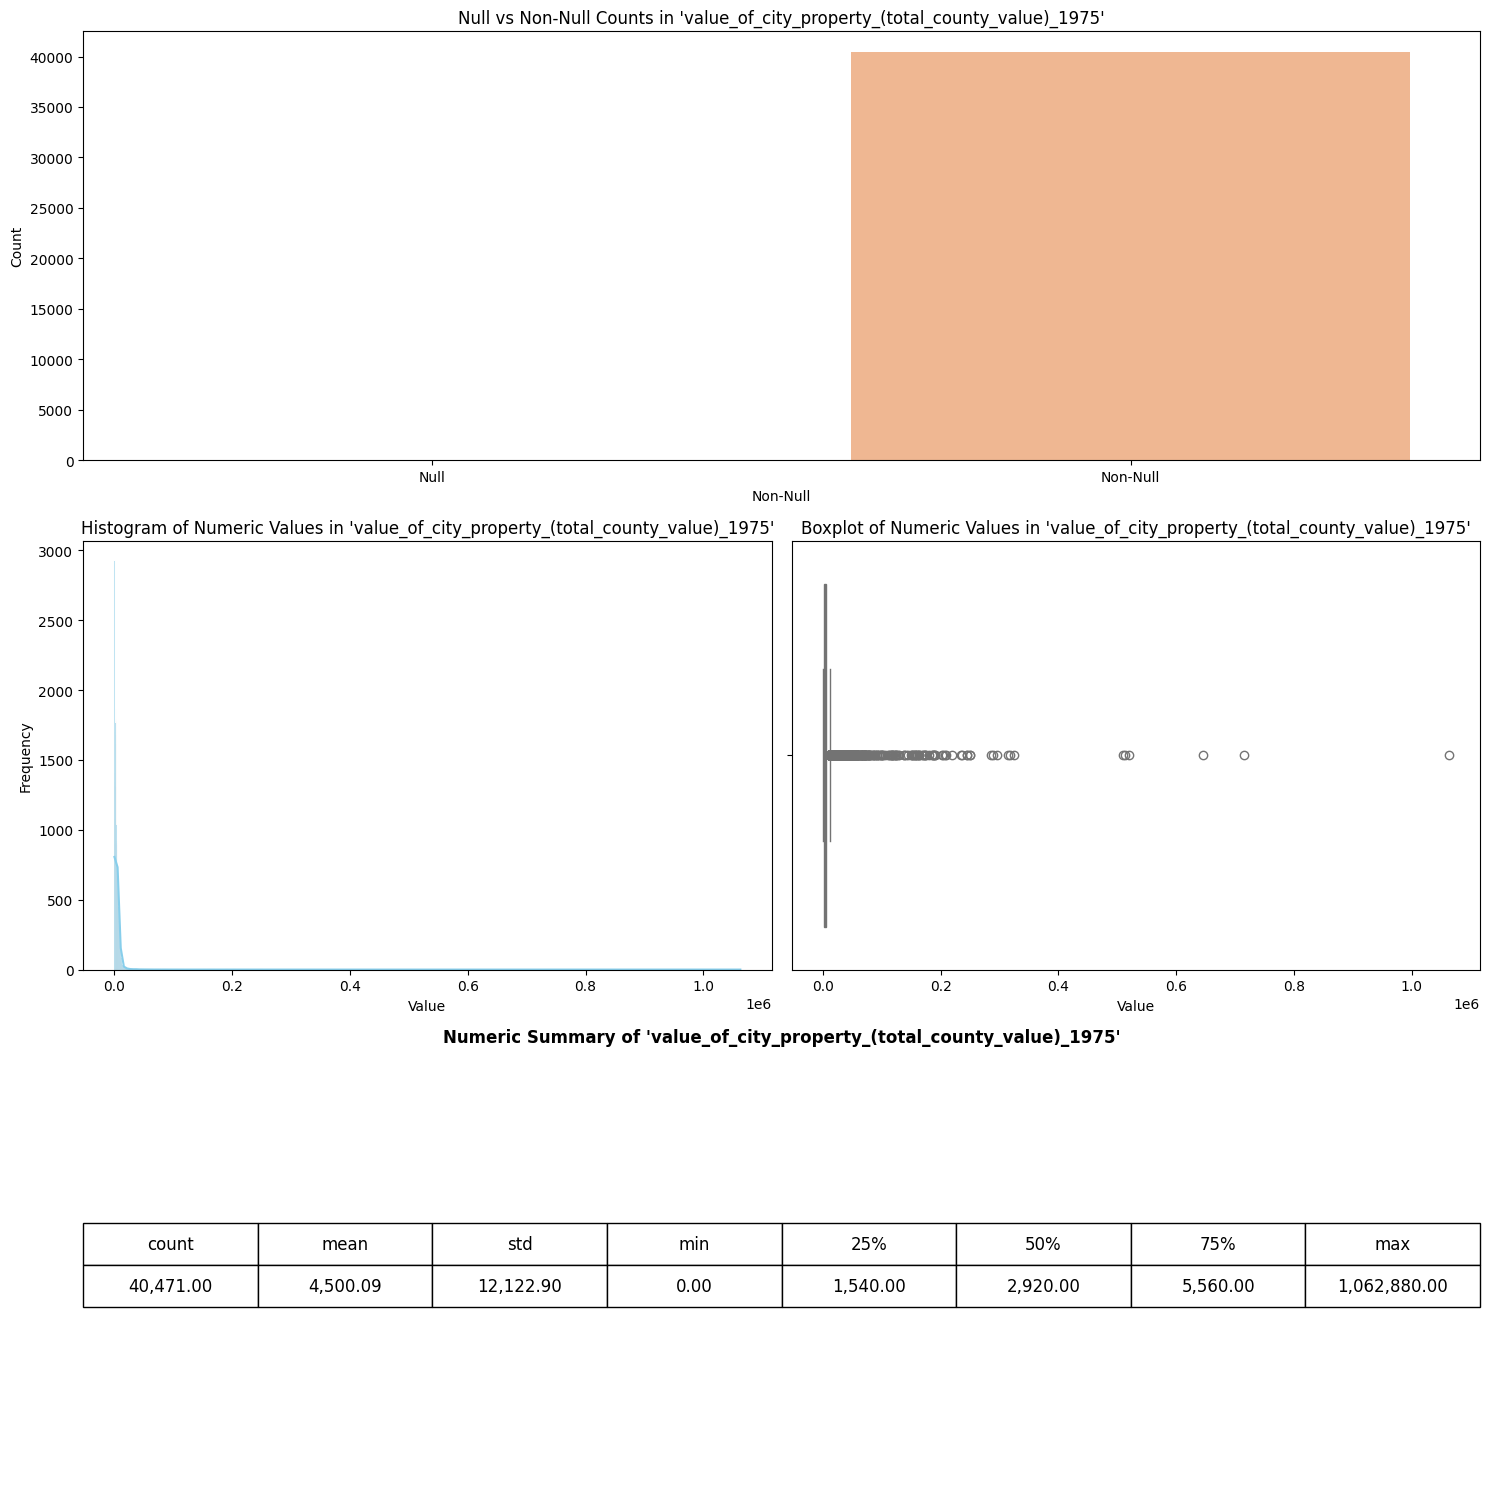

=== Finished Analysis for Column: 'value_of_city_property_(total_county_value)_1975' ===



In [64]:
analyze_raw_column(df1975, "value_of_city_property_(total_county_value)_1975")

#### value_of_personal_property_1975


=== Analyzing Column: 'value_of_personal_property_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'value_of_personal_property_1975': 2064
Null (NaN) values in 'value_of_personal_property_1975': 38425
Unique non-null values in 'value_of_personal_property_1975': 409

--- Random Sample of 'value_of_personal_property_1975' Values ---
  Row 23383 => 3600.0
  Row 7571 => 1500.0
  Row 13246 => 500.0
  Row 16162 => 250000.0
  Row 2349 => 500.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 2242 => 1000.0
   Row 2243 => 1000.0
   Row 2248 => 5540.0
   Row 2249 => 200.0
   Row 2250 => 2000.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 2064 non-null values, 2064 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'value_of_personal_property_1975':
count    2.064000e+03
mean     6.936842e+03
std      3.534803e+04
min      0

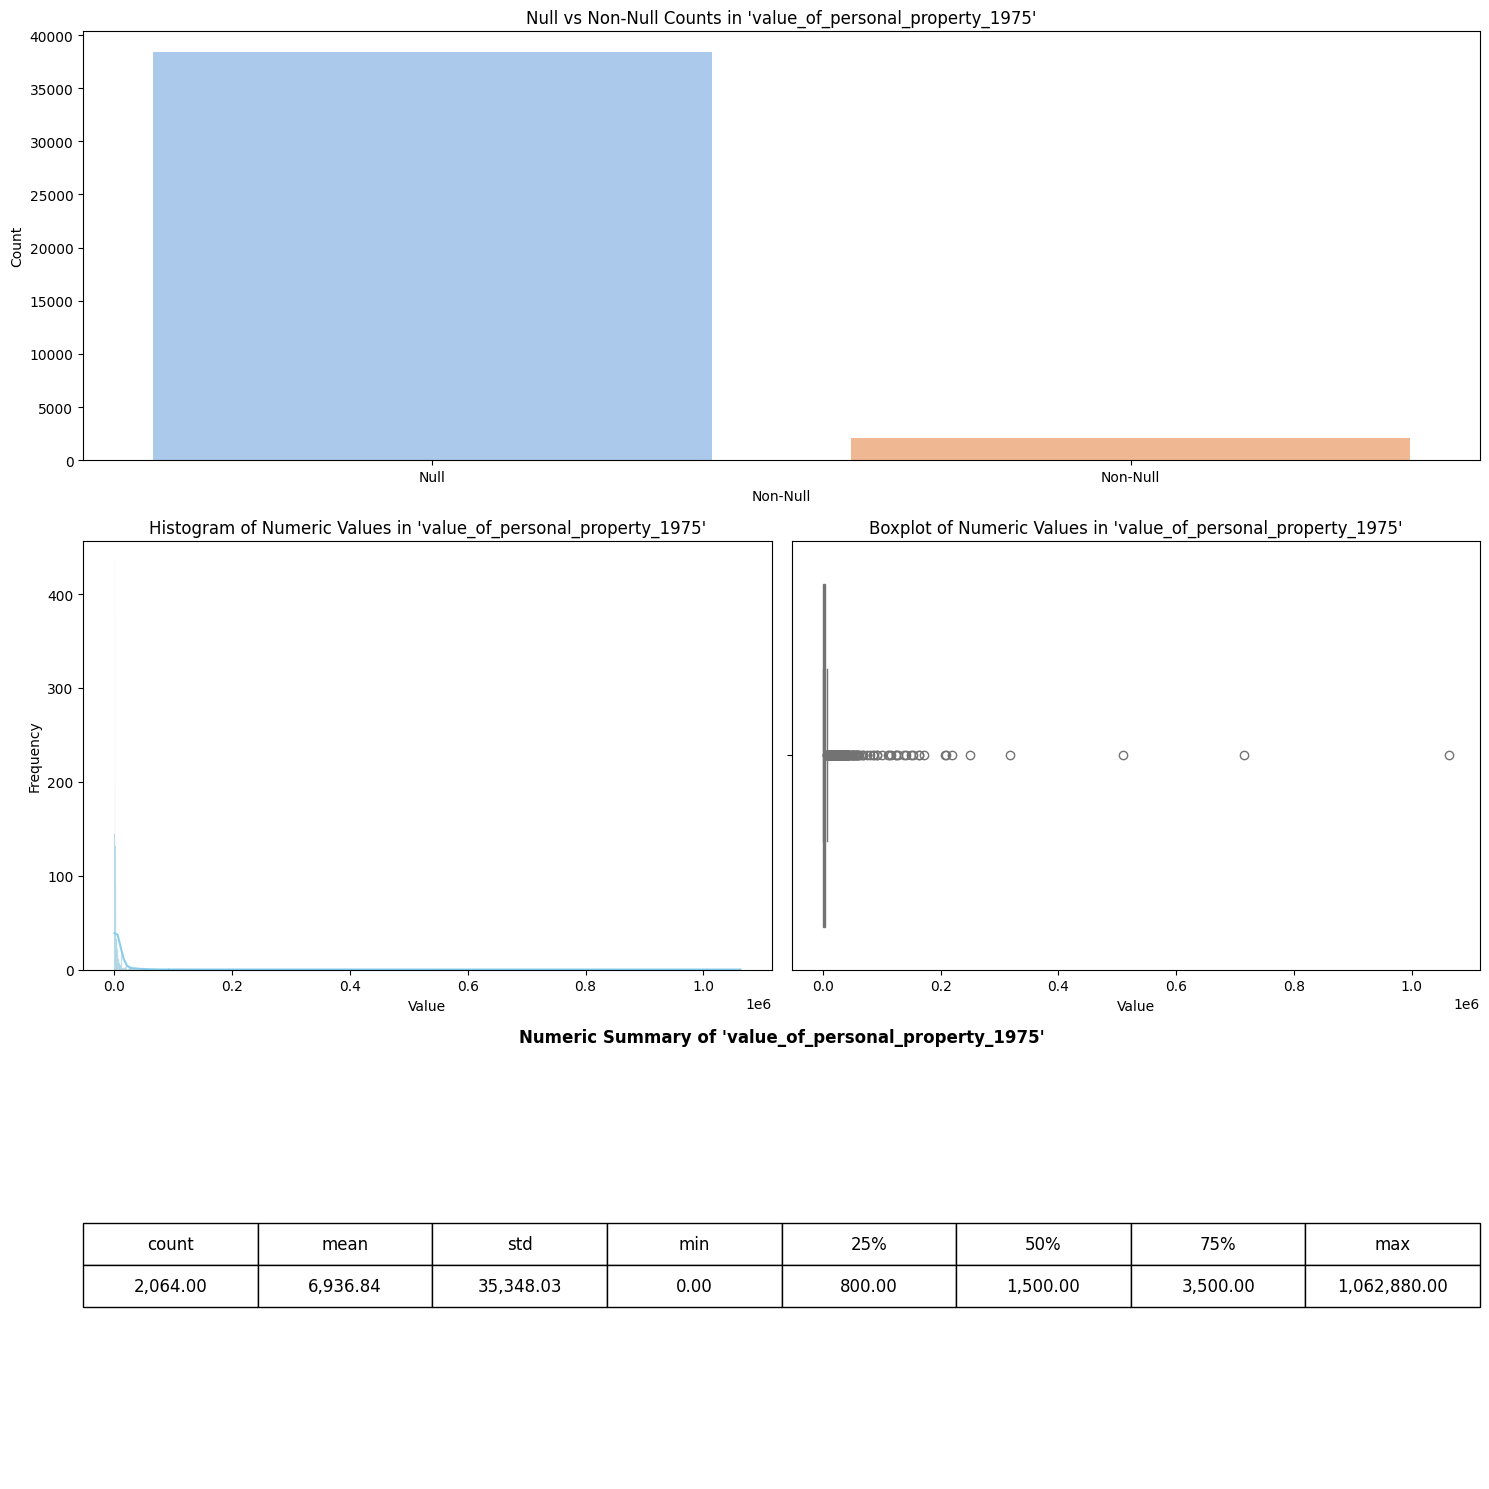

=== Finished Analysis for Column: 'value_of_personal_property_1975' ===



In [65]:
analyze_raw_column(df1975, "value_of_personal_property_1975")

#### total_value_for_county_tax_1975


=== Analyzing Column: 'total_value_for_county_tax_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'total_value_for_county_tax_1975': 1
Null (NaN) values in 'total_value_for_county_tax_1975': 40488
Unique non-null values in 'total_value_for_county_tax_1975': 1

--- Random Sample of 'total_value_for_county_tax_1975' Values ---
  Row 20436 => 12800.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 20436 => 12800.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 1 non-null values, 1 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'total_value_for_county_tax_1975':
count        1.0
mean     12800.0
std          NaN
min      12800.0
25%      12800.0
50%      12800.0
75%      12800.0
max      12800.0
dtype: float64

--- Plotting Section ---


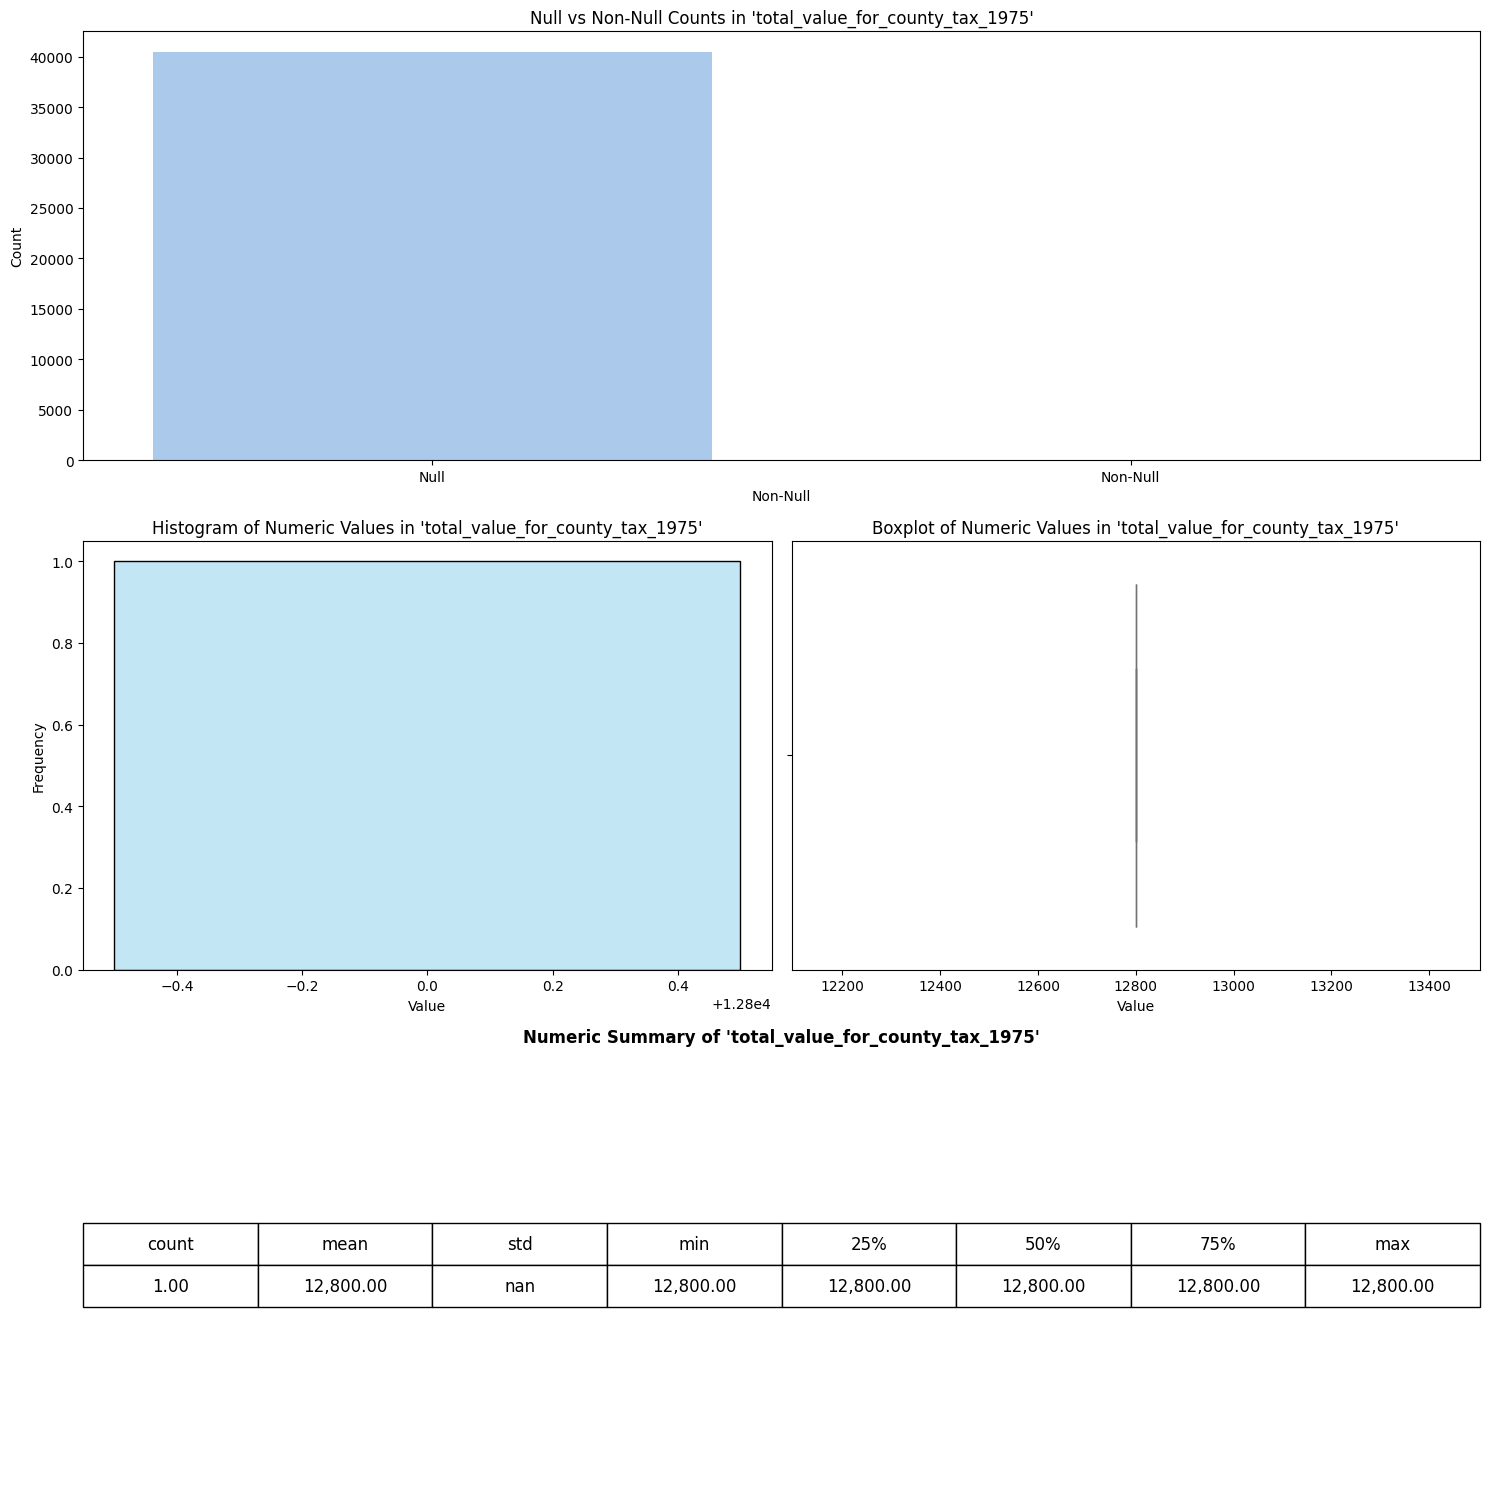

=== Finished Analysis for Column: 'total_value_for_county_tax_1975' ===



In [66]:
analyze_raw_column(df1975, "total_value_for_county_tax_1975")

#### state_tax_1975


=== Analyzing Column: 'state_tax_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'state_tax_1975': 39980
Null (NaN) values in 'state_tax_1975': 509
Unique non-null values in 'state_tax_1975': 2052

--- Random Sample of 'state_tax_1975' Values ---
  Row 8110 => 252.0
  Row 9795 => 17.0
  Row 37780 => 287.0
  Row 33566 => 17.0
  Row 23424 => 22.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => 0.0
   Row 1 => 90.0
   Row 2 => 558.0
   Row 3 => 0.0
   Row 4 => 73.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 39980 non-null values, 39980 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'state_tax_1975':
count     39980.000000
mean        455.156628
std        1446.688792
min           0.000000
25%          72.000000
50%         275.000000
75%         545.000000
max      127546.000000
dtype: float64

--- Plott

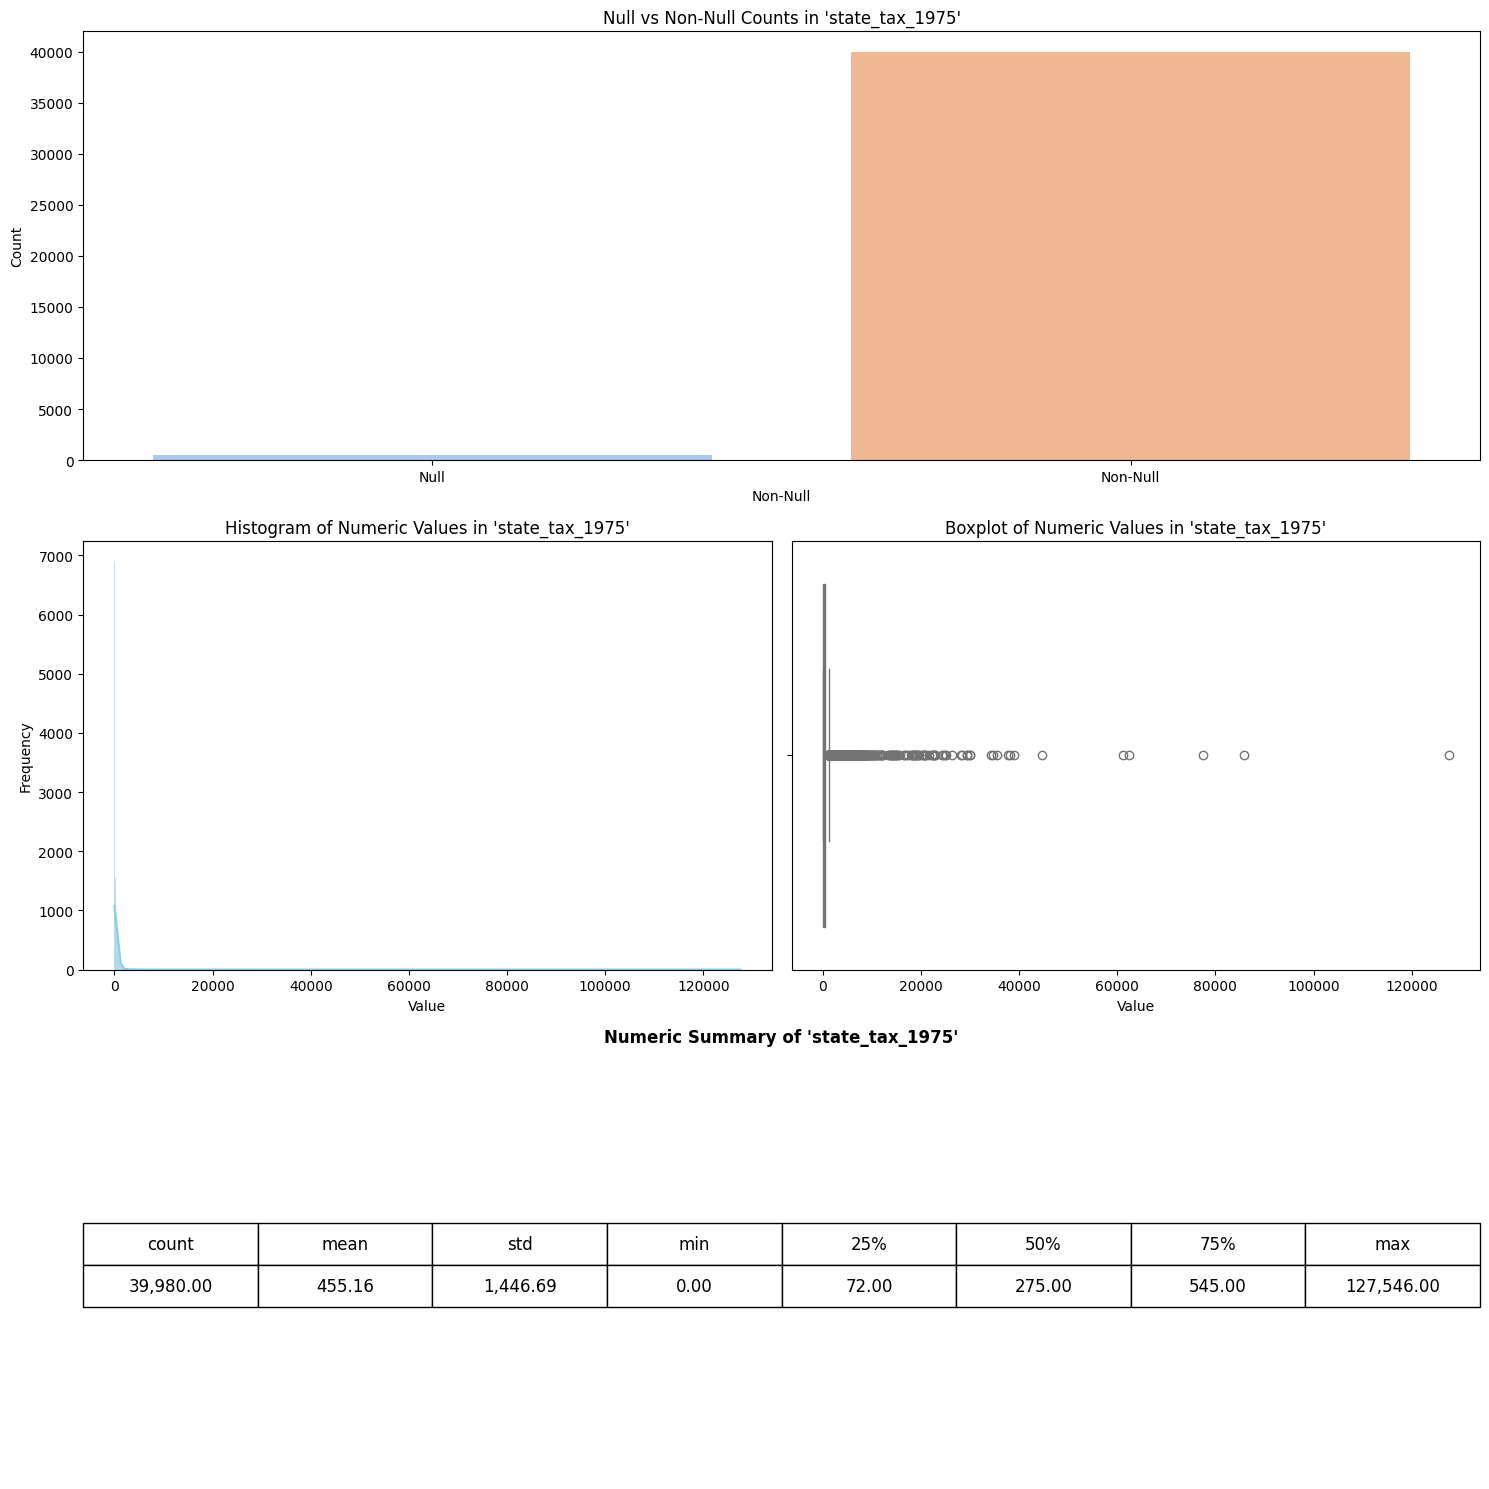

=== Finished Analysis for Column: 'state_tax_1975' ===



In [67]:
analyze_raw_column(df1975, "state_tax_1975")

#### county_tax_1975


=== Analyzing Column: 'county_tax_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'county_tax_1975': 39981
Null (NaN) values in 'county_tax_1975': 508
Unique non-null values in 'county_tax_1975': 2513

--- Random Sample of 'county_tax_1975' Values ---
  Row 8109 => 31.0
  Row 9794 => 78.0
  Row 37779 => 4555.0
  Row 33566 => 109.0
  Row 23424 => 2480.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => 0.0
   Row 1 => 585.0
   Row 2 => 3627.0
   Row 3 => 0.0
   Row 4 => 476.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 39981 non-null values, 39981 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'county_tax_1975':
count     39981.000000
mean       3435.834196
std        9514.756485
min           0.000000
25%        1030.000000
50%        2215.000000
75%        4290.000000
max      829046.000000
dtype: float6

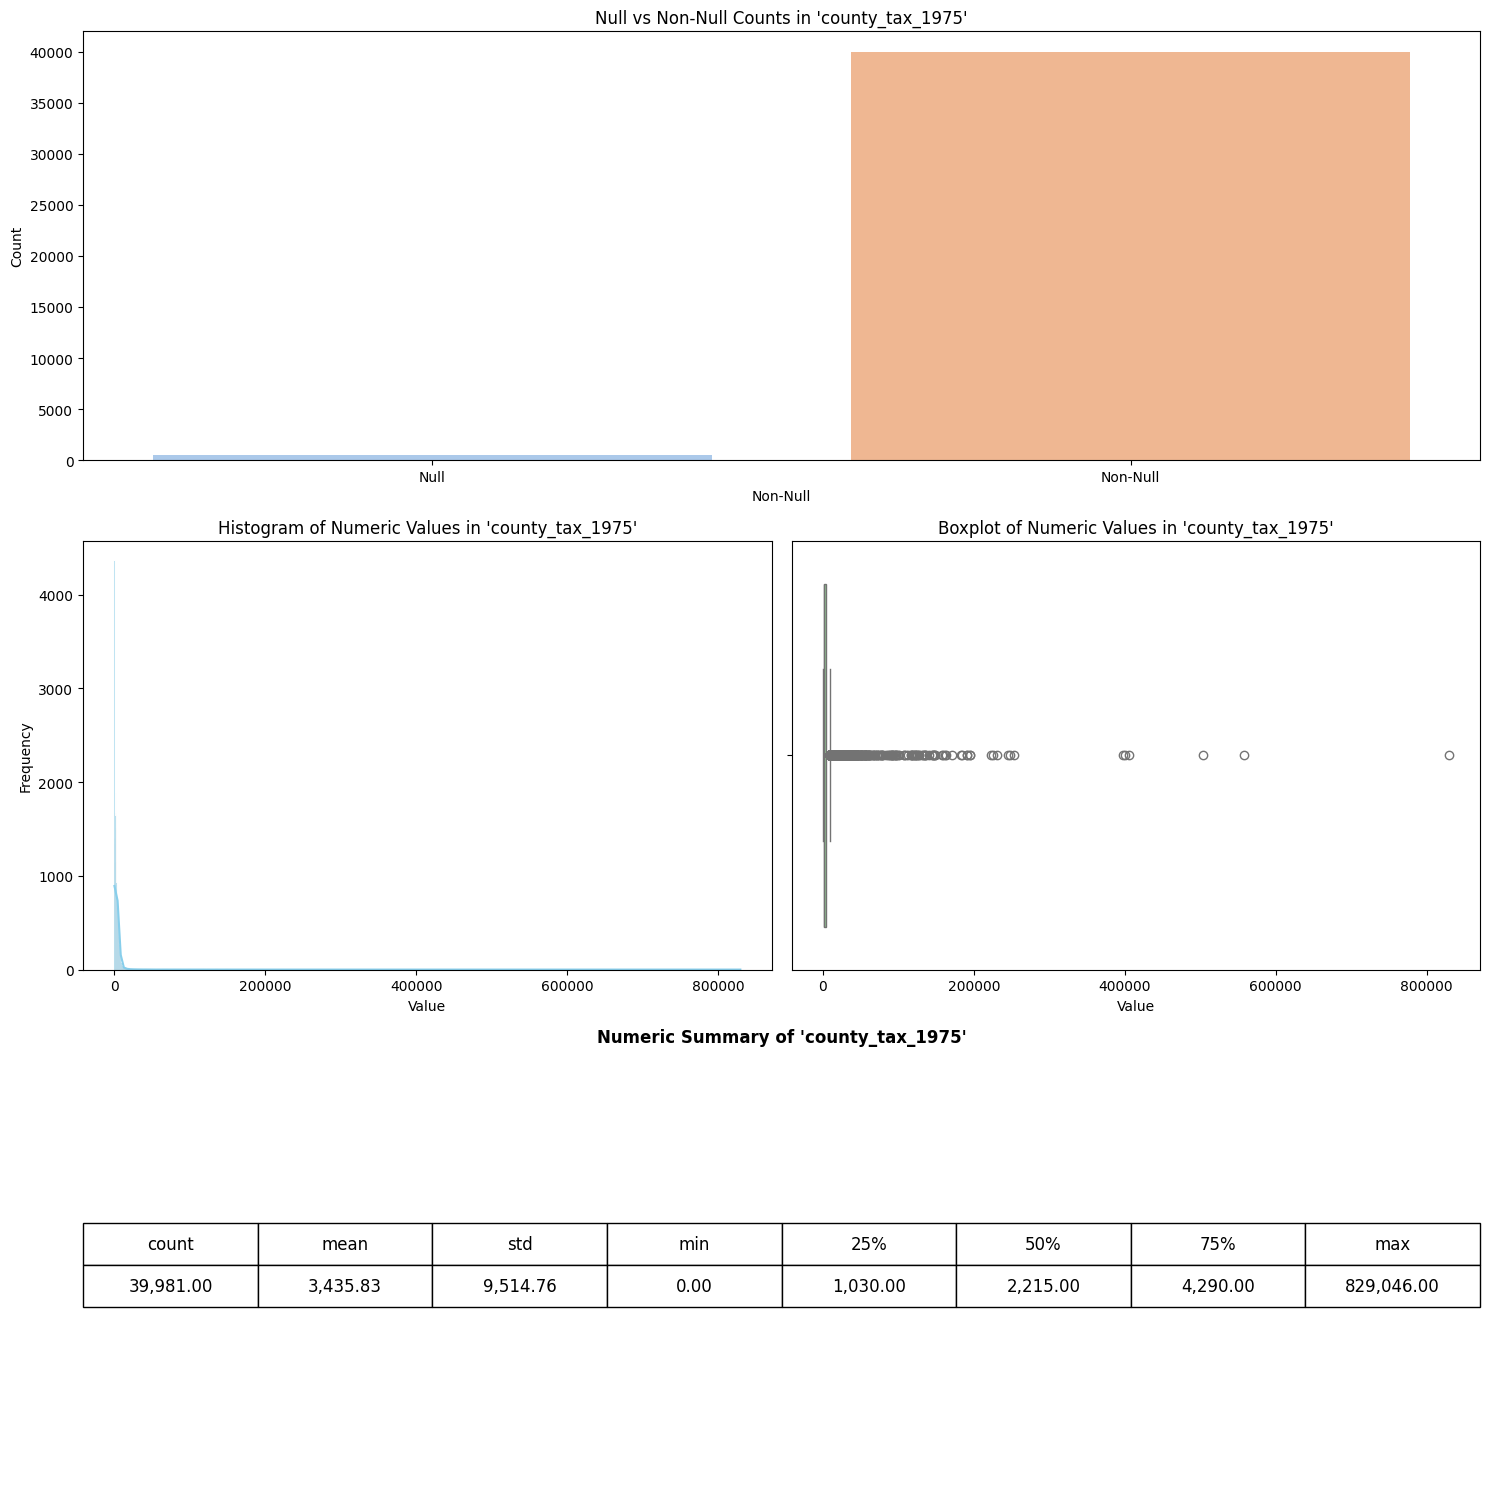

=== Finished Analysis for Column: 'county_tax_1975' ===



In [68]:
analyze_raw_column(df1975, "county_tax_1975")

#### district_school_1975


=== Analyzing Column: 'district_school_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'district_school_1975': 11583
Null (NaN) values in 'district_school_1975': 28906
Unique non-null values in 'district_school_1975': 2410

--- Random Sample of 'district_school_1975' Values ---
  Row 32032 => 2908.0
  Row 40413 => 14246.0
  Row 35340 => 1616.0
  Row 31244 => 544.0
  Row 34370 => 1258.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 8100 => 1349.0
   Row 28905 => 18000.0
   Row 28906 => 11064.0
   Row 28907 => 13108.0
   Row 28908 => 11476.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 11583 non-null values, 11583 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'district_school_1975':
count     11583.000000
mean       6980.958992
std       13721.318897
min           0.000000
25%        2498.000000
50%        4

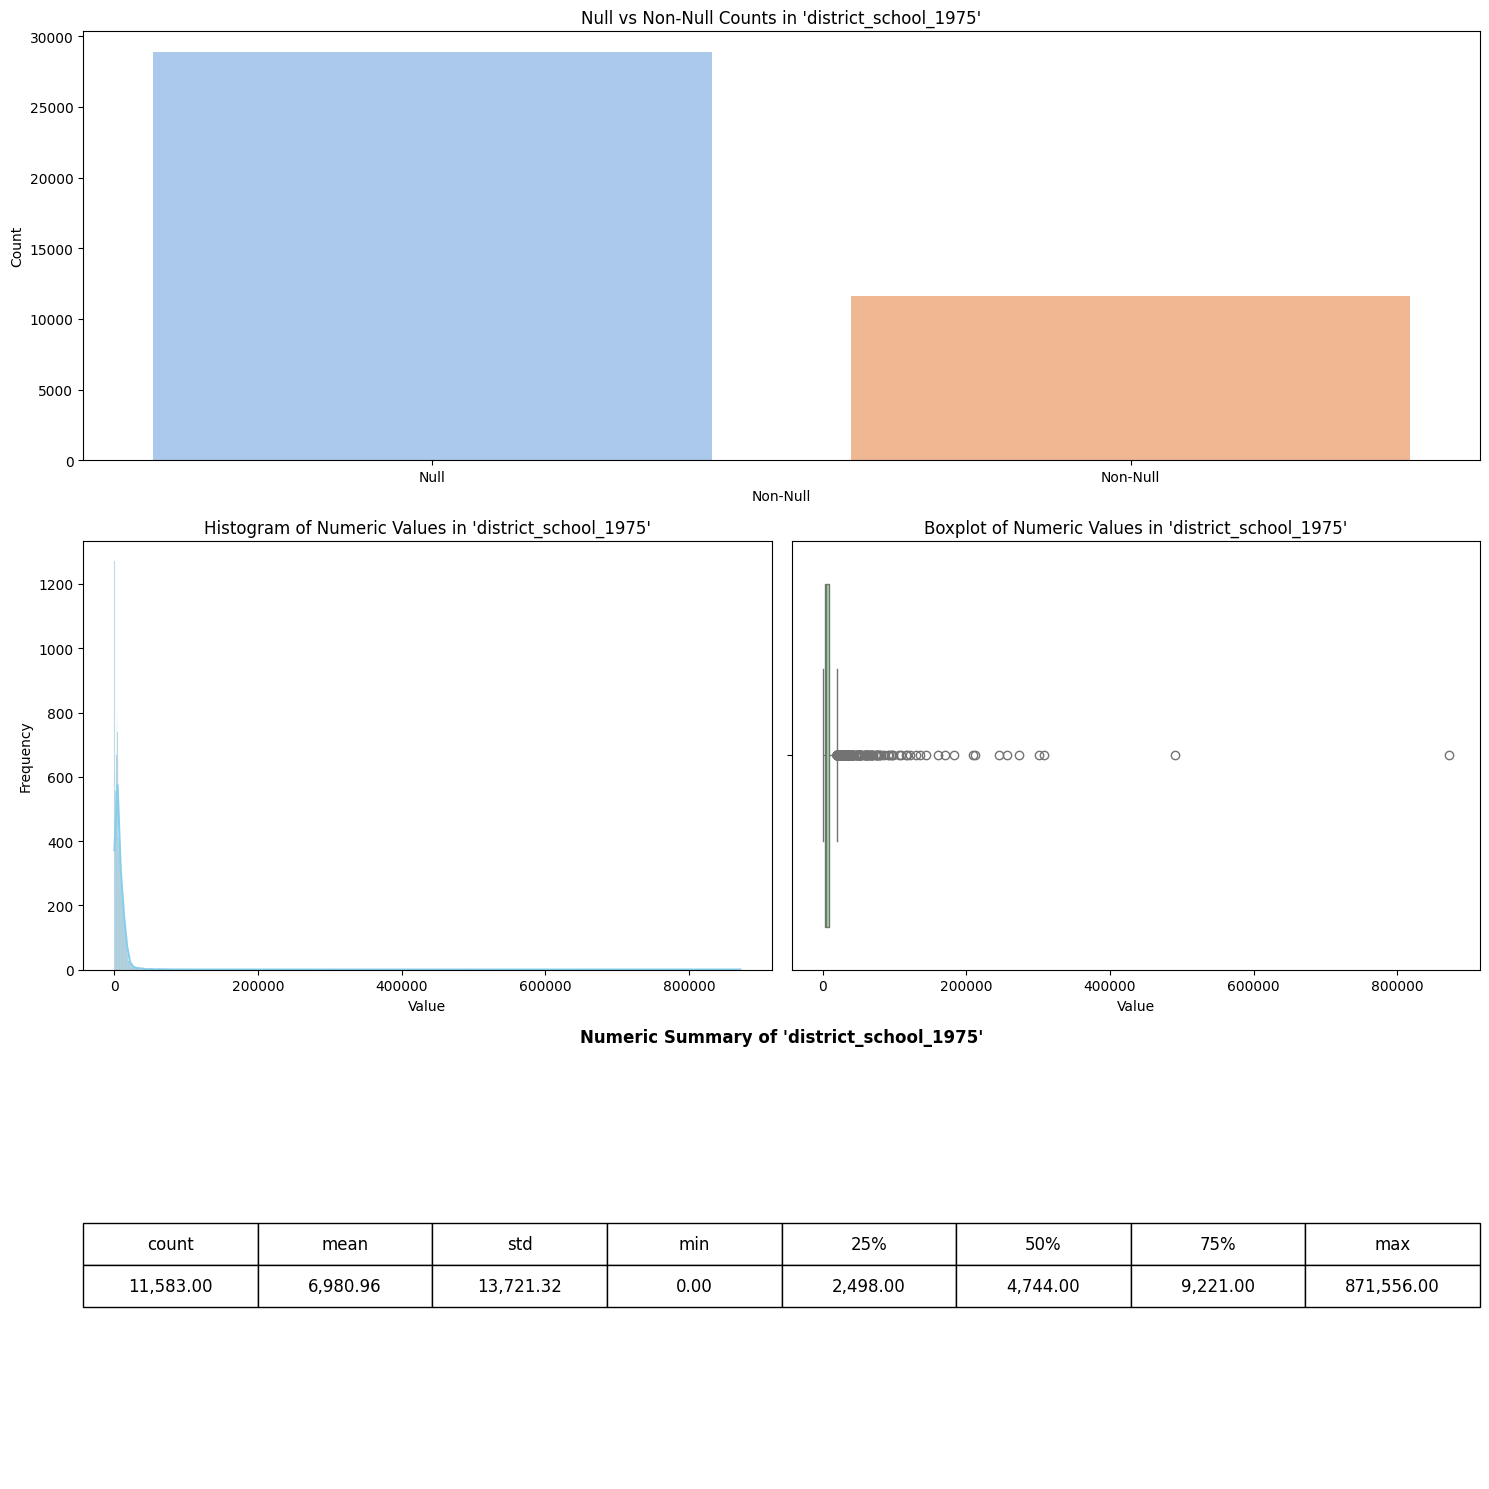

=== Finished Analysis for Column: 'district_school_1975' ===



In [69]:
analyze_raw_column(df1975, "district_school_1975")

#### tax_total_(including_hospital_and_water_taxes)_1975


=== Analyzing Column: 'tax_total_(including_hospital_and_water_taxes)_1975' ===
Total rows in DataFrame: 40489
Non-null values in 'tax_total_(including_hospital_and_water_taxes)_1975': 39977
Null (NaN) values in 'tax_total_(including_hospital_and_water_taxes)_1975': 512
Unique non-null values in 'tax_total_(including_hospital_and_water_taxes)_1975': 3855

--- Random Sample of 'tax_total_(including_hospital_and_water_taxes)_1975' Values ---
  Row 4600 => 970.0
  Row 3358 => 12424.0
  Row 31711 => 10078.0
  Row 24504 => 3998.0
  Row 18309 => 2670.0

--- Data Type Distribution ---
  Type 'float': 40489 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 40489
   Row 0 => 0.0
   Row 1 => 1276.0
   Row 2 => 7906.0
   Row 3 => 0.0
   Row 4 => 1036.0
   ... 40484 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 39977 non-null values, 39977 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'tax_total_(including_hospit

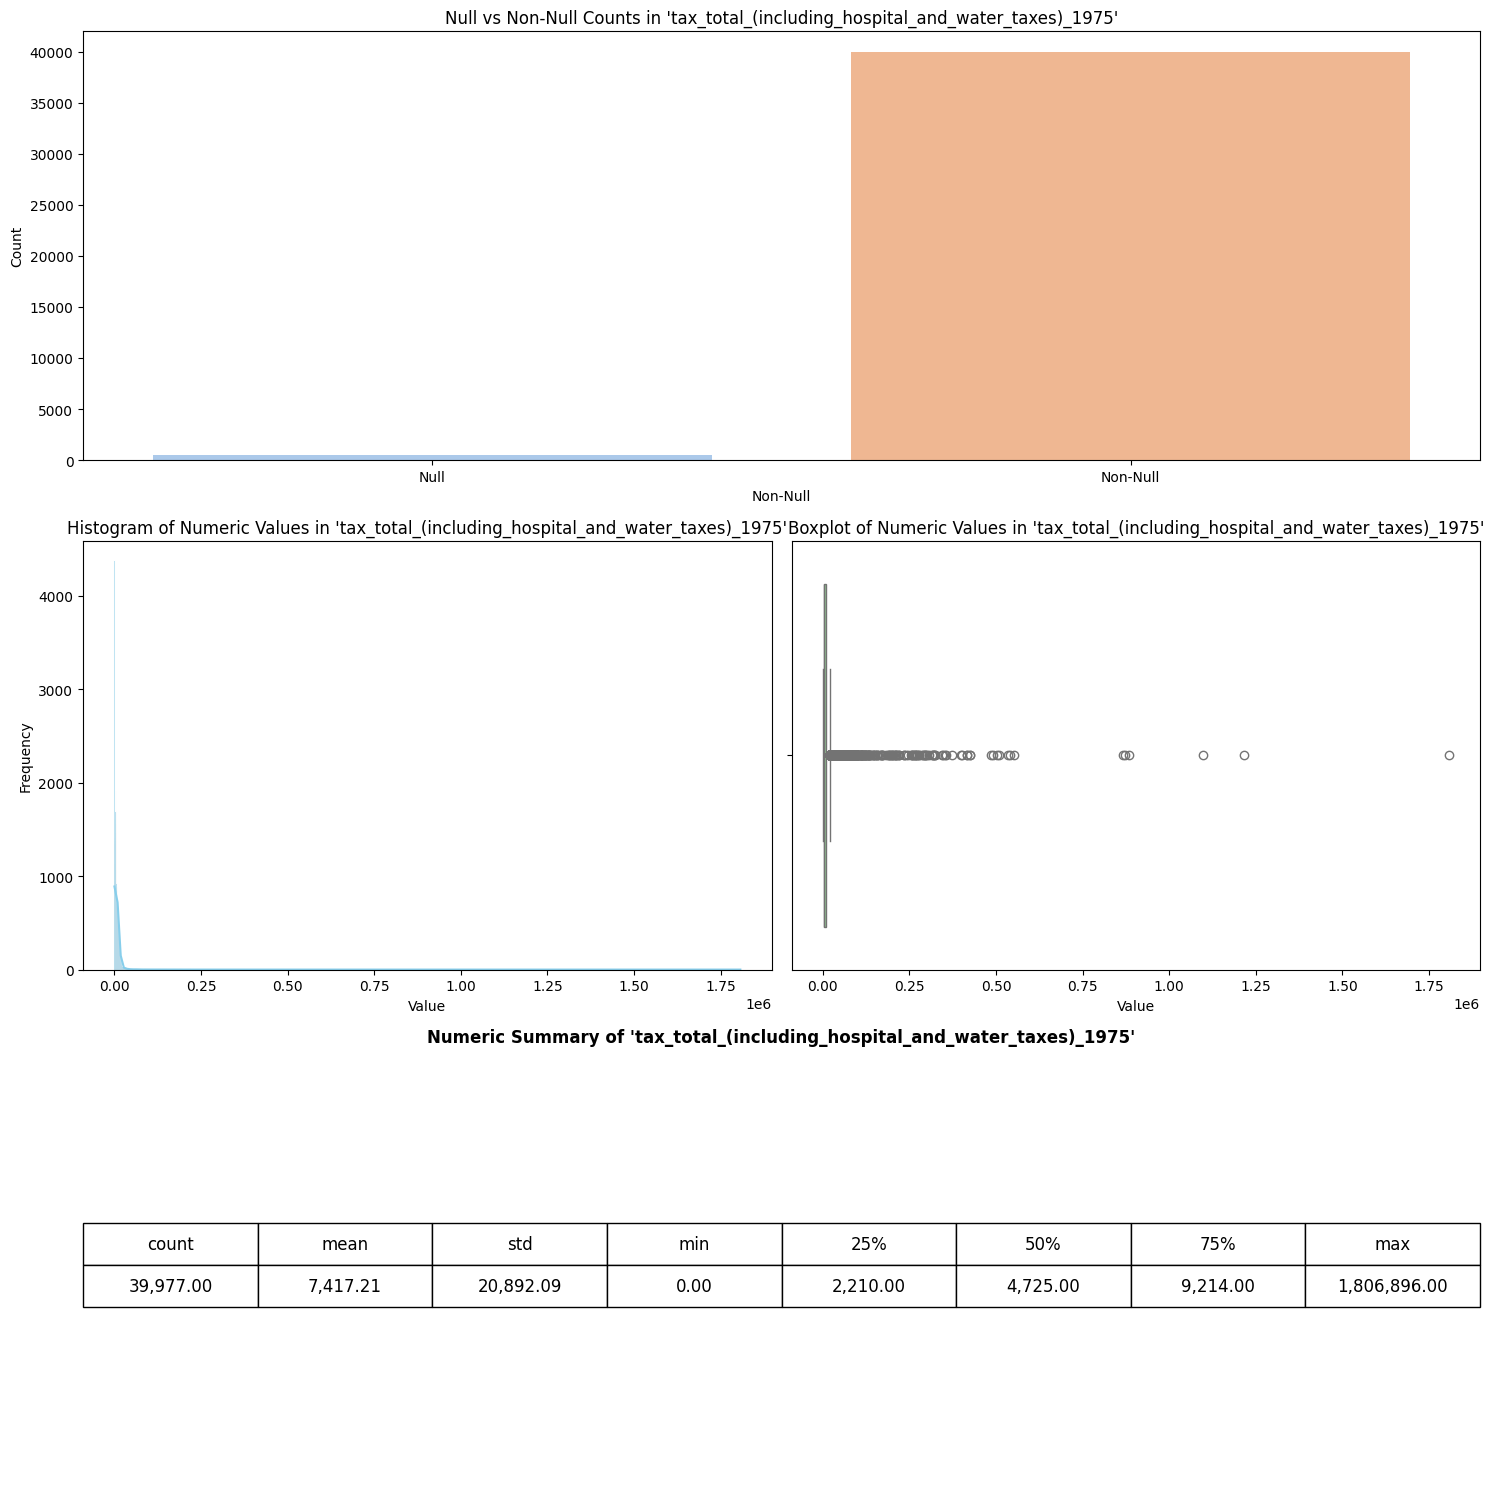

=== Finished Analysis for Column: 'tax_total_(including_hospital_and_water_taxes)_1975' ===



In [70]:
analyze_raw_column(df1975, "tax_total_(including_hospital_and_water_taxes)_1975")

### Dealing with 1985 columns

#### google_standard_address_1985


=== Analyzing Column: 'google_standard_address_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'google_standard_address_1985': 19583
Null (NaN) values in 'google_standard_address_1985': 0
Unique non-null values in 'google_standard_address_1985': 13291

--- Random Sample of 'google_standard_address_1985' Values ---
  Row 12074 => 1304 47th St, Lubbock, TX 79412, USA
  Row 18152 => 4502 37th St, Lubbock, TX 79414, USA
  Row 15144 => 2515 38th St, Lubbock, TX 79413, USA
  Row 2140 => 5604 72nd St, Lubbock, TX 79424, USA
  Row 5304 => 1915 22nd St, Lubbock, TX 79411, USA

--- Data Type Distribution ---
  Type 'str': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: str | Count: 19583
   Row 0 => '402 40th St, Lubbock, TX 79404, USA'
   Row 1 => '407 38th St, Lubbock, TX 79404, USA'
   Row 2 => '501 E 35th St, Lubbock, TX 79404, USA'
   Row 3 => '507 E 35th St, Lubbock, TX 79404, USA'
   Row 4 => '515 E 35th St, Lubbock, TX 79404, USA'
   ... 19578 more values o

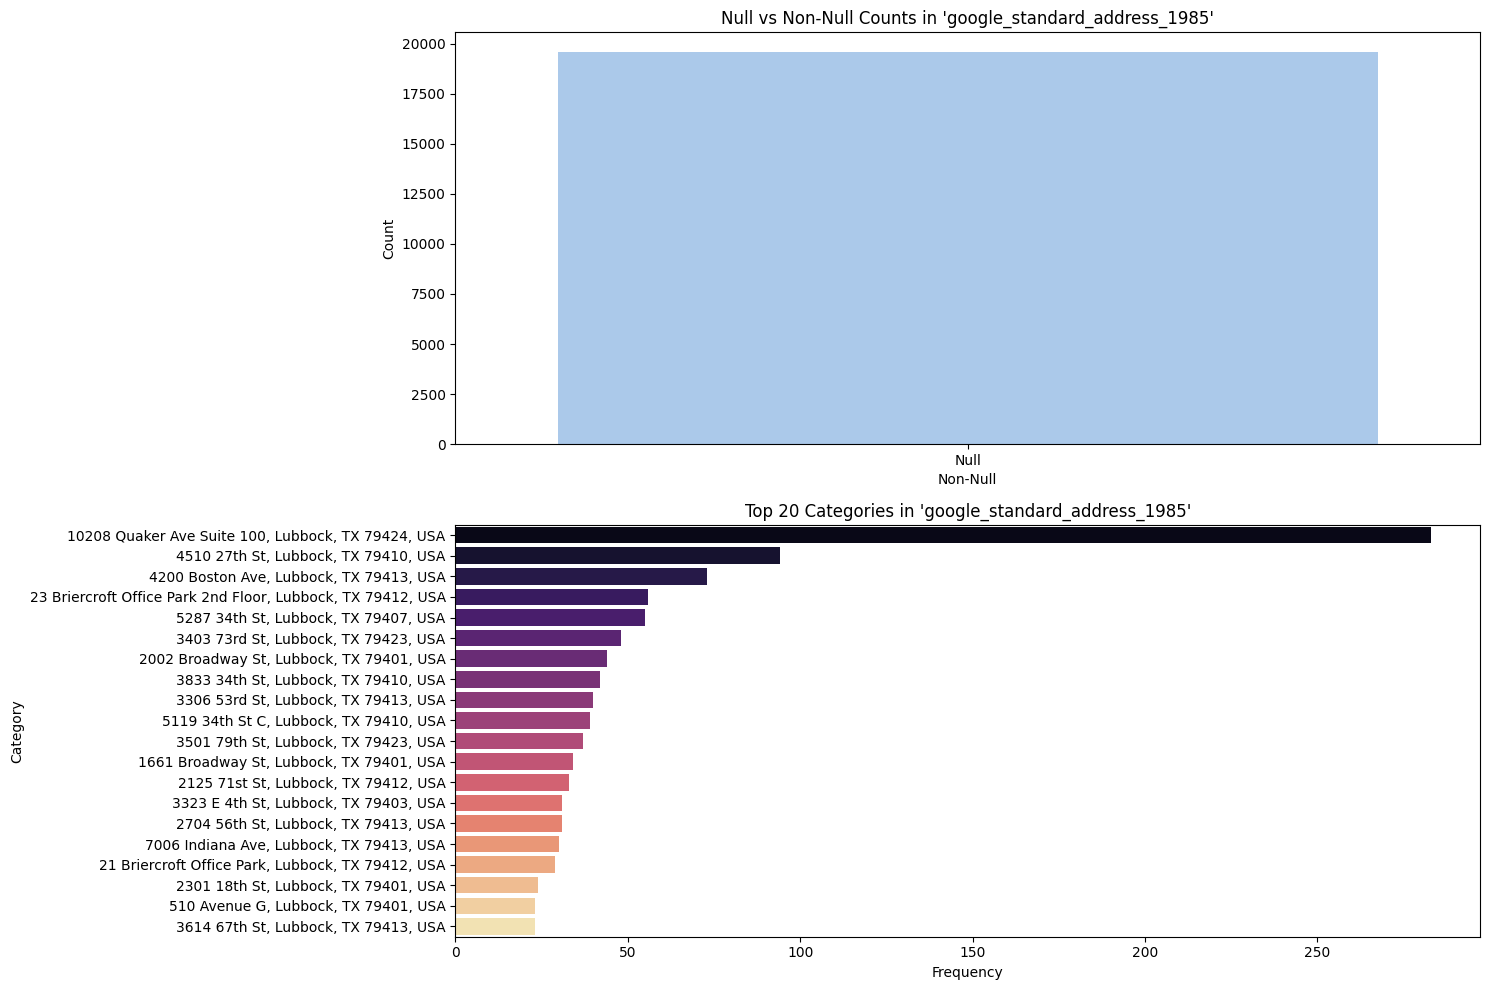

=== Finished Analysis for Column: 'google_standard_address_1985' ===



In [71]:
analyze_raw_column(df1985, "google_standard_address_1985")

#### zip_code_1985


=== Analyzing Column: 'zip_code_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'zip_code_1985': 19574
Null (NaN) values in 'zip_code_1985': 9
Unique non-null values in 'zip_code_1985': 235

--- Random Sample of 'zip_code_1985' Values ---
  Row 18952 => 79412.0
  Row 17618 => 79316.0
  Row 5651 => 79413.0
  Row 7830 => 79401.0
  Row 10963 => 79411.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 79404.0
   Row 1 => 79404.0
   Row 2 => 79404.0
   Row 3 => 79404.0
   Row 4 => 79404.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19574 non-null values, 19574 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'zip_code_1985':
count    19574.000000
mean     79357.053183
std        665.565614
min      28390.000000
25%      79404.000000
50%      79412.000000
75%      79413.000000
max      92103.000000
dtype: float6

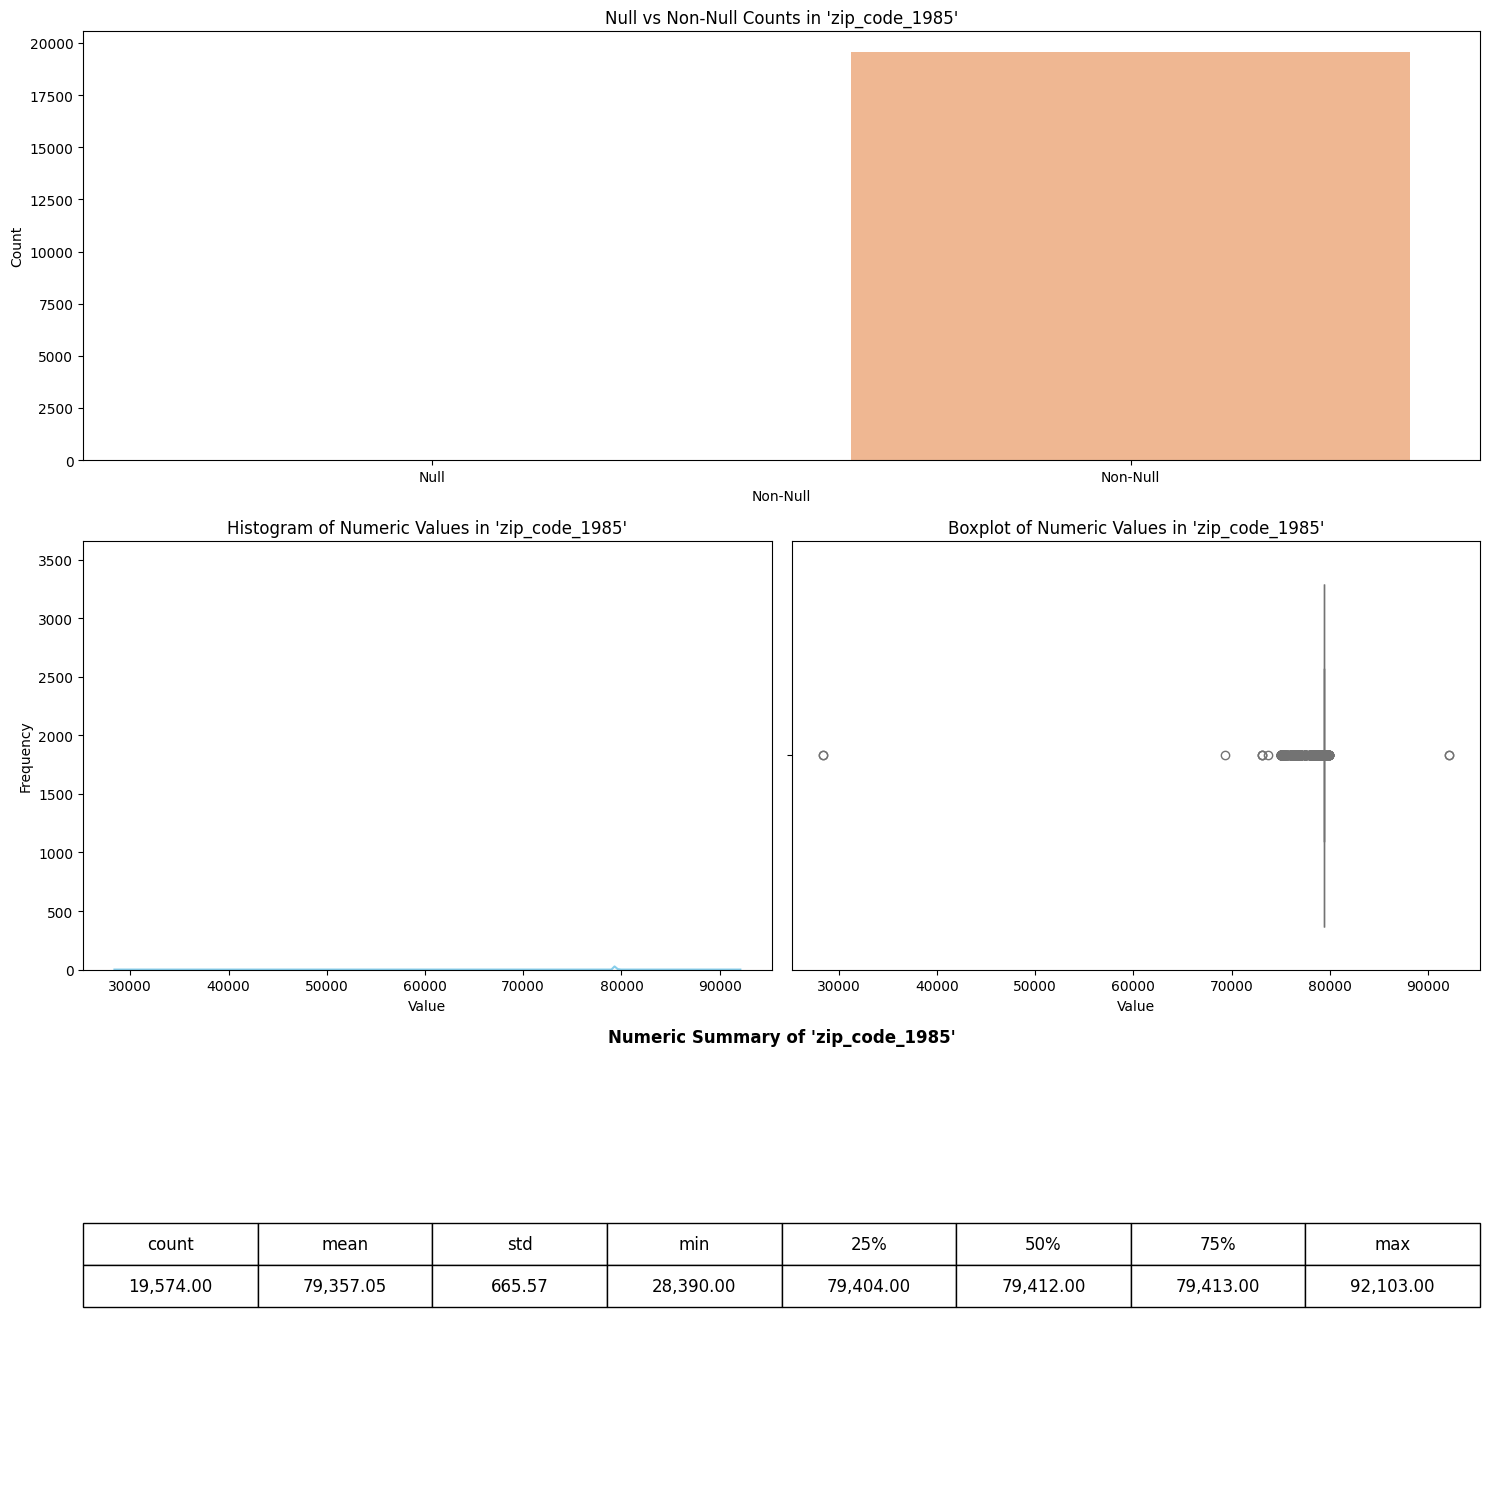

=== Finished Analysis for Column: 'zip_code_1985' ===



In [72]:
analyze_raw_column(df1985, "zip_code_1985")

#### latitude_1985


=== Analyzing Column: 'latitude_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'latitude_1985': 19583
Null (NaN) values in 'latitude_1985': 0
Unique non-null values in 'latitude_1985': 12992

--- Random Sample of 'latitude_1985' Values ---
  Row 12074 => 33.5515249
  Row 18152 => 33.5607542
  Row 15144 => 33.5594592
  Row 2140 => 33.5285102
  Row 5304 => 33.5747111

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 33.5580853
   Row 1 => 33.5594772
   Row 2 => 33.5623263
   Row 3 => 33.5623059
   Row 4 => 33.5623319
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19583 non-null values, 19583 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'latitude_1985':
count    19583.000000
mean        33.523088
std          0.364902
min         26.104618
25%         33.537634
50%         33.559803
75%         33.577317
max

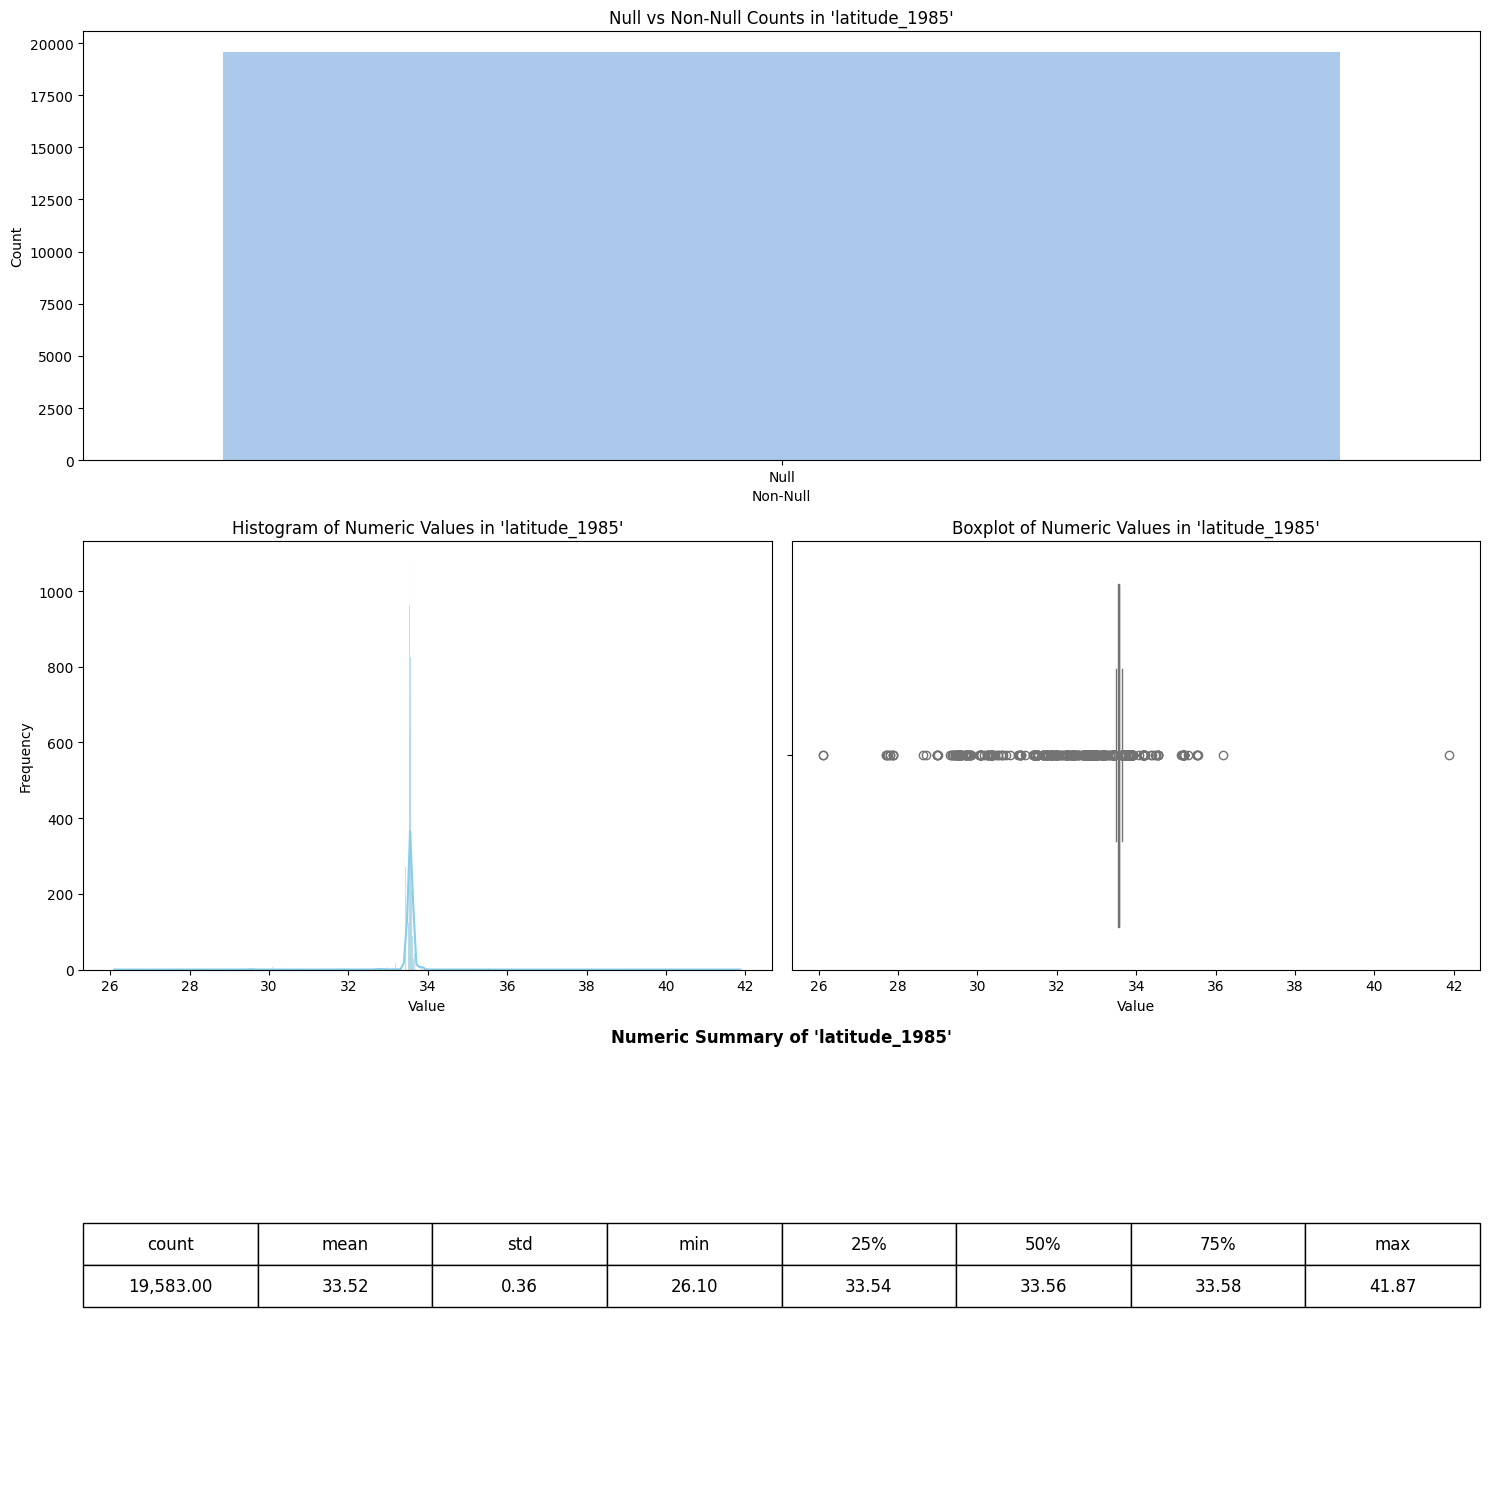

=== Finished Analysis for Column: 'latitude_1985' ===



In [73]:
analyze_raw_column(df1985, "latitude_1985")

#### longitude_1985


=== Analyzing Column: 'longitude_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'longitude_1985': 19583
Null (NaN) values in 'longitude_1985': 0
Unique non-null values in 'longitude_1985': 12971

--- Random Sample of 'longitude_1985' Values ---
  Row 12074 => -101.8492228
  Row 18152 => -101.9075424
  Row 15144 => -101.8720053
  Row 2140 => -101.9341796
  Row 5304 => -101.8586926

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => -101.8384385
   Row 1 => -101.8389432
   Row 2 => -101.8310597
   Row 3 => -101.8304883
   Row 4 => -101.829744
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19583 non-null values, 19583 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'longitude_1985':
count    19583.000000
mean      -101.793743
std          0.665161
min       -117.163675
25%       -101.899655
50%       -101.873749


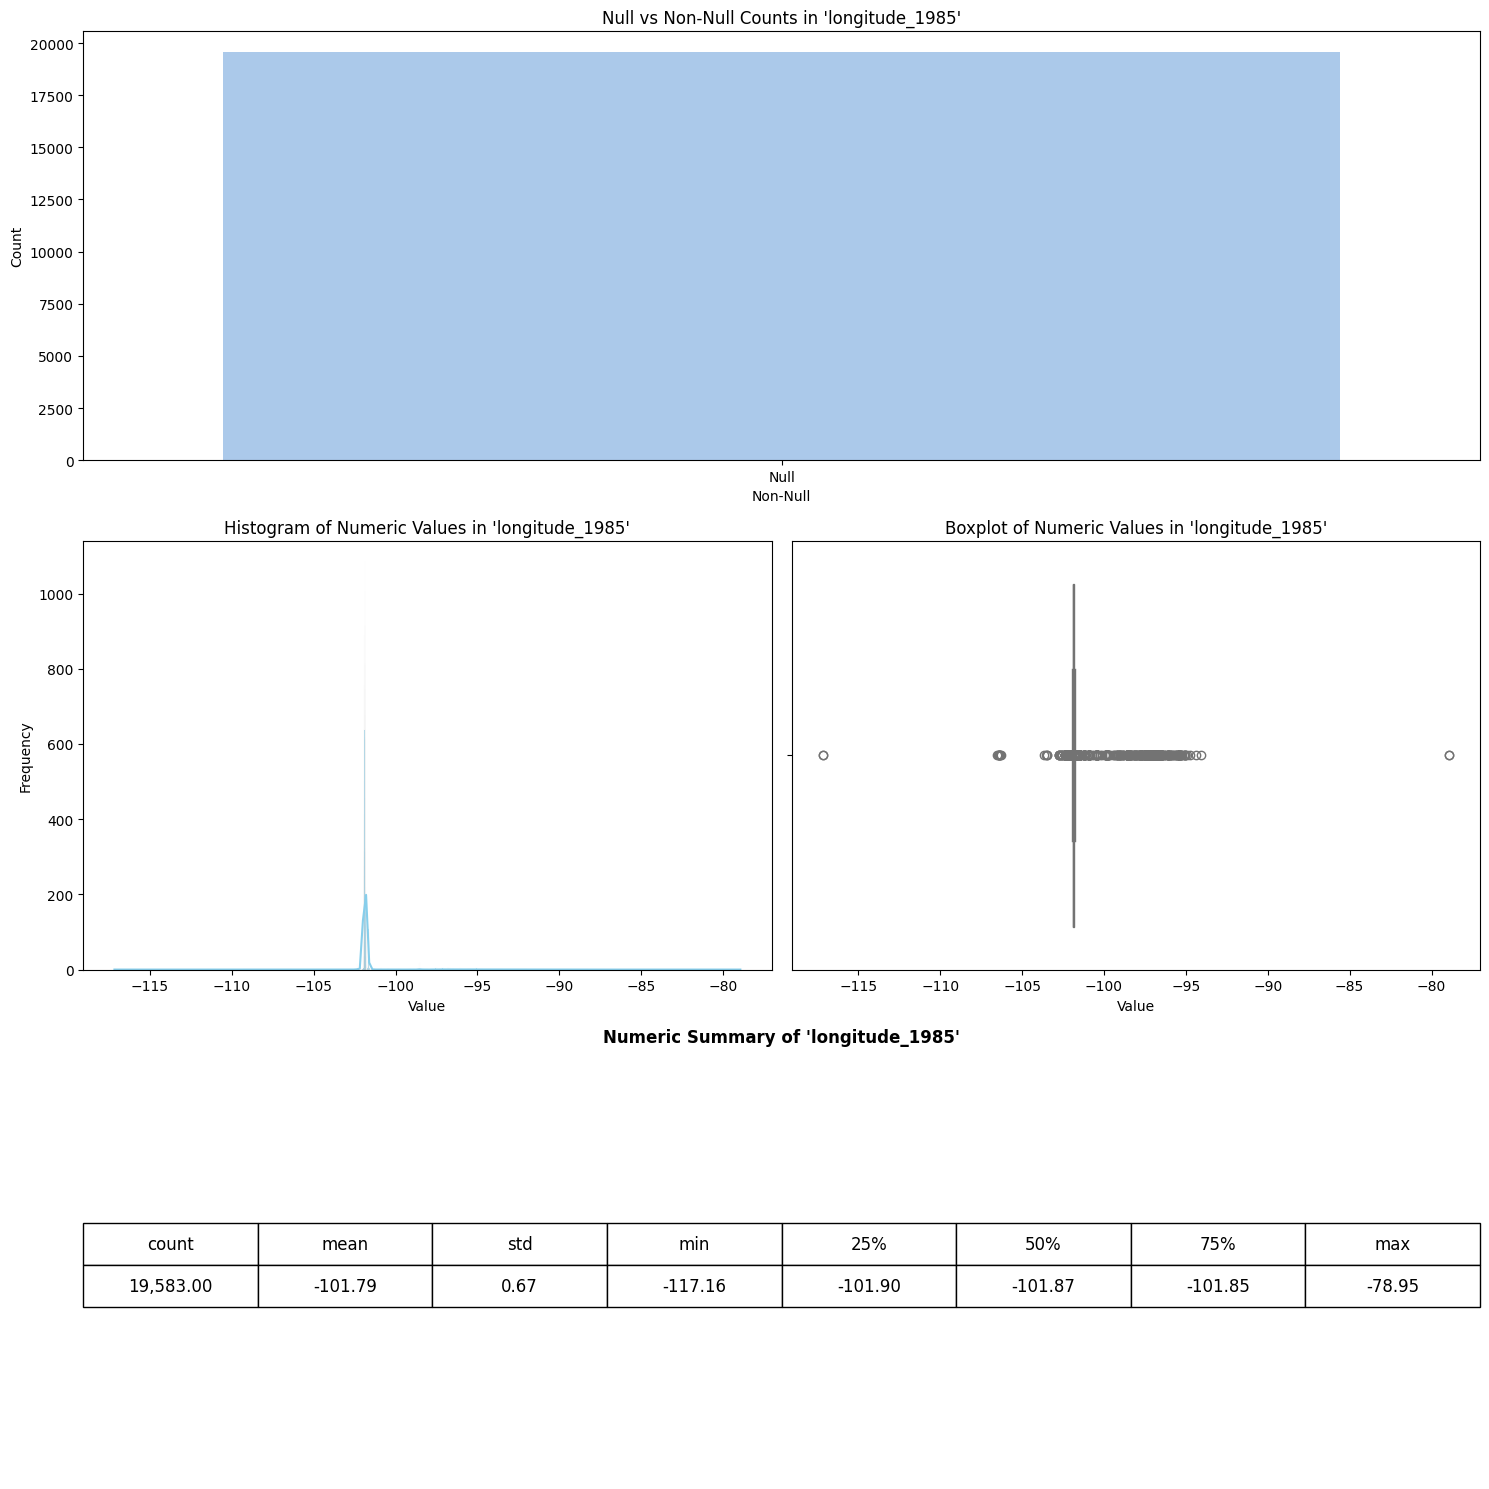

=== Finished Analysis for Column: 'longitude_1985' ===



In [74]:
analyze_raw_column(df1985, "longitude_1985")

#### area_1985


=== Analyzing Column: 'area_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'area_1985': 19387
Null (NaN) values in 'area_1985': 196
Unique non-null values in 'area_1985': 72

--- Random Sample of 'area_1985' Values ---
  Row 5260 => 202.0
  Row 14644 => 111.0
  Row 3677 => 202.0
  Row 2865 => 111.0
  Row 5464 => 403.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 205.0
   Row 2 => 206.0
   Row 3 => 206.0
   Row 4 => 206.0
   Row 5 => 206.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19387 non-null values, 19387 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'area_1985':
count    19387.000000
mean       338.048641
std        283.114091
min          0.000000
25%        202.000000
50%        304.000000
75%        401.000000
max       4117.000000
dtype: float64

--- Plotting Section ---


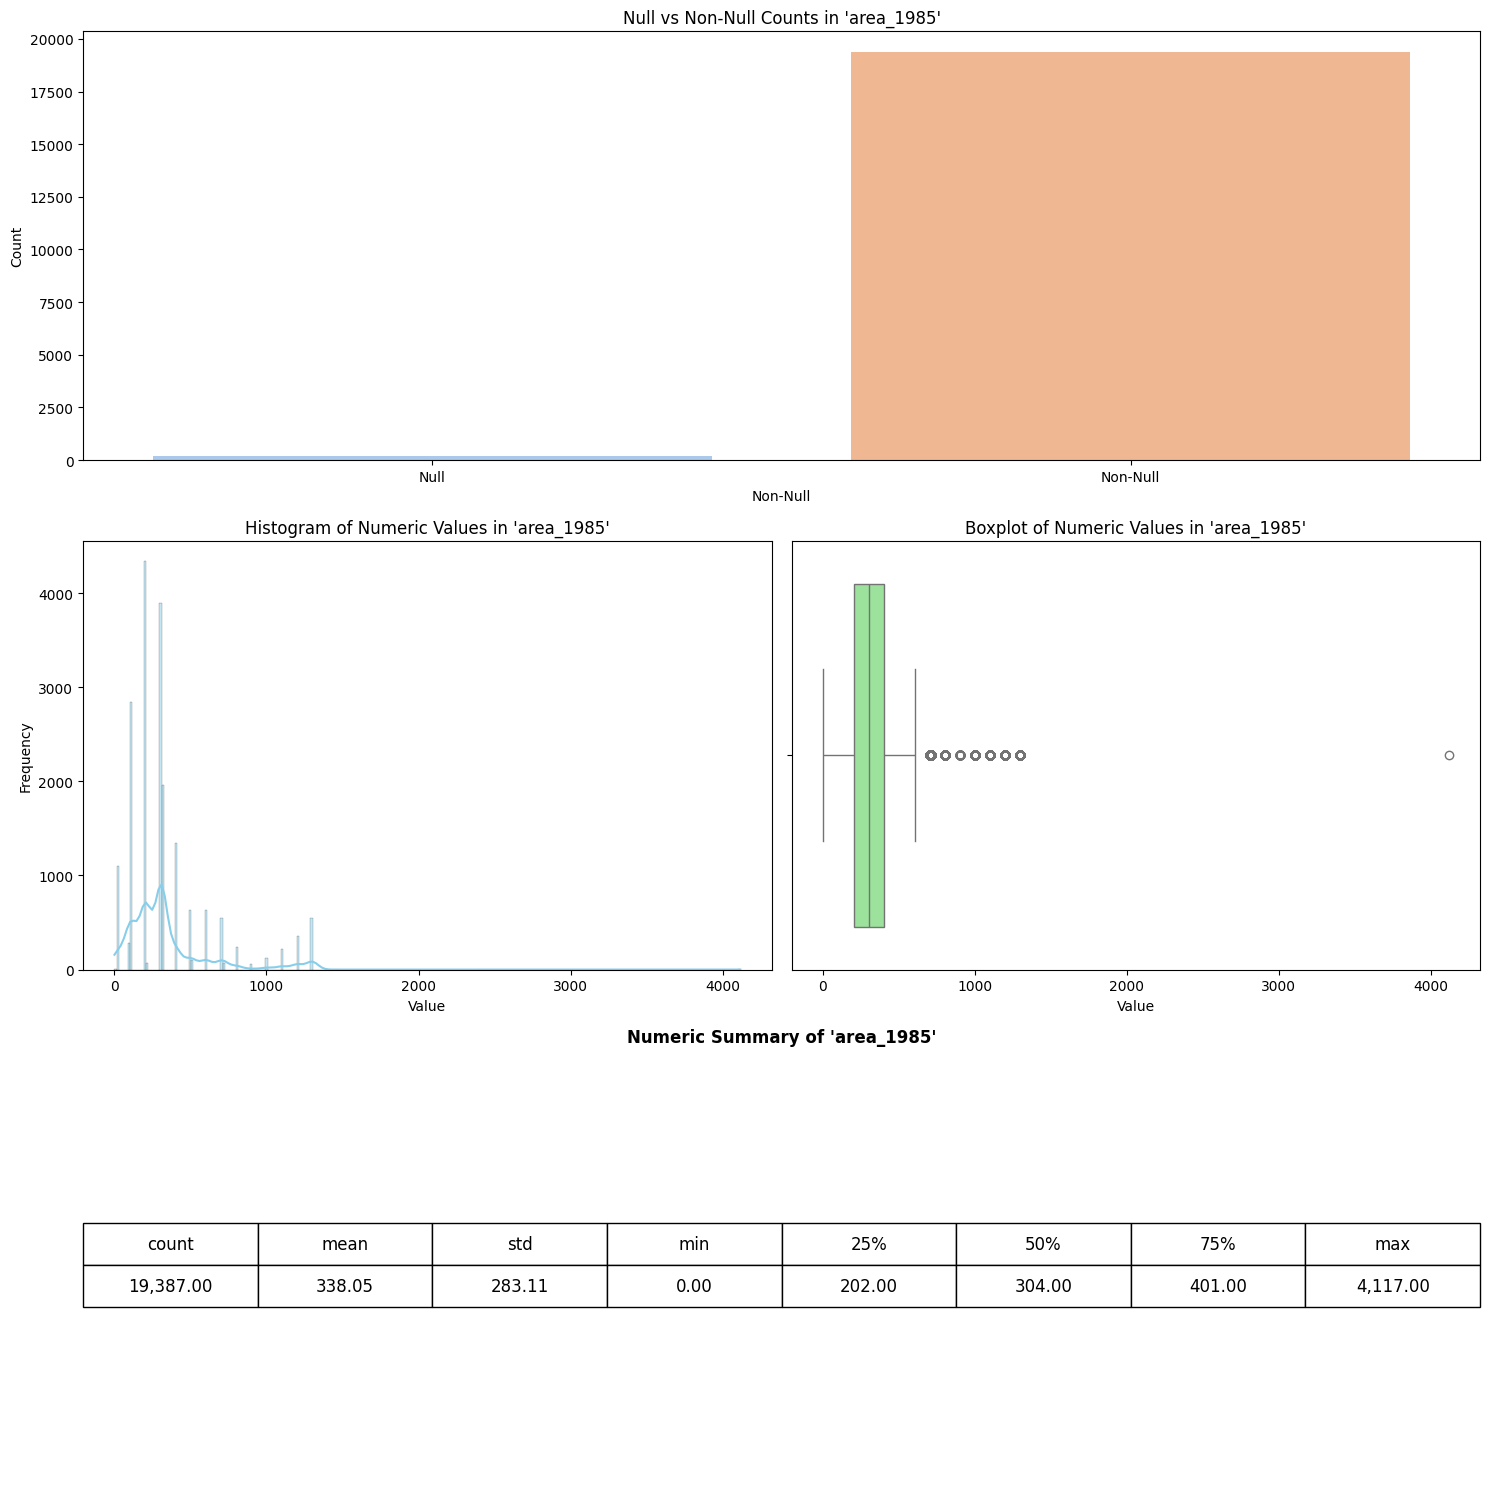

=== Finished Analysis for Column: 'area_1985' ===



In [75]:
analyze_raw_column(df1985, "area_1985")

#### land _1985


=== Analyzing Column: 'land _1985' ===
Total rows in DataFrame: 19583
Non-null values in 'land _1985': 19289
Null (NaN) values in 'land _1985': 294
Unique non-null values in 'land _1985': 2716

--- Random Sample of 'land _1985' Values ---
  Row 15794 => 4312.0
  Row 16211 => 6380.0
  Row 485 => 1280.0
  Row 5805 => 420.0
  Row 5082 => 7830.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 2600.0
   Row 1 => 2580.0
   Row 2 => 1250.0
   Row 3 => 1340.0
   Row 4 => 1190.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19289 non-null values, 19289 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'land _1985':
count     19289.000000
mean       6724.819794
std       20927.618696
min          10.000000
25%        2760.000000
50%        3942.000000
75%        5280.000000
max      935830.000000
dtype: float64

--- Plotting Sect

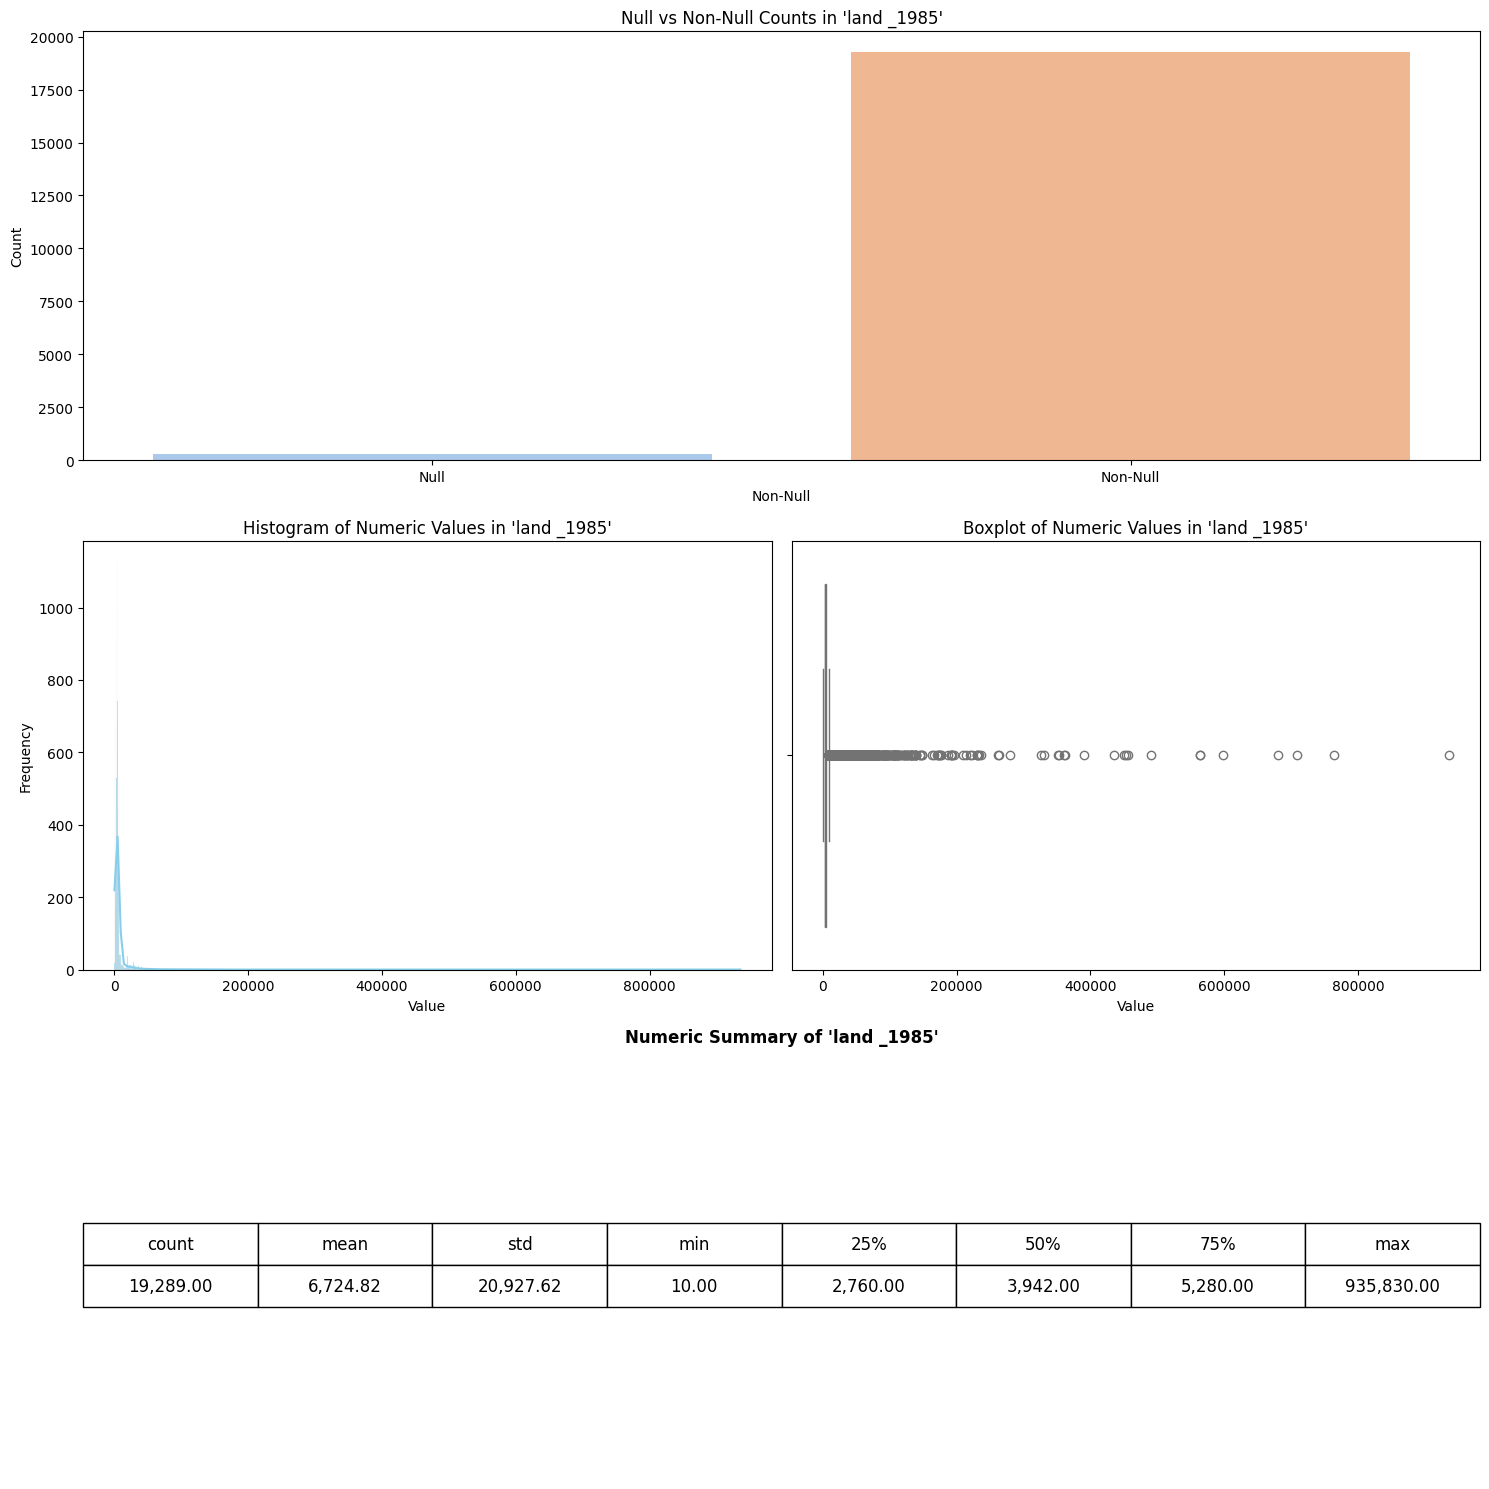

=== Finished Analysis for Column: 'land _1985' ===



In [76]:
analyze_raw_column(df1985, "land _1985")

#### bld-val_1985


=== Analyzing Column: 'bld-val_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'bld-val_1985': 16409
Null (NaN) values in 'bld-val_1985': 3174
Unique non-null values in 'bld-val_1985': 9454

--- Random Sample of 'bld-val_1985' Values ---
  Row 8877 => 2240.0
  Row 17327 => 57330.0
  Row 5267 => 10967.0
  Row 6015 => 35550.0
  Row 204 => 53820.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 10580.0
   Row 2 => 7790.0
   Row 3 => 11830.0
   Row 4 => 10910.0
   Row 5 => 10910.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 16409 non-null values, 16409 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'bld-val_1985':
count    1.640900e+04
mean     3.399272e+04
std      6.309625e+04
min      1.000000e+02
25%      1.318900e+04
50%      2.476400e+04
75%      4.275000e+04
max      3.173350e+06
dtype: float64

--- 

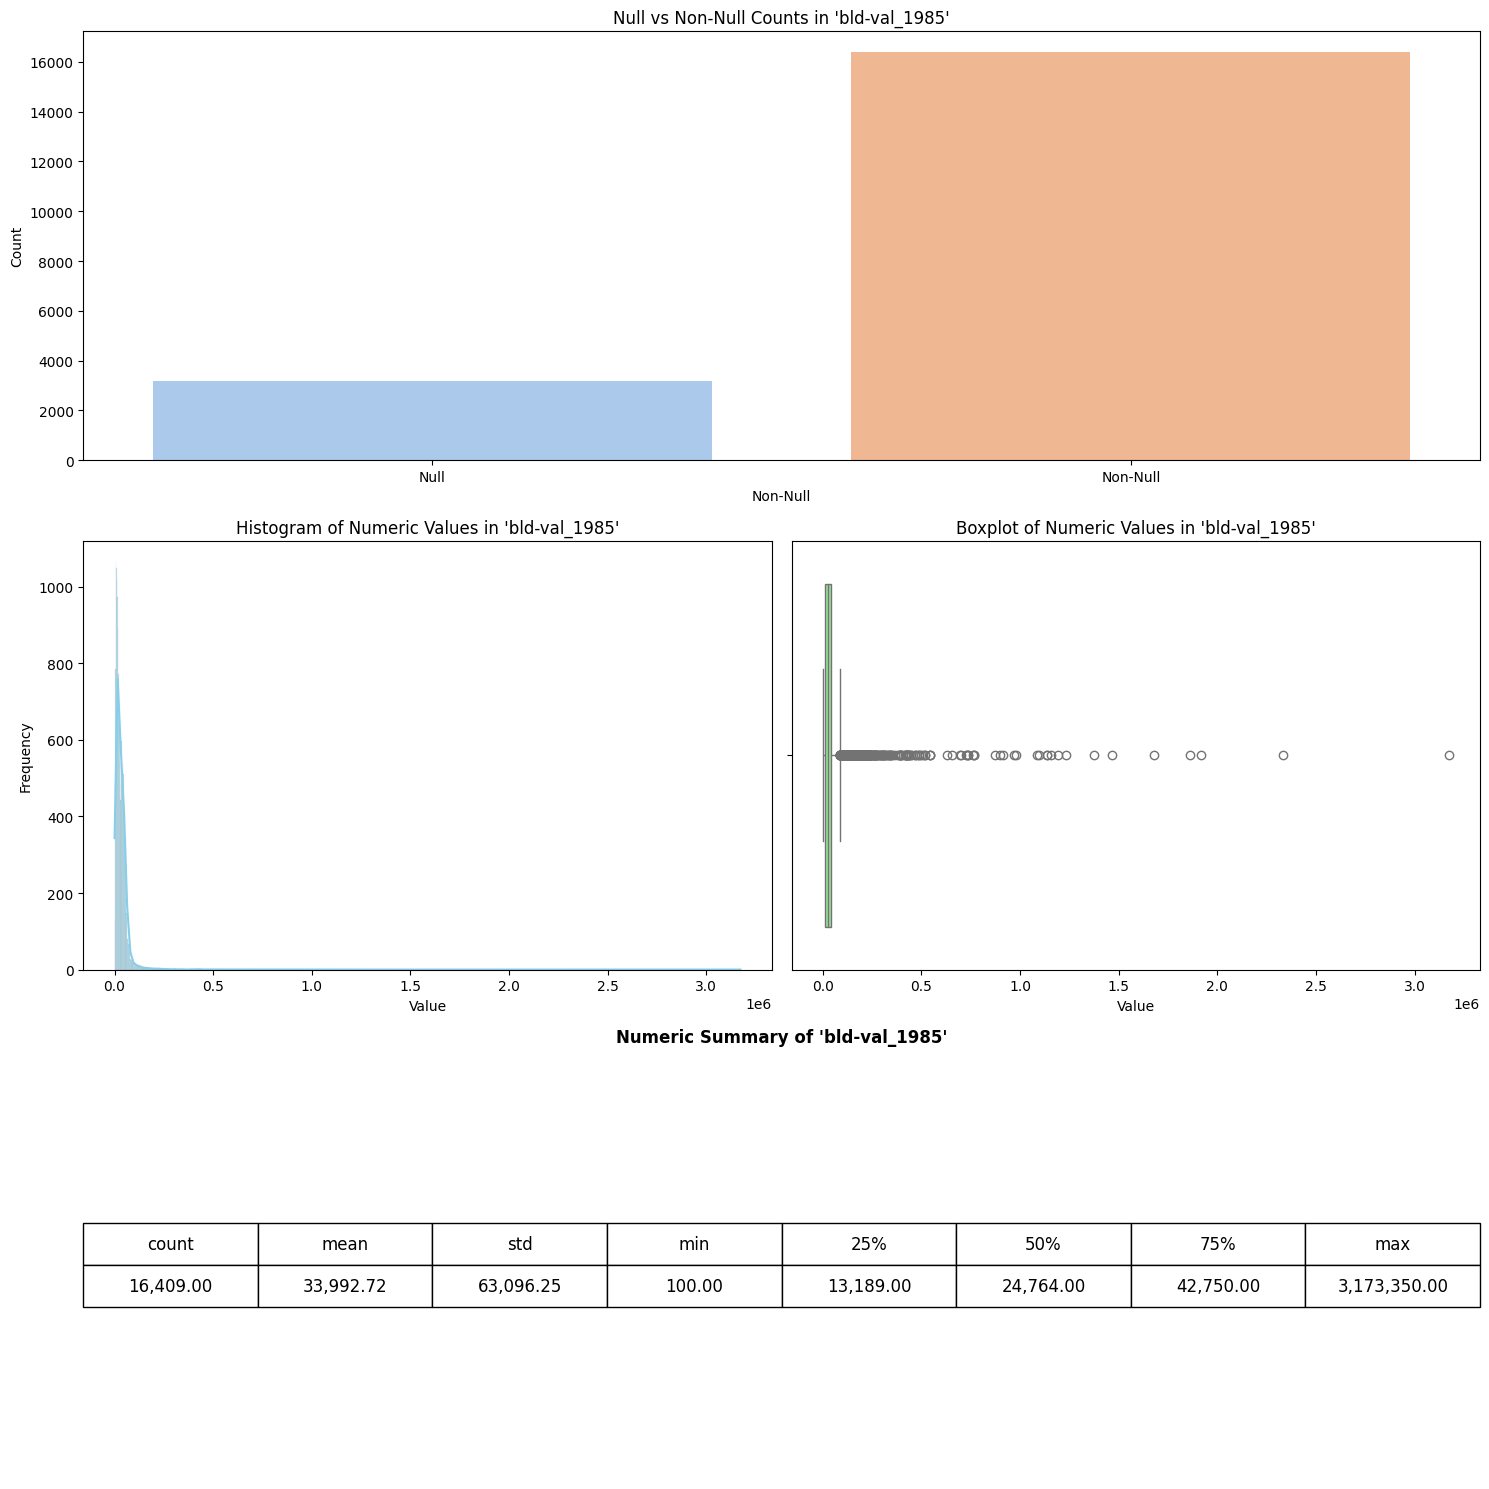

=== Finished Analysis for Column: 'bld-val_1985' ===



In [77]:
analyze_raw_column(df1985, "bld-val_1985")

#### spec_feat_1985


=== Analyzing Column: 'spec_feat_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'spec_feat_1985': 6649
Null (NaN) values in 'spec_feat_1985': 12934
Unique non-null values in 'spec_feat_1985': 1002

--- Random Sample of 'spec_feat_1985' Values ---
  Row 7873 => 50.0
  Row 6276 => 1100.0
  Row 17063 => 138.0
  Row 16198 => 110.0
  Row 14542 => 300.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 100.0
   Row 3 => 100.0
   Row 4 => 500.0
   Row 7 => 200.0
   Row 11 => 50.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 6649 non-null values, 6649 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'spec_feat_1985':
count      6649.000000
mean       1777.032035
std        7420.131076
min          10.000000
25%         100.000000
50%         200.000000
75%         528.000000
max      175318.000000
dtype: float64

-

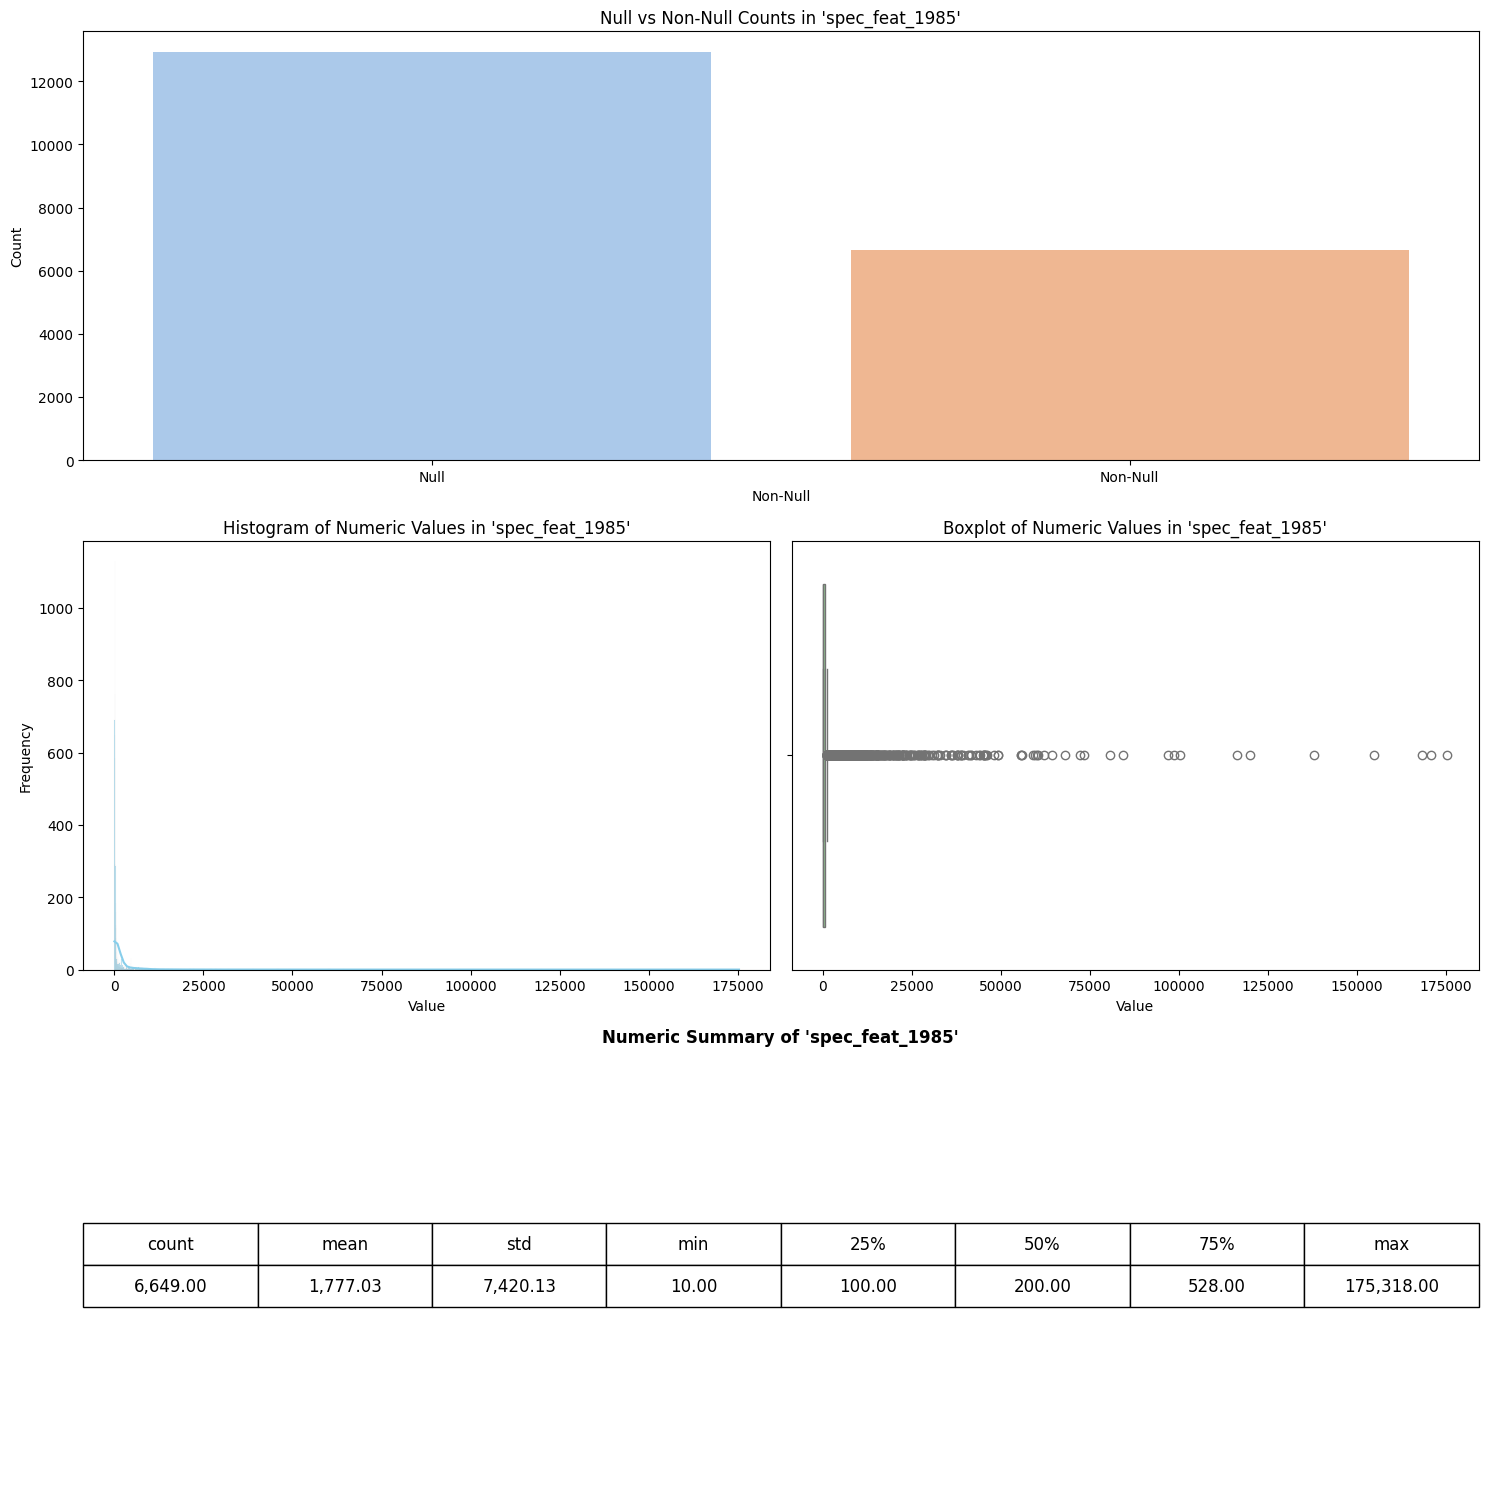

=== Finished Analysis for Column: 'spec_feat_1985' ===



In [78]:
analyze_raw_column(df1985, "spec_feat_1985")

#### assessed_1985


=== Analyzing Column: 'assessed_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'assessed_1985': 19502
Null (NaN) values in 'assessed_1985': 81
Unique non-null values in 'assessed_1985': 10597

--- Random Sample of 'assessed_1985' Values ---
  Row 15813 => 39226.0
  Row 15126 => 12440.0
  Row 16234 => 56485.0
  Row 8400 => 179750.0
  Row 3846 => 13739.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 13260.0
   Row 2 => 9040.0
   Row 3 => 13270.0
   Row 4 => 12600.0
   Row 5 => 12100.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19502 non-null values, 19502 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'assessed_1985':
count    1.950200e+04
mean     3.543581e+04
std      7.508984e+04
min      1.000000e+01
25%      1.148550e+04
50%      2.421100e+04
75%      4.527450e+04
max      3.637670e+06
dtype: flo

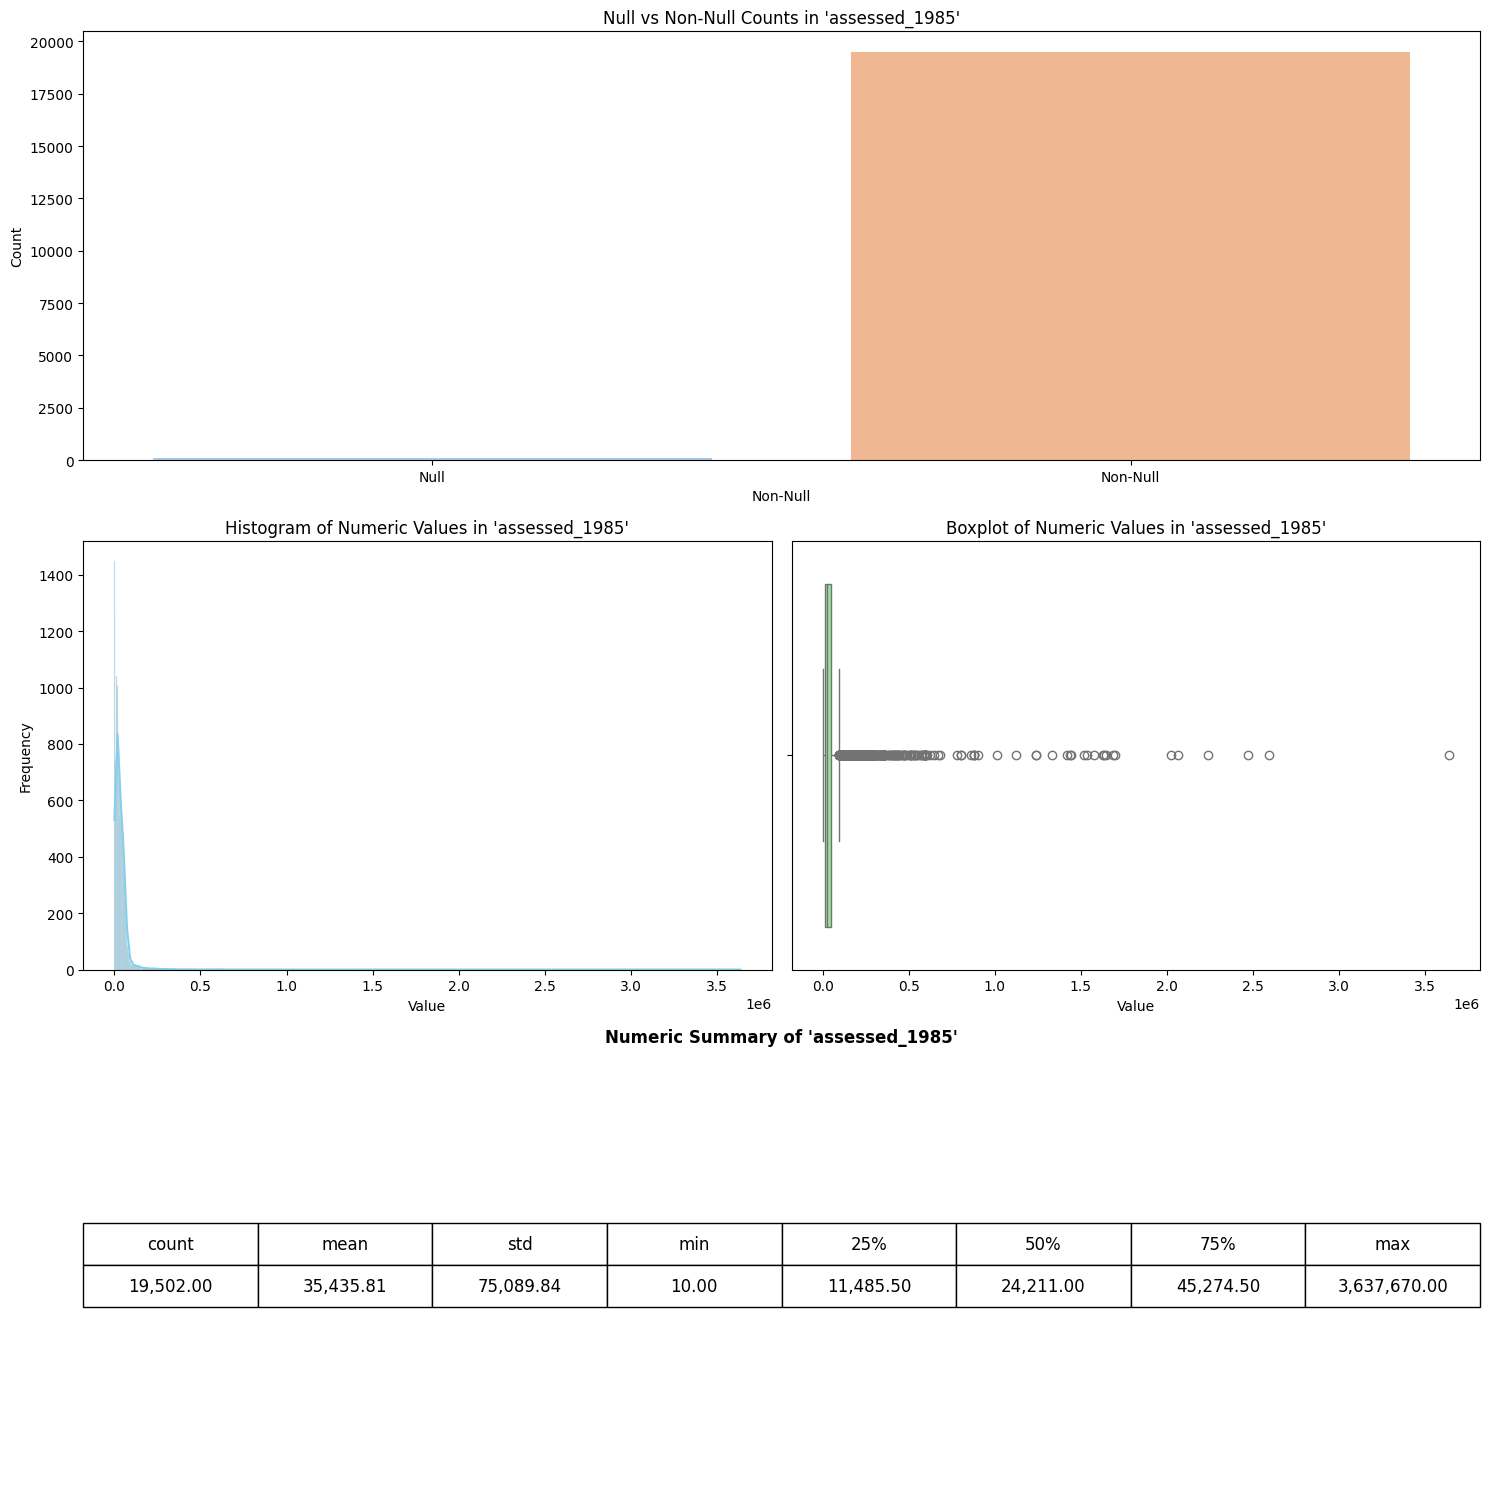

=== Finished Analysis for Column: 'assessed_1985' ===



In [79]:
analyze_raw_column(df1985, "assessed_1985")

#### homestead_1985


=== Analyzing Column: 'homestead_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'homestead_1985': 8415
Null (NaN) values in 'homestead_1985': 11168
Unique non-null values in 'homestead_1985': 14

--- Random Sample of 'homestead_1985' Values ---
  Row 5029 => 5000.0
  Row 12263 => 5000.0
  Row 5922 => 5000.0
  Row 1936 => 5000.0
  Row 17901 => 5000.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 5000.0
   Row 3 => 5000.0
   Row 11 => 5000.0
   Row 13 => 5000.0
   Row 14 => 5000.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 8415 non-null values, 8415 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'homestead_1985':
count      8415.000000
mean       5054.250980
std        3289.025161
min         500.000000
25%        5000.000000
50%        5000.000000
75%        5000.000000
max      291072.000000
dtype: 

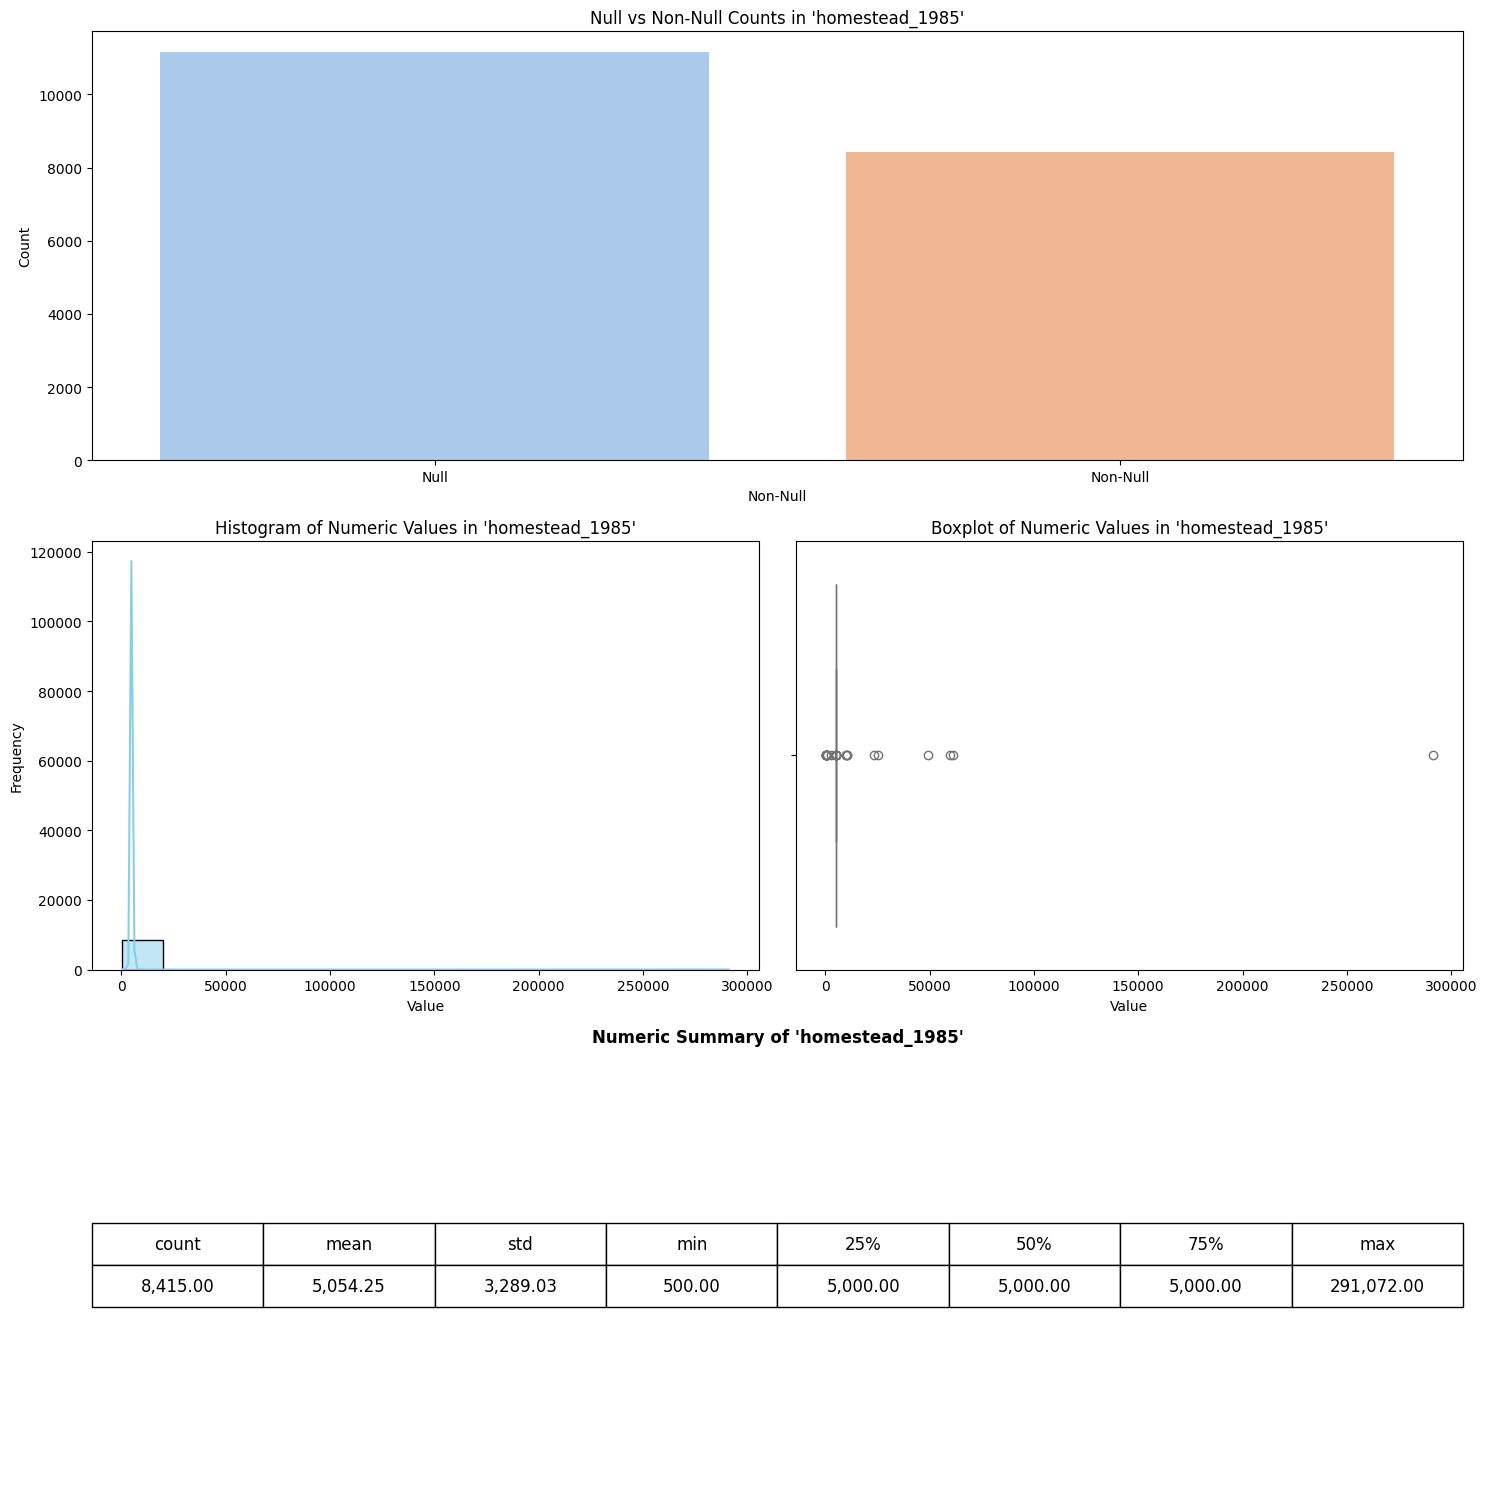

=== Finished Analysis for Column: 'homestead_1985' ===



In [80]:
analyze_raw_column(df1985, "homestead_1985")

#### school_1985


=== Analyzing Column: 'school_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'school_1985': 19122
Null (NaN) values in 'school_1985': 461
Unique non-null values in 'school_1985': 10829

--- Random Sample of 'school_1985' Values ---
  Row 507 => 22220.0
  Row 9742 => 0.0
  Row 453 => 6715.0
  Row 10593 => 28340.0
  Row 11474 => 5036.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 8260.0
   Row 2 => 4040.0
   Row 3 => 8270.0
   Row 4 => 12600.0
   Row 5 => 12100.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19122 non-null values, 19122 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'school_1985':
count    1.912200e+04
mean     3.167662e+04
std      7.572723e+04
min      0.000000e+00
25%      7.100000e+03
50%      2.036000e+04
75%      3.993000e+04
max      3.637670e+06
dtype: float64

--- Plotting Sect

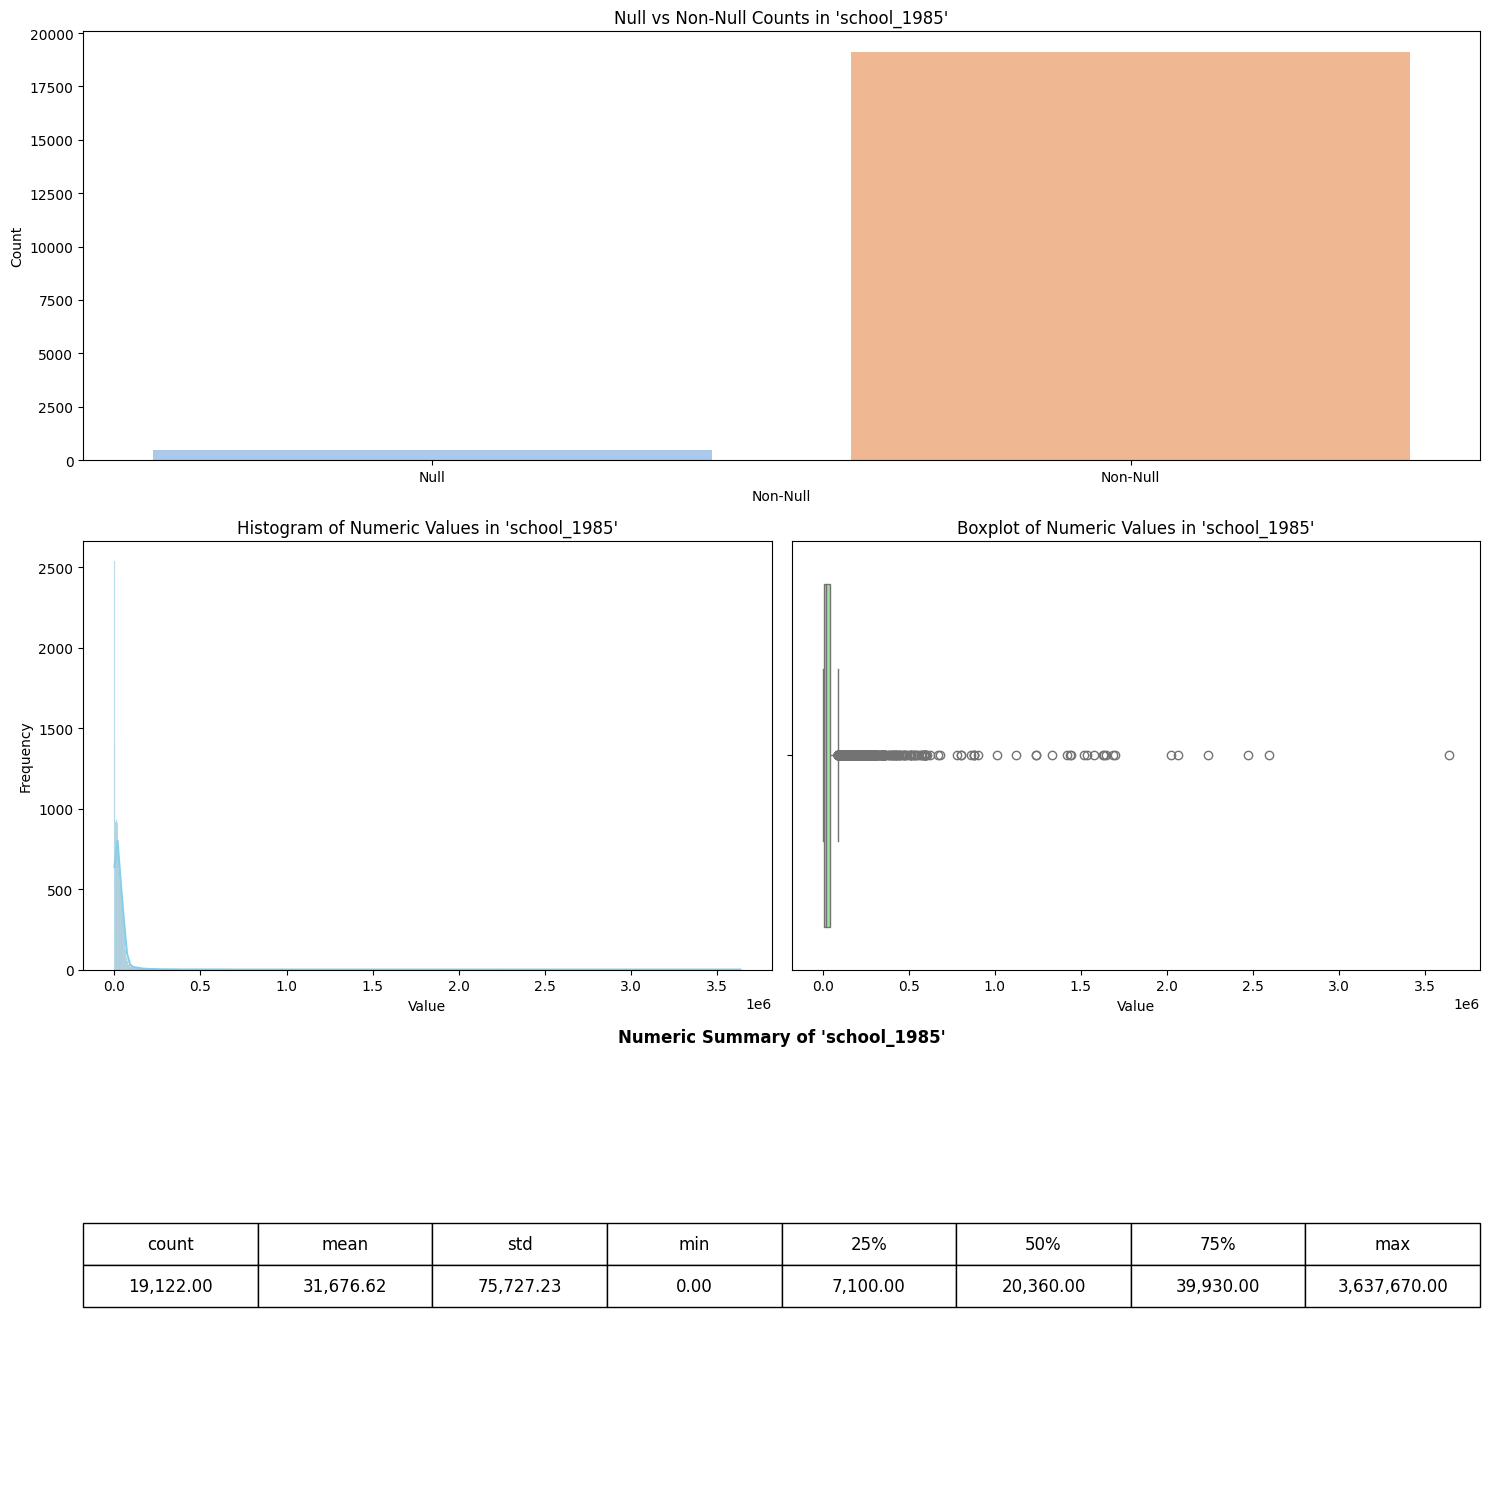

=== Finished Analysis for Column: 'school_1985' ===



In [81]:
analyze_raw_column(df1985, "school_1985")

#### county_1985


=== Analyzing Column: 'county_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'county_1985': 19062
Null (NaN) values in 'county_1985': 521
Unique non-null values in 'county_1985': 10709

--- Random Sample of 'county_1985' Values ---
  Row 18028 => 8740.0
  Row 7694 => 9670.0
  Row 18017 => 16540.0
  Row 3847 => 17941.0
  Row 4346 => 72270.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 13260.0
   Row 2 => 9040.0
   Row 3 => 13270.0
   Row 4 => 12600.0
   Row 5 => 12100.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 19062 non-null values, 19062 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'county_1985':
count    1.906200e+04
mean     3.361642e+04
std      7.595398e+04
min      0.000000e+00
25%      9.070000e+03
50%      2.228300e+04
75%      4.270000e+04
max      3.637670e+06
dtype: float64

--- Plott

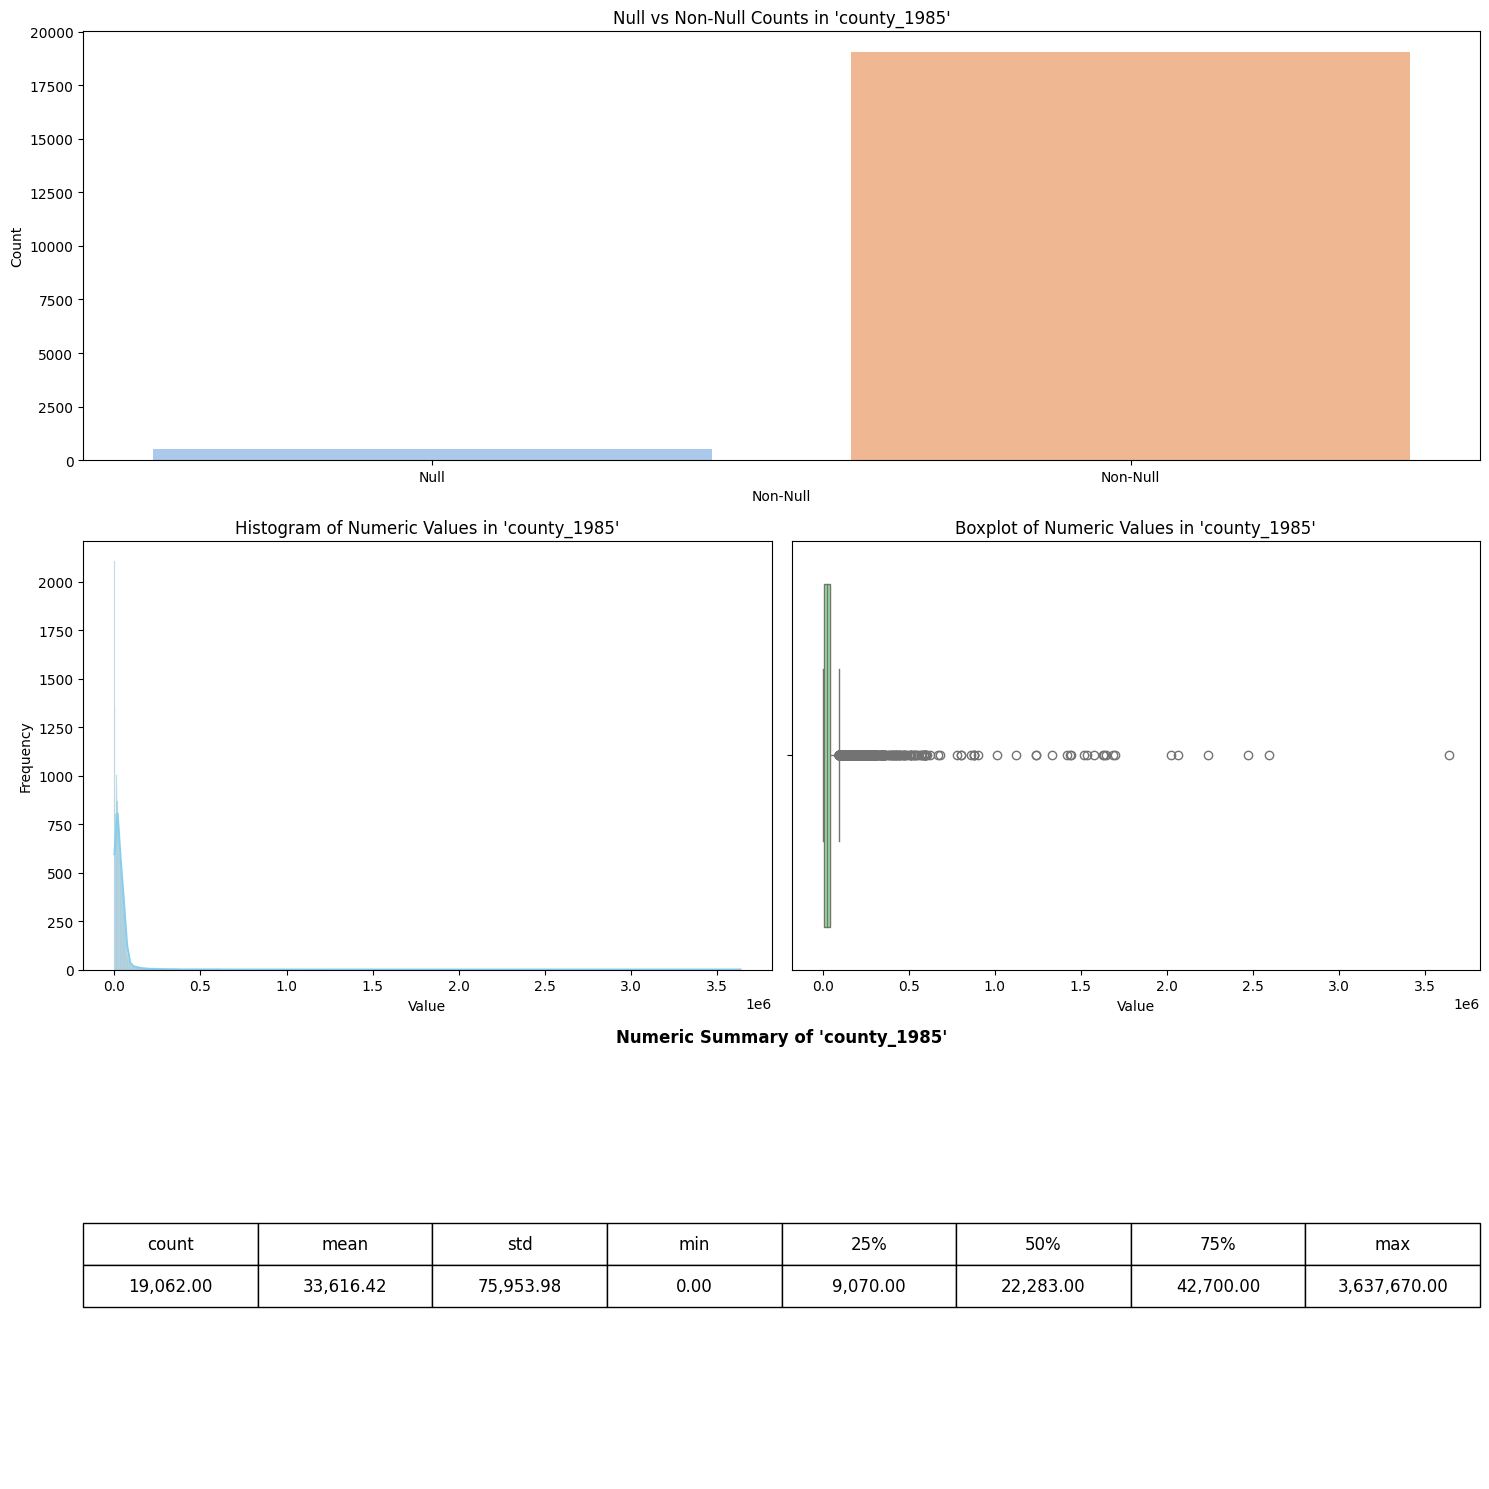

=== Finished Analysis for Column: 'county_1985' ===



In [82]:
analyze_raw_column(df1985, "county_1985")

#### city_1985


=== Analyzing Column: 'city_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'city_1985': 18990
Null (NaN) values in 'city_1985': 593
Unique non-null values in 'city_1985': 10443

--- Random Sample of 'city_1985' Values ---
  Row 45 => 12750.0
  Row 10860 => 0.0
  Row 506 => 8480.0
  Row 12422 => 9040.0
  Row 2284 => 74286.0

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 1 => 13260.0
   Row 2 => 9040.0
   Row 3 => 13270.0
   Row 4 => 12600.0
   Row 5 => 12100.0
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 18990 non-null values, 18990 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'city_1985':
count    1.899000e+04
mean     3.356151e+04
std      7.632744e+04
min      0.000000e+00
25%      8.856250e+03
50%      2.216400e+04
75%      4.268000e+04
max      3.637670e+06
dtype: float64

--- Plotting Section ---


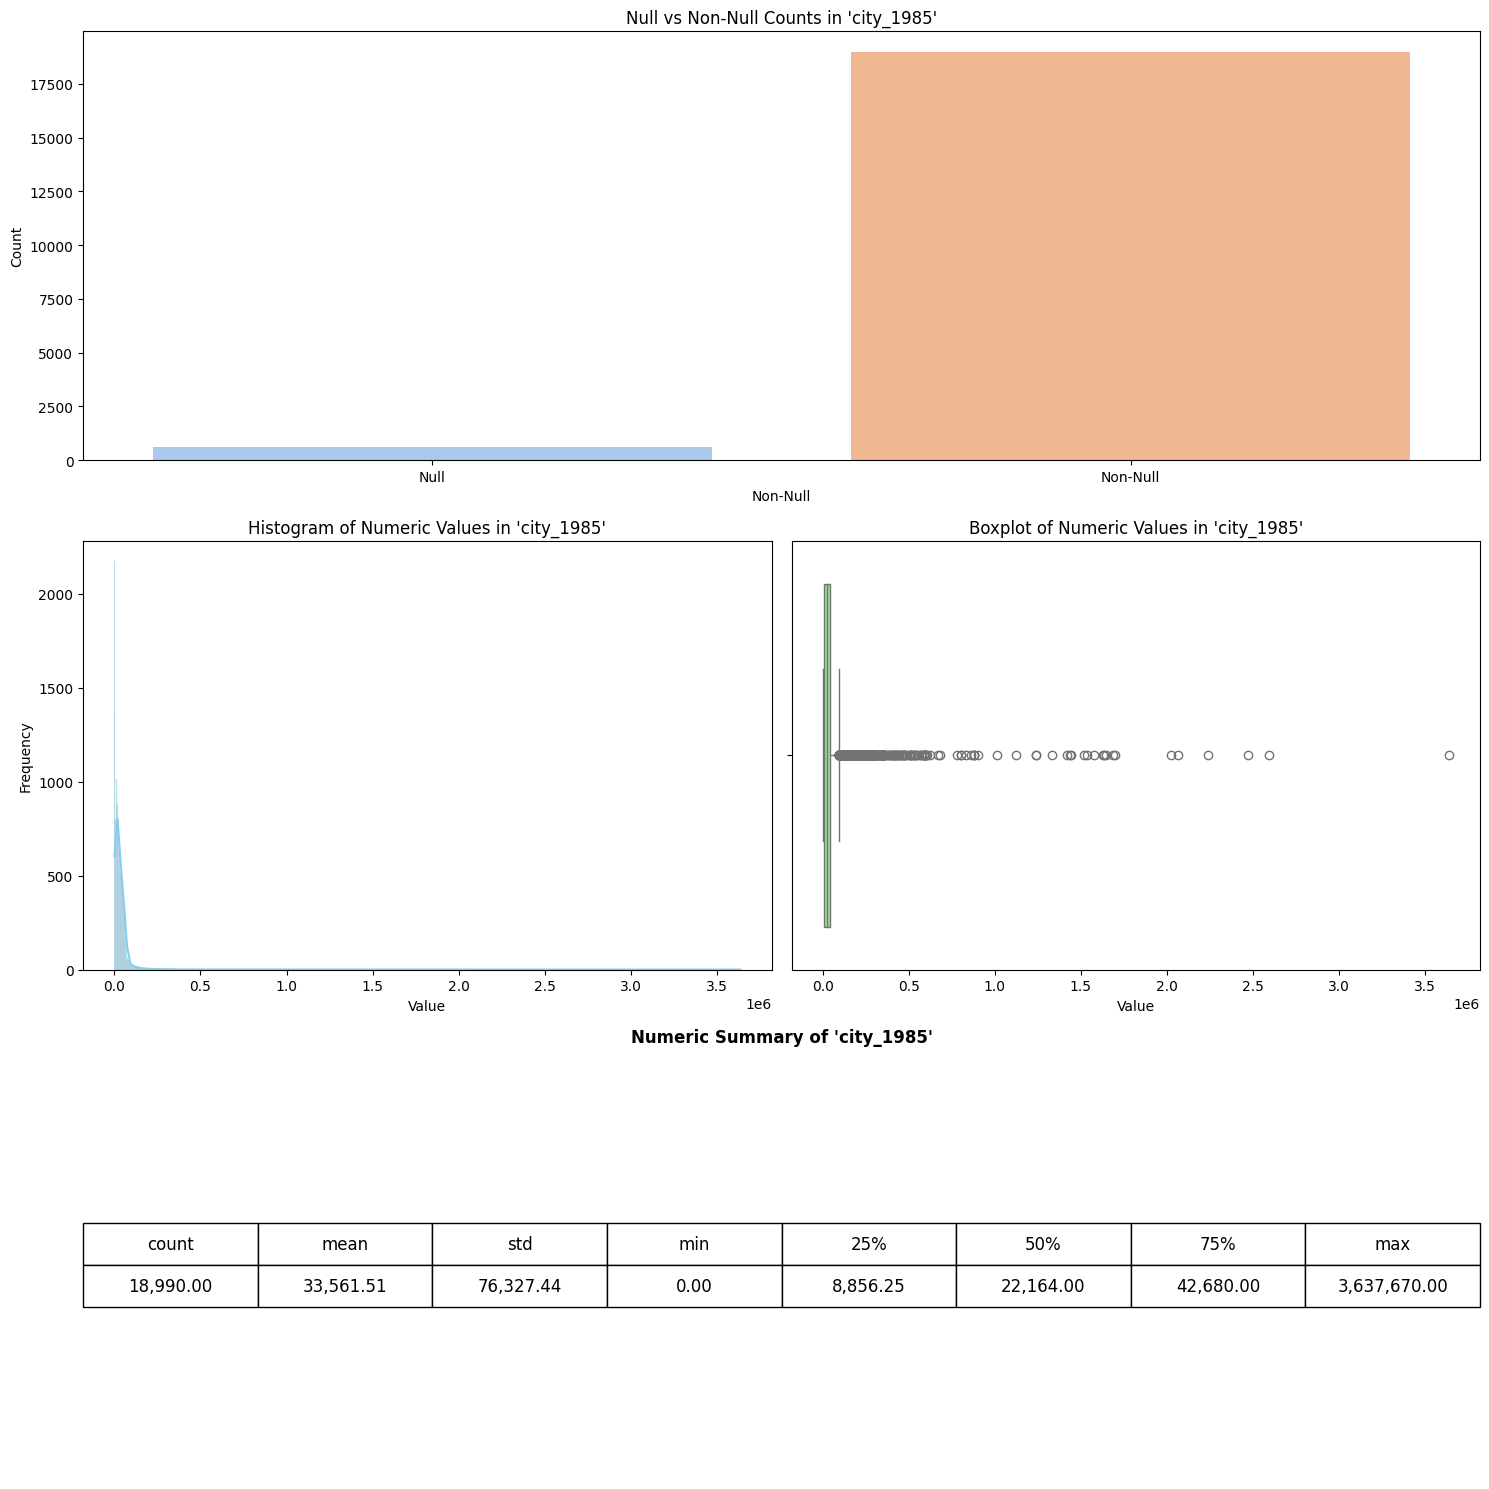

=== Finished Analysis for Column: 'city_1985' ===



In [83]:
analyze_raw_column(df1985, "city_1985")

#### lbb_school_1985


=== Analyzing Column: 'lbb_school_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'lbb_school_1985': 17893
Null (NaN) values in 'lbb_school_1985': 1690
Unique non-null values in 'lbb_school_1985': 10464

--- Random Sample of 'lbb_school_1985' Values ---
  Row 5181 => 5.58
  Row 16189 => 376.17
  Row 12433 => 130.57
  Row 15835 => 248.59
  Row 11255 => 104.36

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 104.44
   Row 1 => 76.82
   Row 2 => 37.57
   Row 3 => 76.91
   Row 4 => 117.18
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 17893 non-null values, 17893 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'lbb_school_1985':
count     17893.000000
mean        316.495594
std        2314.579766
min           0.000000
25%          60.170000
50%         187.490000
75%         370.330000
max      291072.000000
dt

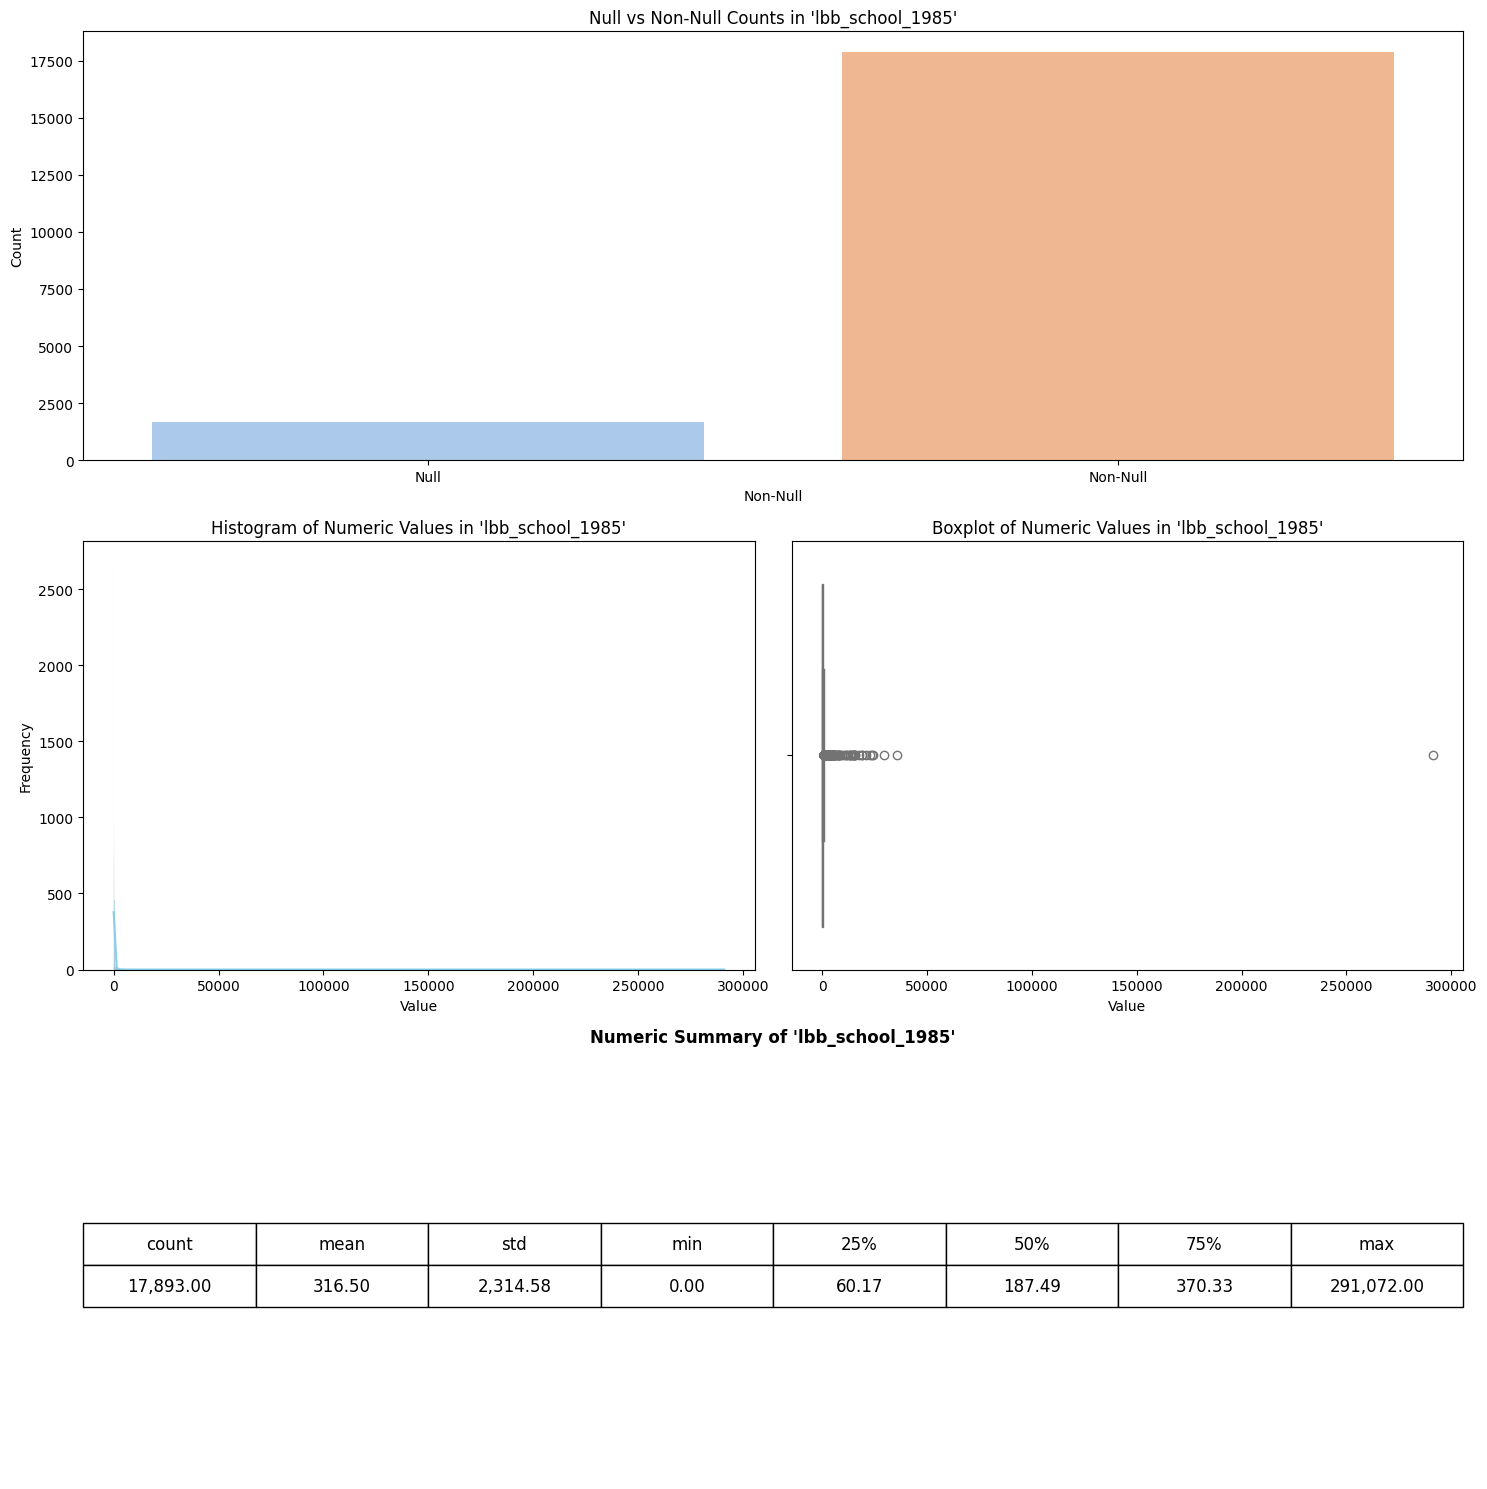

=== Finished Analysis for Column: 'lbb_school_1985' ===



In [84]:
analyze_raw_column(df1985, "lbb_school_1985")

#### lbb_city_1985


=== Analyzing Column: 'lbb_city_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'lbb_city_1985': 17140
Null (NaN) values in 'lbb_city_1985': 2443
Unique non-null values in 'lbb_city_1985': 9893

--- Random Sample of 'lbb_city_1985' Values ---
  Row 18703 => 226.5
  Row 9062 => 124.14
  Row 13260 => 68.4
  Row 290 => 192.64
  Row 3216 => 334.82

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 67.38
   Row 1 => 79.56
   Row 2 => 54.24
   Row 3 => 79.62
   Row 4 => 75.6
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 17140 non-null values, 17140 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'lbb_city_1985':
count    17140.000000
mean       203.371663
std        460.751608
min          0.000000
25%         52.377500
50%        135.650000
75%        257.000000
max      21826.020000
dtype: float64

--- Plotting S

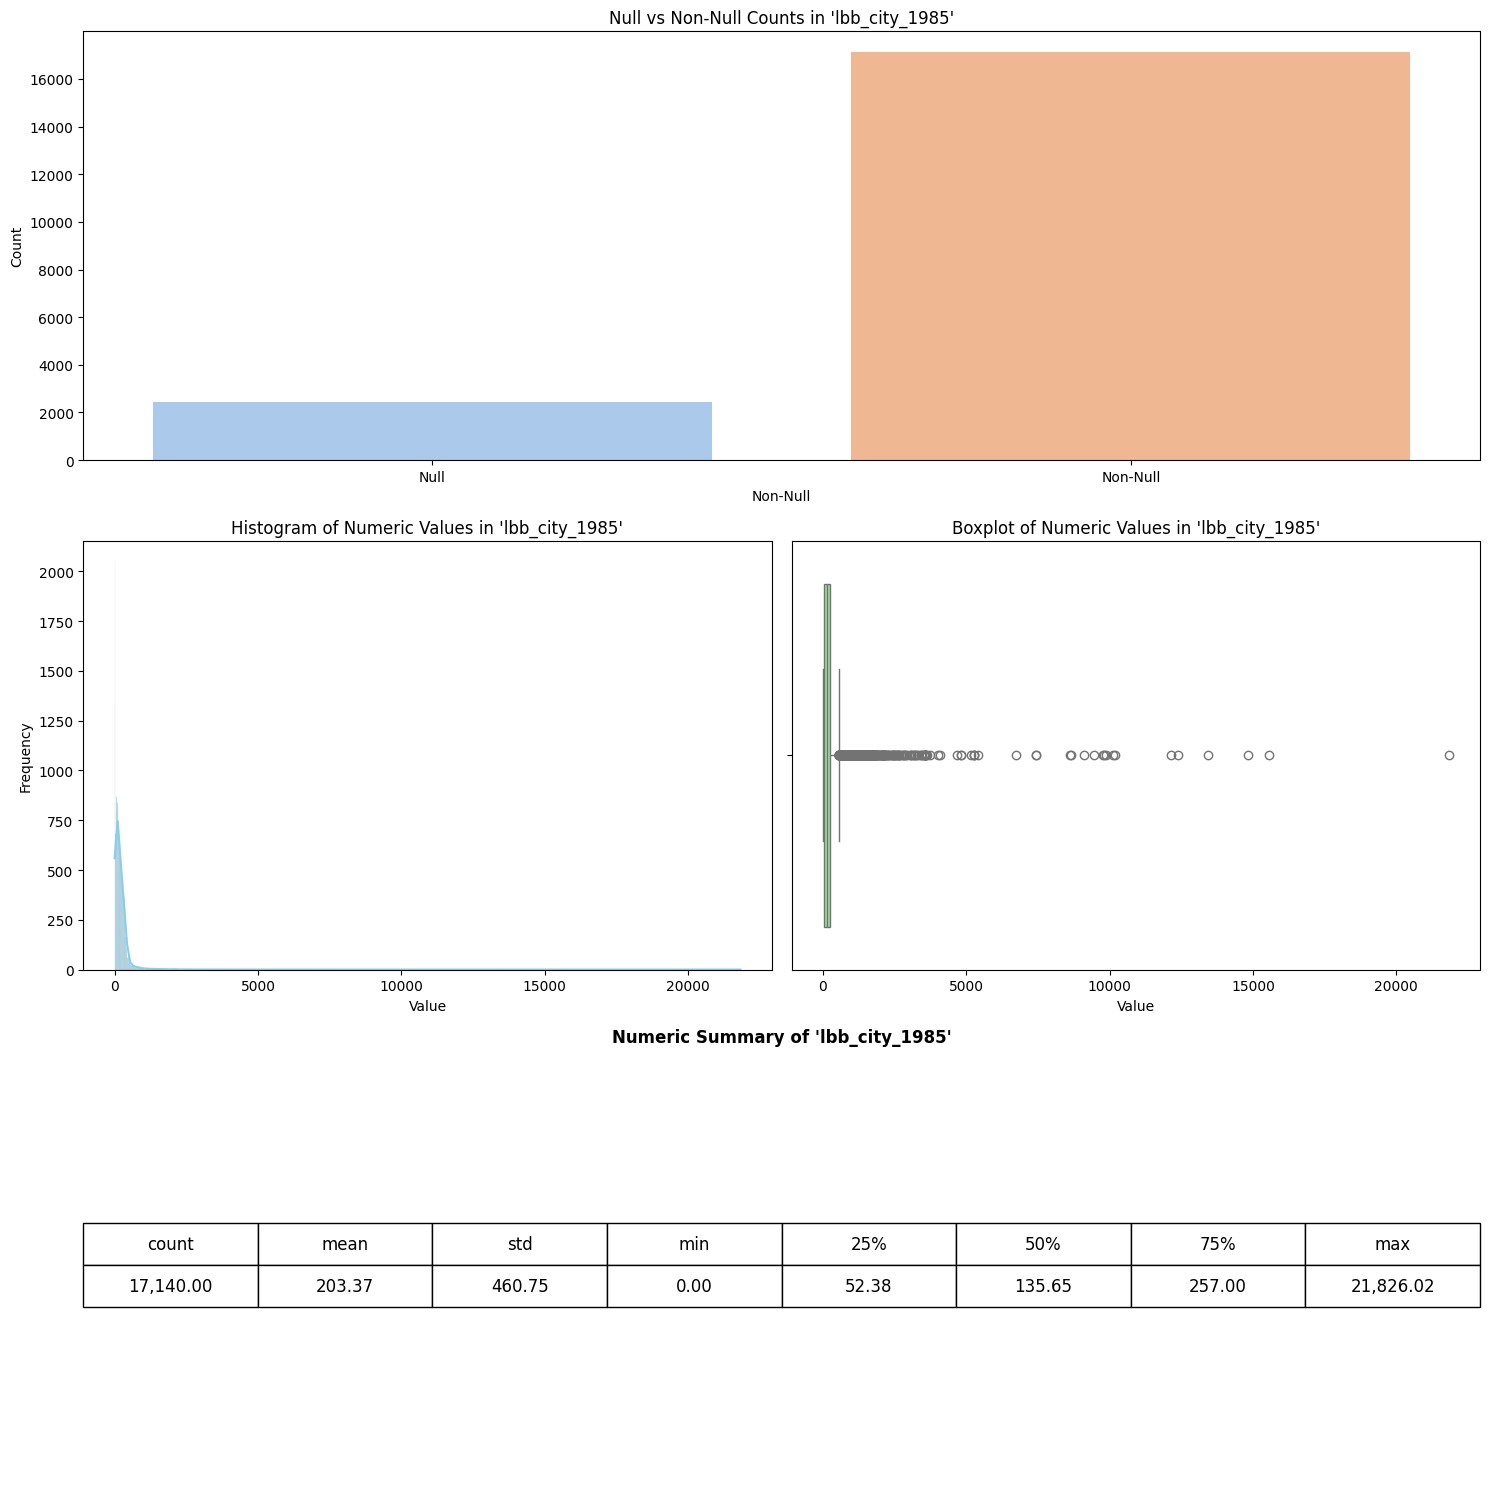

=== Finished Analysis for Column: 'lbb_city_1985' ===



In [85]:
analyze_raw_column(df1985, "lbb_city_1985")

#### L C H D_1985


=== Analyzing Column: 'L C H D_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'L C H D_1985': 18784
Null (NaN) values in 'L C H D_1985': 799
Unique non-null values in 'L C H D_1985': 7011

--- Random Sample of 'L C H D_1985' Values ---
  Row 14345 => 72.49
  Row 2590 => 5.66
  Row 13464 => 2.59
  Row 3416 => 14.41
  Row 2365 => 0.68

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 12.98
   Row 1 => 15.32
   Row 2 => 10.44
   Row 3 => 15.33
   Row 4 => 14.55
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 18784 non-null values, 18784 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'L C H D_1985':
count    18784.000000
mean        38.099371
std         89.185878
min          0.000000
25%          9.680000
50%         25.245000
75%         48.325000
max       4201.510000
dtype: float64

--- Plotting Section ---

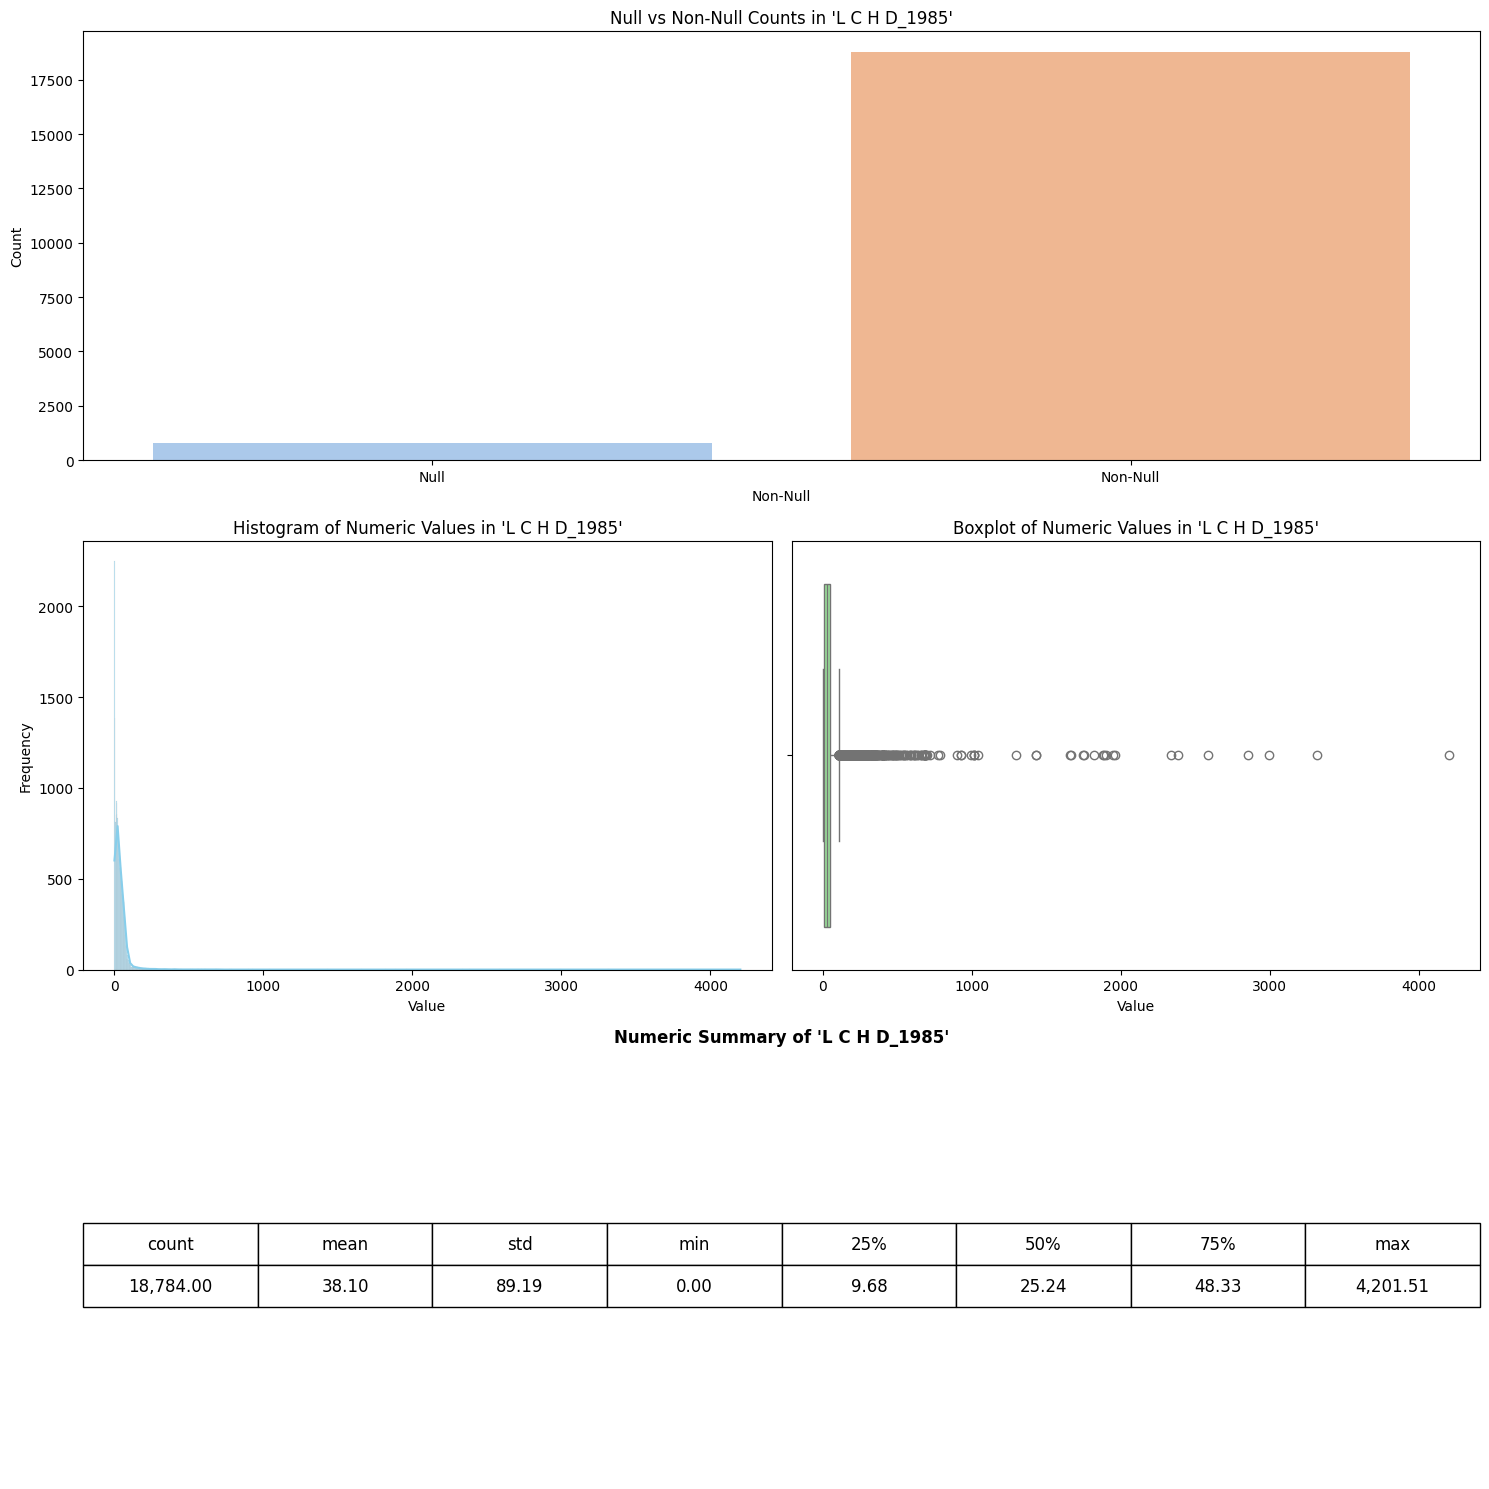

=== Finished Analysis for Column: 'L C H D_1985' ===



In [86]:
analyze_raw_column(df1985, "L C H D_1985")

#### county_1985.1


=== Analyzing Column: 'county_1985.1' ===
Total rows in DataFrame: 19583
Non-null values in 'county_1985.1': 18805
Null (NaN) values in 'county_1985.1': 778
Unique non-null values in 'county_1985.1': 7990

--- Random Sample of 'county_1985.1' Values ---
  Row 10499 => 66.81
  Row 2366 => 19.55
  Row 12791 => 58.08
  Row 15737 => 48.6
  Row 12063 => 34.82

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 18.79
   Row 1 => 22.16
   Row 2 => 15.11
   Row 3 => 22.17
   Row 4 => 21.05
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 18805 non-null values, 18805 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'county_1985.1':
count    18805.000000
mean        59.140795
std        503.724322
min          0.000000
25%         13.970000
50%         36.480000
75%         69.930000
max      64361.000000
dtype: float64

--- Plotting S

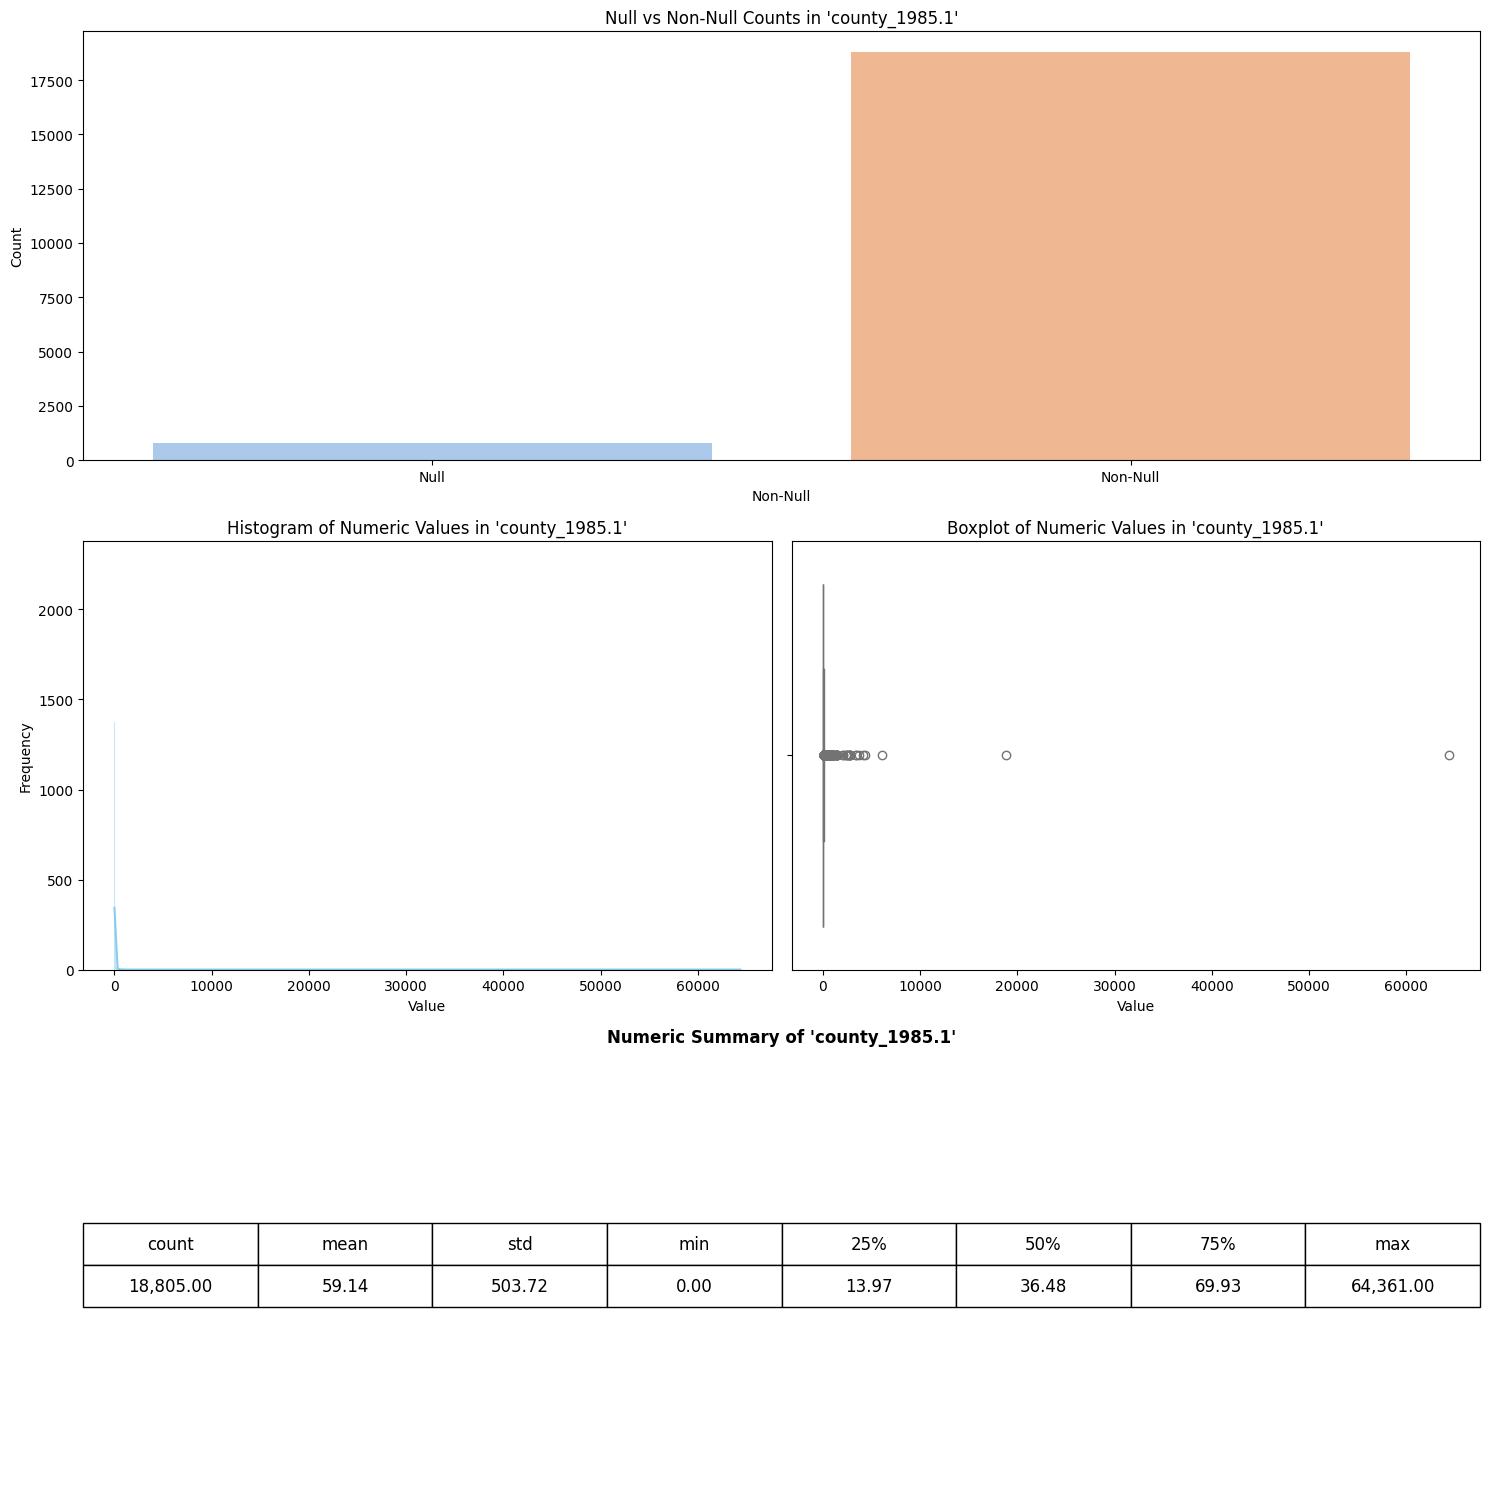

=== Finished Analysis for Column: 'county_1985.1' ===



In [87]:
analyze_raw_column(df1985, "county_1985.1")

#### gross_tax_1985


=== Analyzing Column: 'gross_tax_1985' ===
Total rows in DataFrame: 19583
Non-null values in 'gross_tax_1985': 18336
Null (NaN) values in 'gross_tax_1985': 1247
Unique non-null values in 'gross_tax_1985': 12549

--- Random Sample of 'gross_tax_1985' Values ---
  Row 5108 => 108.32
  Row 1265 => 54.77
  Row 13658 => 1036.71
  Row 9793 => 64.02
  Row 17519 => 372.08

--- Data Type Distribution ---
  Type 'float': 19583 occurrences

--- Examples of Each Data Type ---

Data Type: float | Count: 19583
   Row 0 => 204.35
   Row 1 => 194.79
   Row 2 => 117.99
   Row 3 => 194.96
   Row 4 => 229.26
   ... 19578 more values of type float ...

--- Numeric Summary (if applicable) ---
Out of 18336 non-null values, 18336 can be cast to numeric, 0 cannot.

Numeric Summary of Coercible Values in 'gross_tax_1985':
count    18336.000000
mean       578.614004
std       1373.975326
min          0.000000
25%        136.365000
50%        372.085000
75%        719.475000
max      62116.860000
dtype: float64

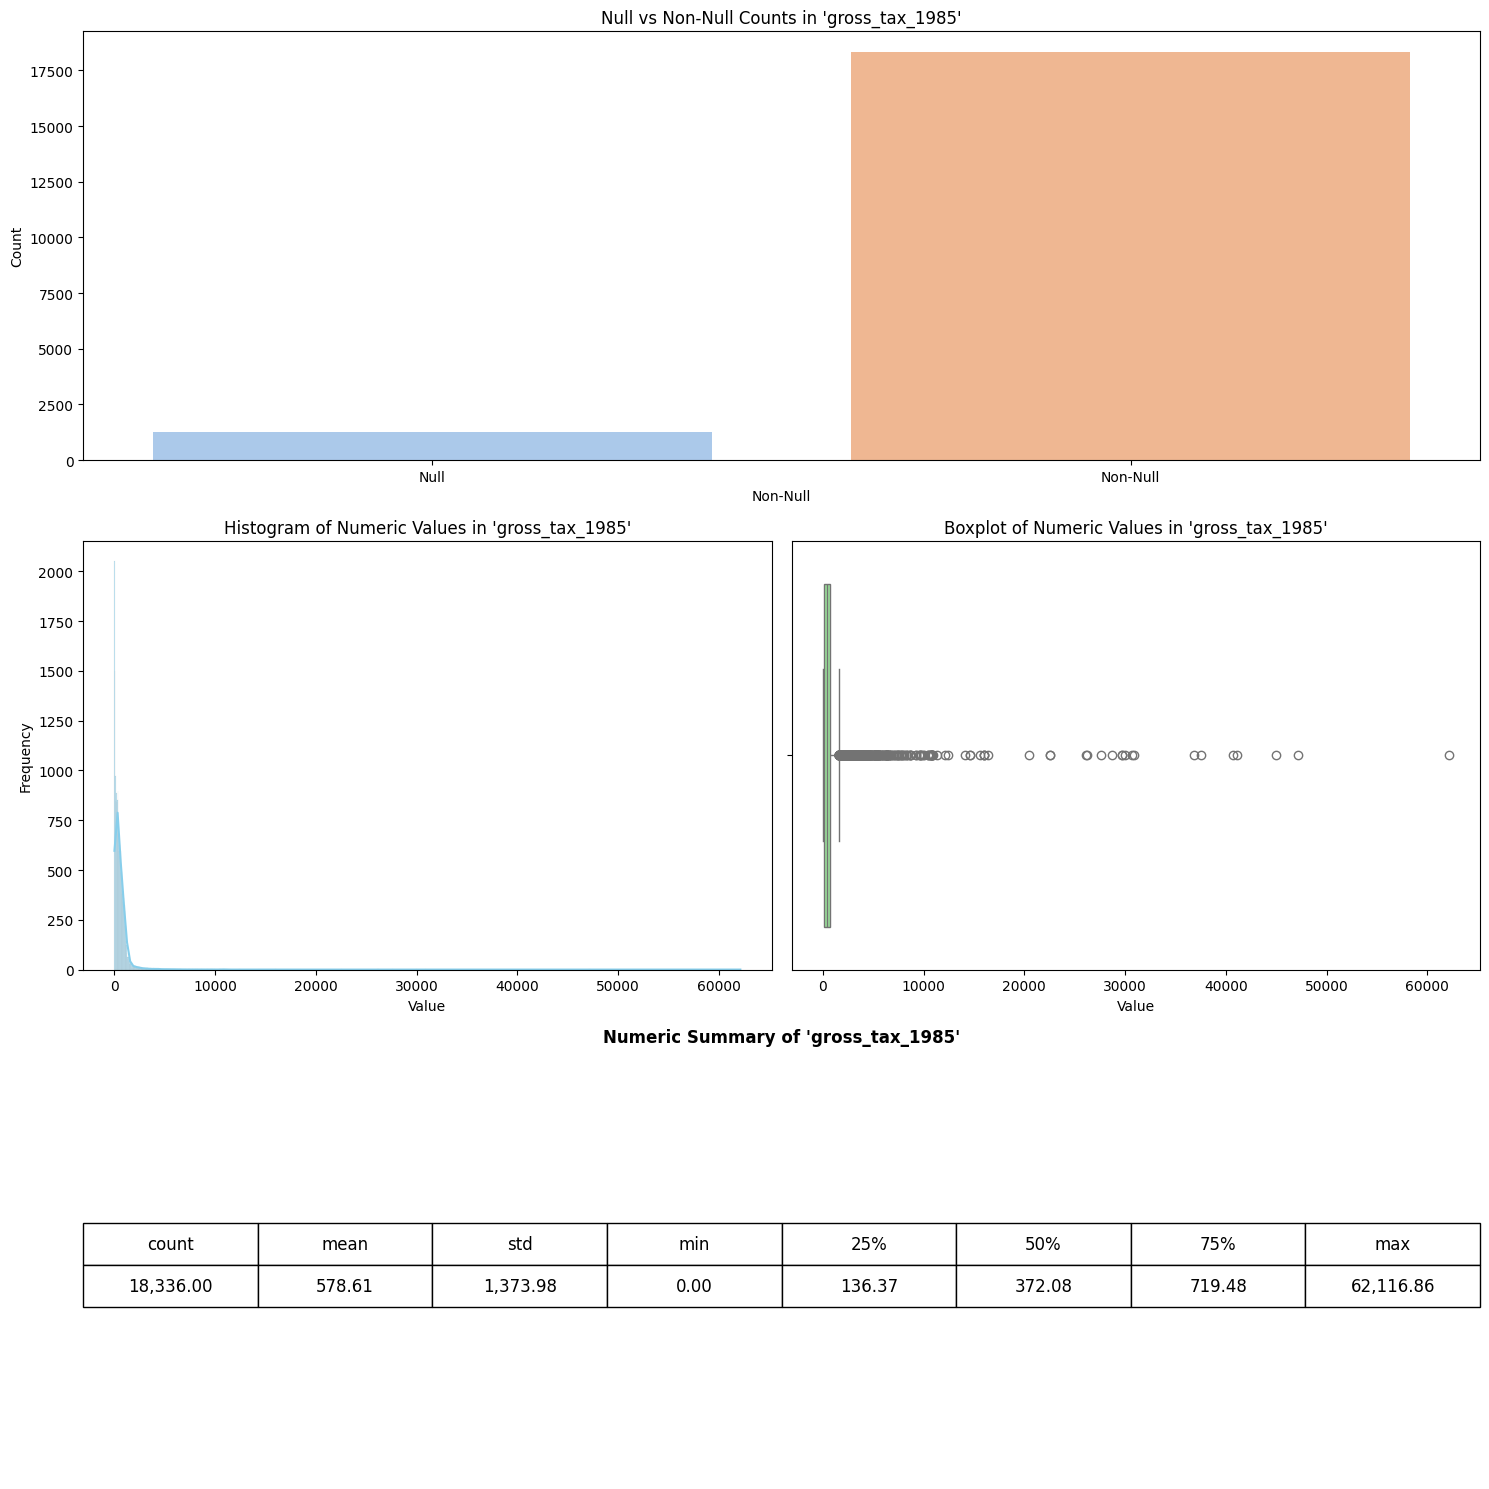

=== Finished Analysis for Column: 'gross_tax_1985' ===



In [88]:
analyze_raw_column(df1985, "gross_tax_1985")